### COMP 4447
### Final Project
### Robert McLellan & Jonathan Yun

# Respitory Virus Trends Post-COVID Lockdowns

## Motivation & Metadata

   Each year the World Health Organization (WHO) provides recommendations of the makeup of seasonal flu vaccines based on regions. The WHO informs these recommendations based on data from the WHO Global Influenza Surveillance and Response System (GISRS), a global system of public health institutions that share surveillance data of circulating viruses. For the Northern hemisphere recommendations tend to be made in February ahead of the flu season, while recommendations for the Southern hemisphere are made in September. The most recent recommendations for the Northern hemisphere were released on February 24th, 2023. 
   
   While the flu vaccine is available around the globe, there are many other respitory viruses that have become increasingly concerning as global health focus shifts away from COVID-19. The GISRS tracks many of these viruses, yet does not provide additional vaccine or vaccine research recommendations. This report aims to evaluate which respitory viruses have become increasingly prevelant since COVID-19 lockdowns, and predicts which ones need the most urgent attention. 

    
**Metadata:**
- We obtained time series data from the WHO GISRS beginning in 1995 through February 2023. 
- Dataset was reduced to focus on only data from Sentinel sources, and only prevelant respitory virus trackers
- Total number of datapoints in full dataset: 139510 rows × 49 columns
- Total number of datapoints in reduced dataset (Sentinel, Respitory Viruses): 2261 rows × 13 columns
- Definitions of all variables in dataset: https://www.who.int/teams/global-influenza-programme/surveillance-and-monitoring/influenza-surveillance-outputs


## Research Question

Research Question: Our client has asked us to look into respitory virus tracking using WHO's GISRS data. We aim to predict which respitory viruses will become increasingly prevelant after COVID lockdowns and provide recommendations on the most urgent vaccines needed, similar to the WHO's flu vaccine recommendation. 

**Inputs:**
- Time series data collected from the WHO Global Influenza Surveillance and Response System (GISRS)
- WHO 2023 vaccine makeup recommendation for the Southern Hemisphere: https://www.who.int/publications/m/item/recommended-composition-of-influenza-virus-vaccines-for-use-in-the-2023-southern-hemisphere-influenza-season

**Outputs:**
- Time series forecasting of prevalent respitory viruses gathered from WHO Sentinel data
- Recommendations of which repistory viruses will become increasingly common and dangerous

## Literature Review

- Hall, Stephen. “4 Infections That Are on the Rise since COVID-19.” World Economic Forum, 1 Feb. 2023, https://www.weforum.org/agenda/2023/02/other-infections-rising-since-covid-pandemic/. 
- Hay, Alan J, and John W McCauley. “The WHO global influenza surveillance and response system (GISRS)-A future perspective.” Influenza and other respiratory viruses vol. 12,5 (2018): 551-557. doi:10.1111/irv.12565
- Jewett, Christina. “F.D.A. Panel Recommends 2 R.S.V. Vaccines for Older Adults.” The New York Times, The New York Times, 1 Mar. 2023, https://www.nytimes.com/2023/03/01/health/rsv-vaccine-fda.html. 
- Osterholm, Michael T et al. “Efficacy and effectiveness of influenza vaccines: a systematic review and meta-analysis.” The Lancet. Infectious diseases vol. 12,1 (2012): 36-44. doi:10.1016/S1473-3099(11)70295-X
- Parkinson, John. “Human Metapneumovirus Sees Increase in Incidence Rates.” ContagionLive, ContagionLive, 7 Mar. 2023, https://www.contagionlive.com/view/human-metapneumovirus-sees-increase-in-incidence-rates. 
- Teo, Kah Wee et al. “Rhinovirus persistence during the COVID-19 pandemic-Impact on pediatric acute wheezing presentations.” Journal of medical virology vol. 94,11 (2022): 5547-5552. doi:10.1002/jmv.27986
- Tomic, A., Tomic, I., Dekker, C.L. et al. The FluPRINT dataset, a multidimensional analysis of the influenza vaccine imprint on the immune system. Sci Data 6, 214 (2019). https://doi.org/10.1038/s41597-019-0213-4
- Sharma, Priyanka. “Influenza Cases with Covid-like Symptoms Surge, Scientists Raise Concern.” Mint, Mint India, 1 Mar. 2023, https://www.livemint.com/economy/influenza-cases-with-covid-like-symptoms-surge-scientists-raise-concern-11677607889150.html. 

## Imports & dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [2]:
original_dataframe = pd.read_csv("VIW_FNT.csv")
df = original_dataframe

In [3]:
print(df.head())

  WHOREGION FLUSEASON HEMISPHERE           ITZ COUNTRY_CODE  \
0       AFR        NH         NH   FLU_NRT_AFR          DZA   
1       WPR        YR         NH   FLU_SE_ASIA          KHM   
2       EUR        NH         NH  FLU_CNT_ASIA          UZB   
3       AMR        YR         NH   FLU_CNT_AMC          NIC   
4       AFR        YR         NH   FLU_WST_AFR          CIV   

  COUNTRY_AREA_TERRITORY ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  \
0                Algeria        2021-11-29      2021        48   
1               Cambodia        2015-06-15      2015        25   
2             Uzbekistan        2017-02-13      2017         7   
3              Nicaragua        2015-08-17      2015        34   
4          Côte d'Ivoire        2012-10-29      2012        44   

  MMWR_WEEKSTARTDATE  ...  PARAINFLUENZA  RHINO  RSV  OTHERRESPVIRUS  \
0         2021-11-28  ...            NaN    NaN  NaN             0.0   
1         2015-06-14  ...            NaN    NaN  NaN             NaN   
2       

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139510 entries, 0 to 139509
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   WHOREGION                139510 non-null  object 
 1   FLUSEASON                139510 non-null  object 
 2   HEMISPHERE               139510 non-null  object 
 3   ITZ                      139510 non-null  object 
 4   COUNTRY_CODE             139510 non-null  object 
 5   COUNTRY_AREA_TERRITORY   139510 non-null  object 
 6   ISO_WEEKSTARTDATE        139510 non-null  object 
 7   ISO_YEAR                 139510 non-null  int64  
 8   ISO_WEEK                 139510 non-null  int64  
 9   MMWR_WEEKSTARTDATE       139510 non-null  object 
 10  MMWR_YEAR                139510 non-null  int64  
 11  MMWR_WEEK                139510 non-null  int64  
 12  ORIGIN_SOURCE            139510 non-null  object 
 13  SPEC_PROCESSED_NB        131975 non-null  float64
 14  SPEC

### DATA CLEANING AND EXPLORATION

#### After review, we opted to use Sentinel data as it is the most consistent and well-documented


Sentinel Surveillance is a virus surveillance system used by the WHO in which data is reported from hospital networks. This provides a steady stream of consistent time-series data to the WHO from well-established medical institutions. Limitations of such systems include poor detection of rare diseases, and also a lack of data on outbreaks occuring far away from sentinel surveillance sites.     

#### Further, we isolated the most concerning respitory viruses to focus on


Respitory viruses: Adenovirus, Bocavirus, Metapneumovirus, Parainfluenza, Rhinovirus, RSV

In [5]:
df = df.loc[df['ISO_YEAR'] >= 2010]
df = df.loc[df['ORIGIN_SOURCE'] == 'SENTINEL']
df = df[['WHOREGION', 'COUNTRY_CODE', 'ISO_YEAR', 'ISO_WEEKSTARTDATE', 'ORIGIN_SOURCE', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO', 'PARAINFLUENZA', 'RHINO', 'RSV']]

#### With this new dataset, we were able to mitigate much of the strife we were having regarding Null values from non-sentinel data sources

In [6]:
df = df[~df.isnull().any(axis = 1)]
df['week'] = pd.to_datetime(df['ISO_WEEKSTARTDATE'])

In [7]:
print(df.isnull().sum())
print(len(df))
print(df.info())

WHOREGION            0
COUNTRY_CODE         0
ISO_YEAR             0
ISO_WEEKSTARTDATE    0
ORIGIN_SOURCE        0
ADENO                0
BOCA                 0
HUMAN_CORONA         0
METAPNEUMO           0
PARAINFLUENZA        0
RHINO                0
RSV                  0
week                 0
dtype: int64
2261
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261 entries, 114 to 139318
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   WHOREGION          2261 non-null   object        
 1   COUNTRY_CODE       2261 non-null   object        
 2   ISO_YEAR           2261 non-null   int64         
 3   ISO_WEEKSTARTDATE  2261 non-null   object        
 4   ORIGIN_SOURCE      2261 non-null   object        
 5   ADENO              2261 non-null   float64       
 6   BOCA               2261 non-null   float64       
 7   HUMAN_CORONA       2261 non-null   float64       
 8   METAPNEUMO       

In [8]:
unique_country = set(df['COUNTRY_CODE'])
unique_region = set(df['WHOREGION'])
unique_columns = df.columns
unique_columns = unique_columns.drop(['WHOREGION', 'COUNTRY_CODE', 'ISO_YEAR', 'ISO_WEEKSTARTDATE', 'ORIGIN_SOURCE'])

In [9]:
# for country in unique_country:
#     for col in unique_columns:
#         sns.lineplot(data = df, x = 'ISO_WEEKSTARTDATE', y = col).set(xticklabels = [])
#         plt.title(country)
#         plt.show()

In [10]:
unique_year = set(df['ISO_YEAR'])
years = sorted(list(unique_year))

In [20]:
# Commented out for brevity 

#for country in unique_country: 
#    for column in unique_columns:
#        sns.barplot(data = df, x = 'ISO_YEAR', y = column).set_xticklabels(labels = years, rotation = 90)
#        plt.title(country)
#        plt.show()

### Time Series Prediction - Viruses in Mexico

#### Mexico RSV

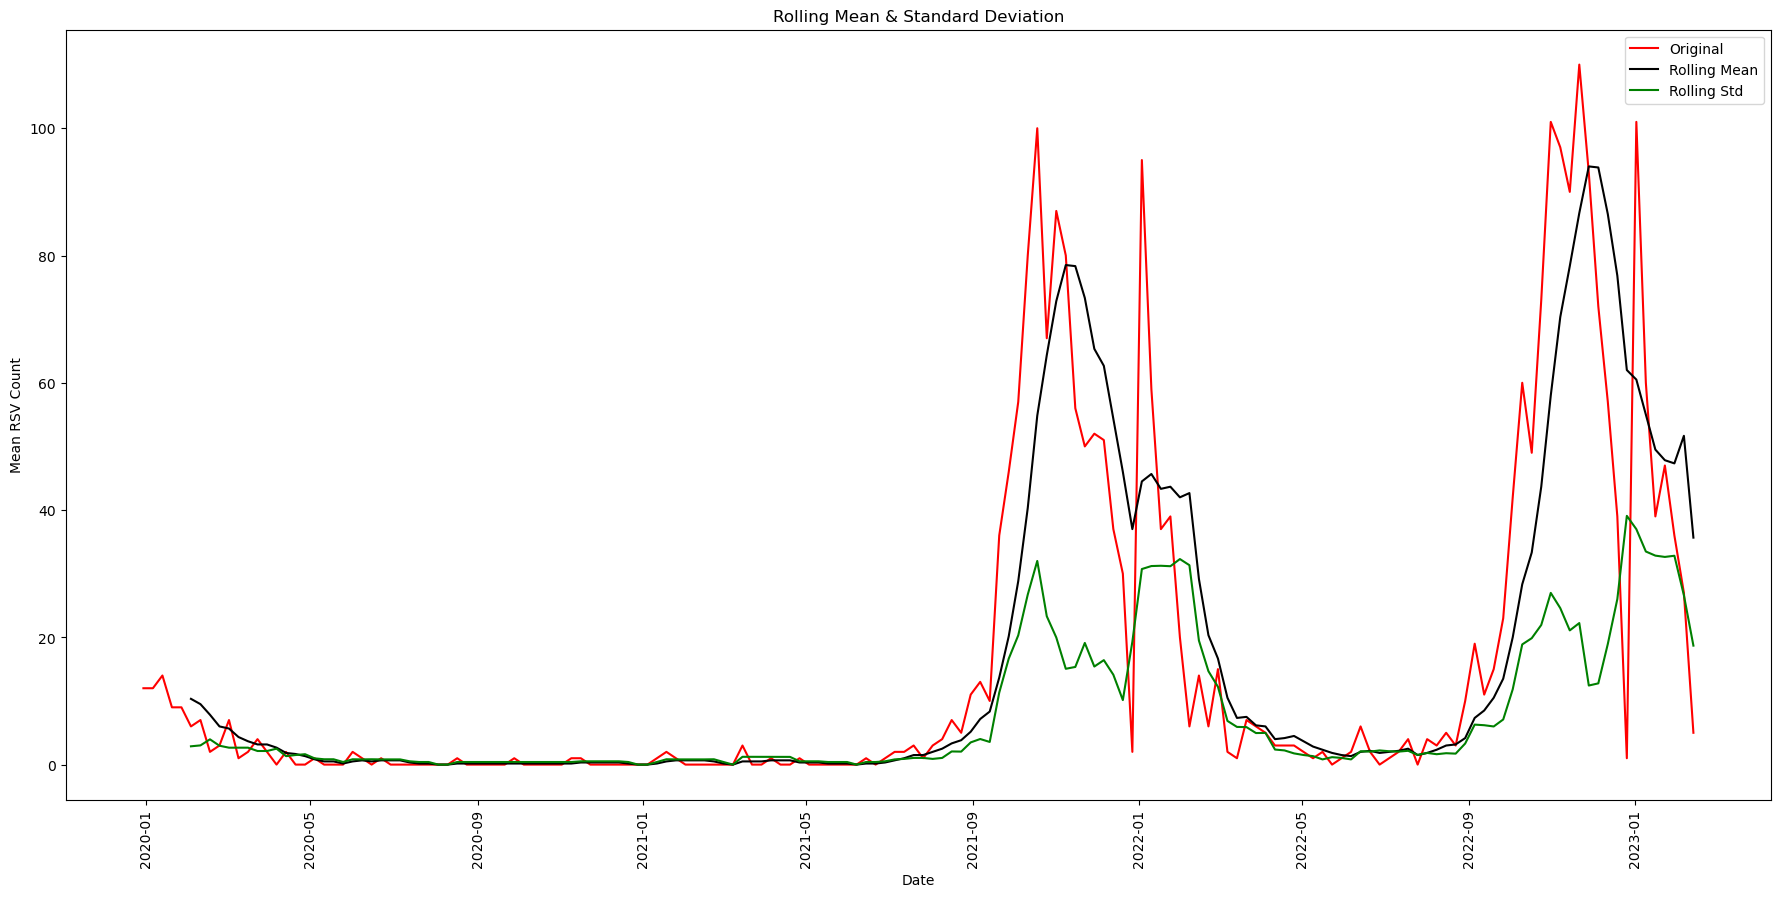

Test statistic:  -2.4778510673321366
p-value:  0.12095682221198406
Critical Values: {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


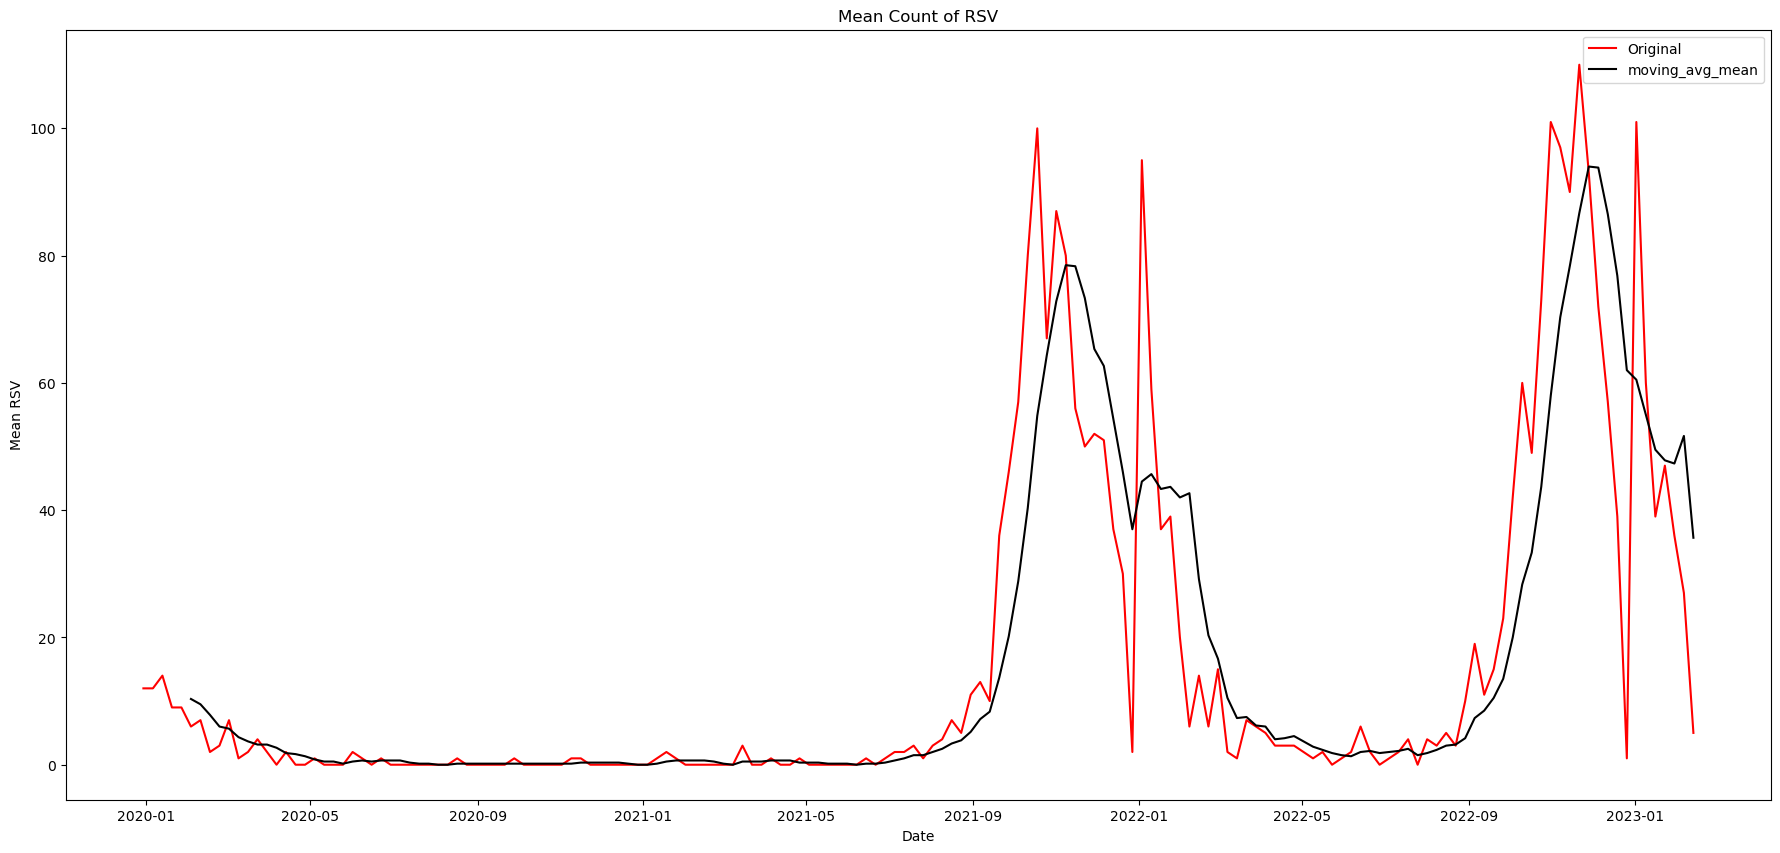

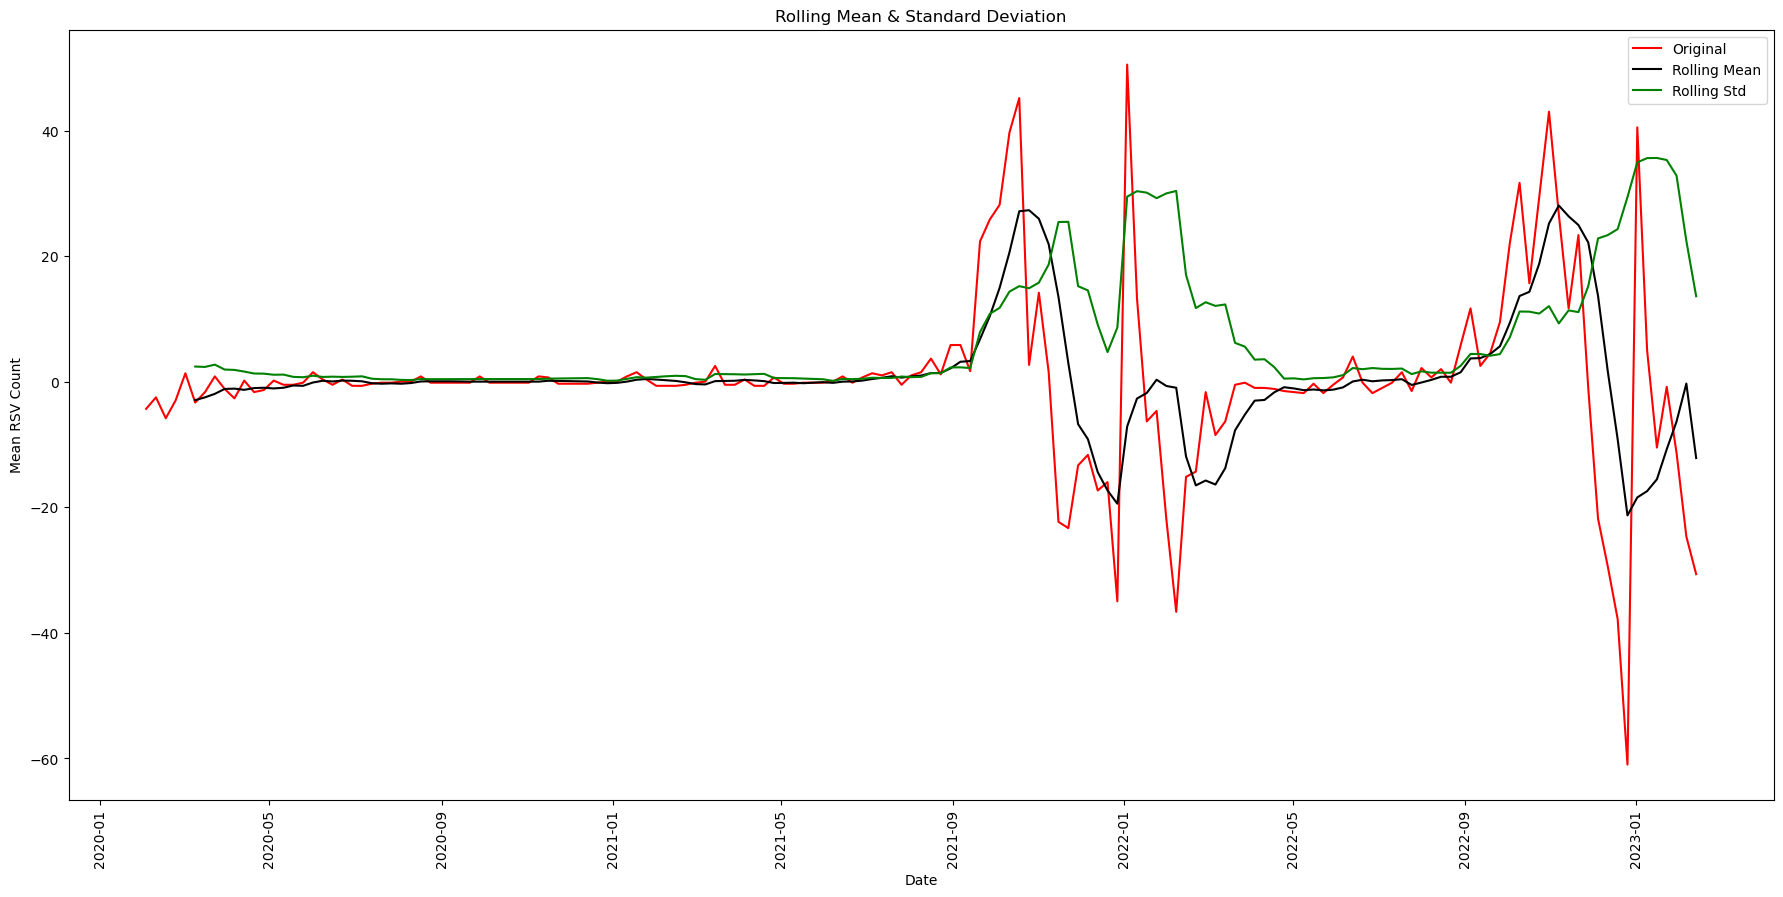

Test statistic:  -5.143381518120851
p-value:  1.1460225653426692e-05
Critical Values: {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


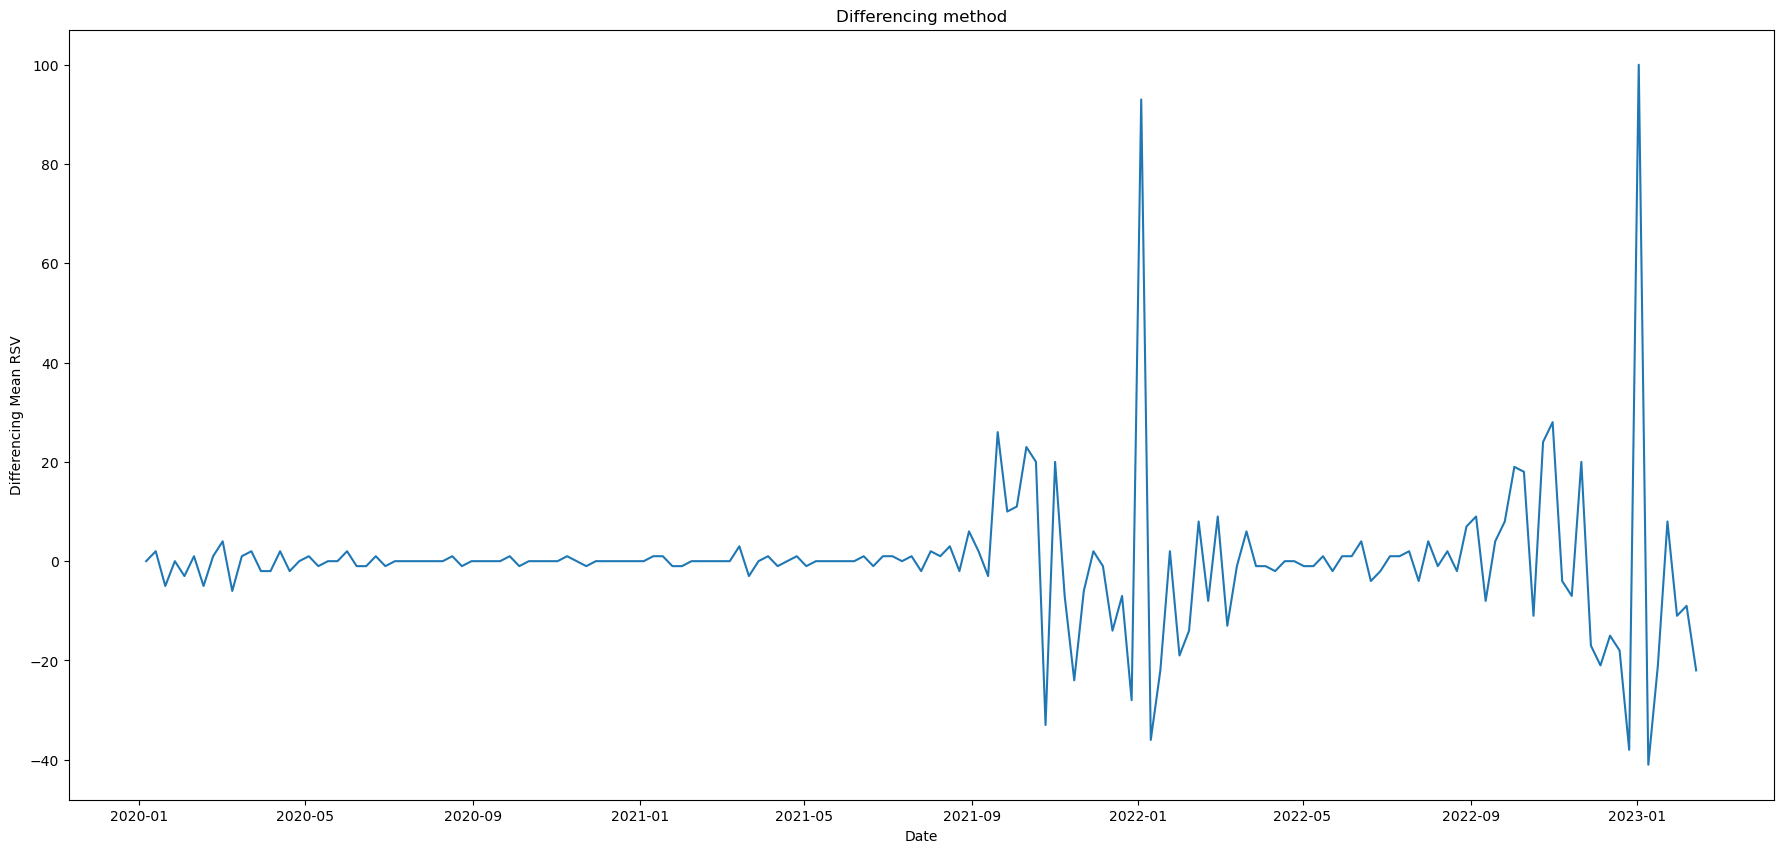

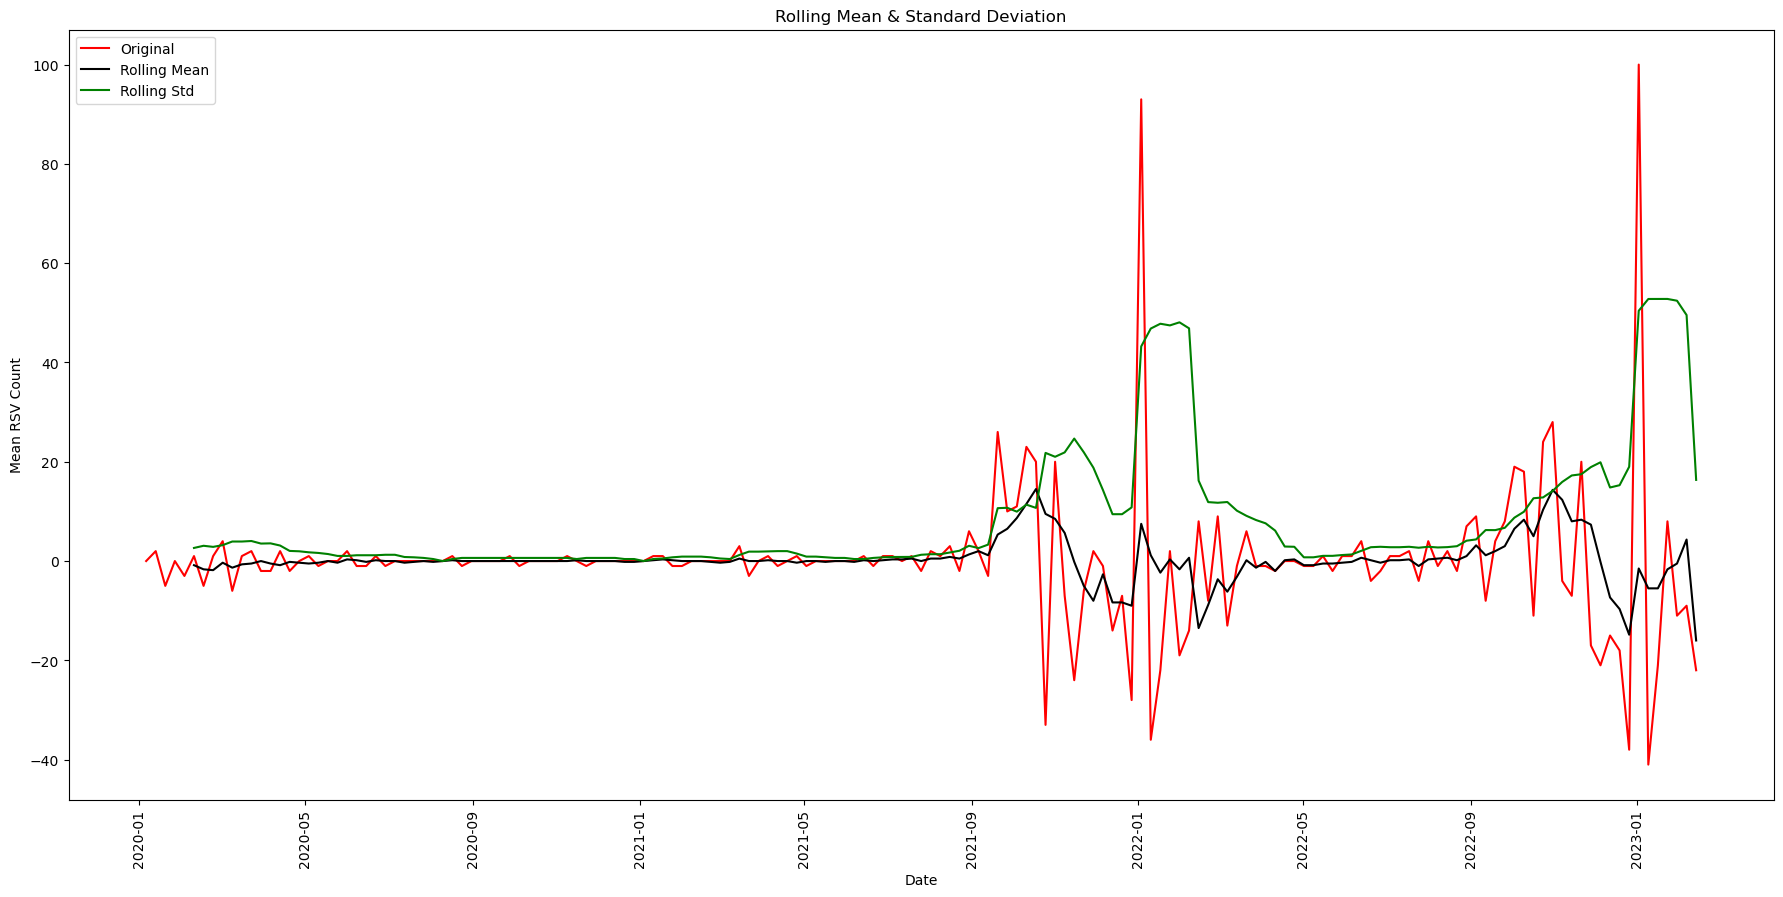

Test statistic:  -12.07795188639325
p-value:  2.2670544149136337e-22
Critical Values: {'1%': -3.471633386932248, '5%': -2.8796651107461972, '10%': -2.576433647235832}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


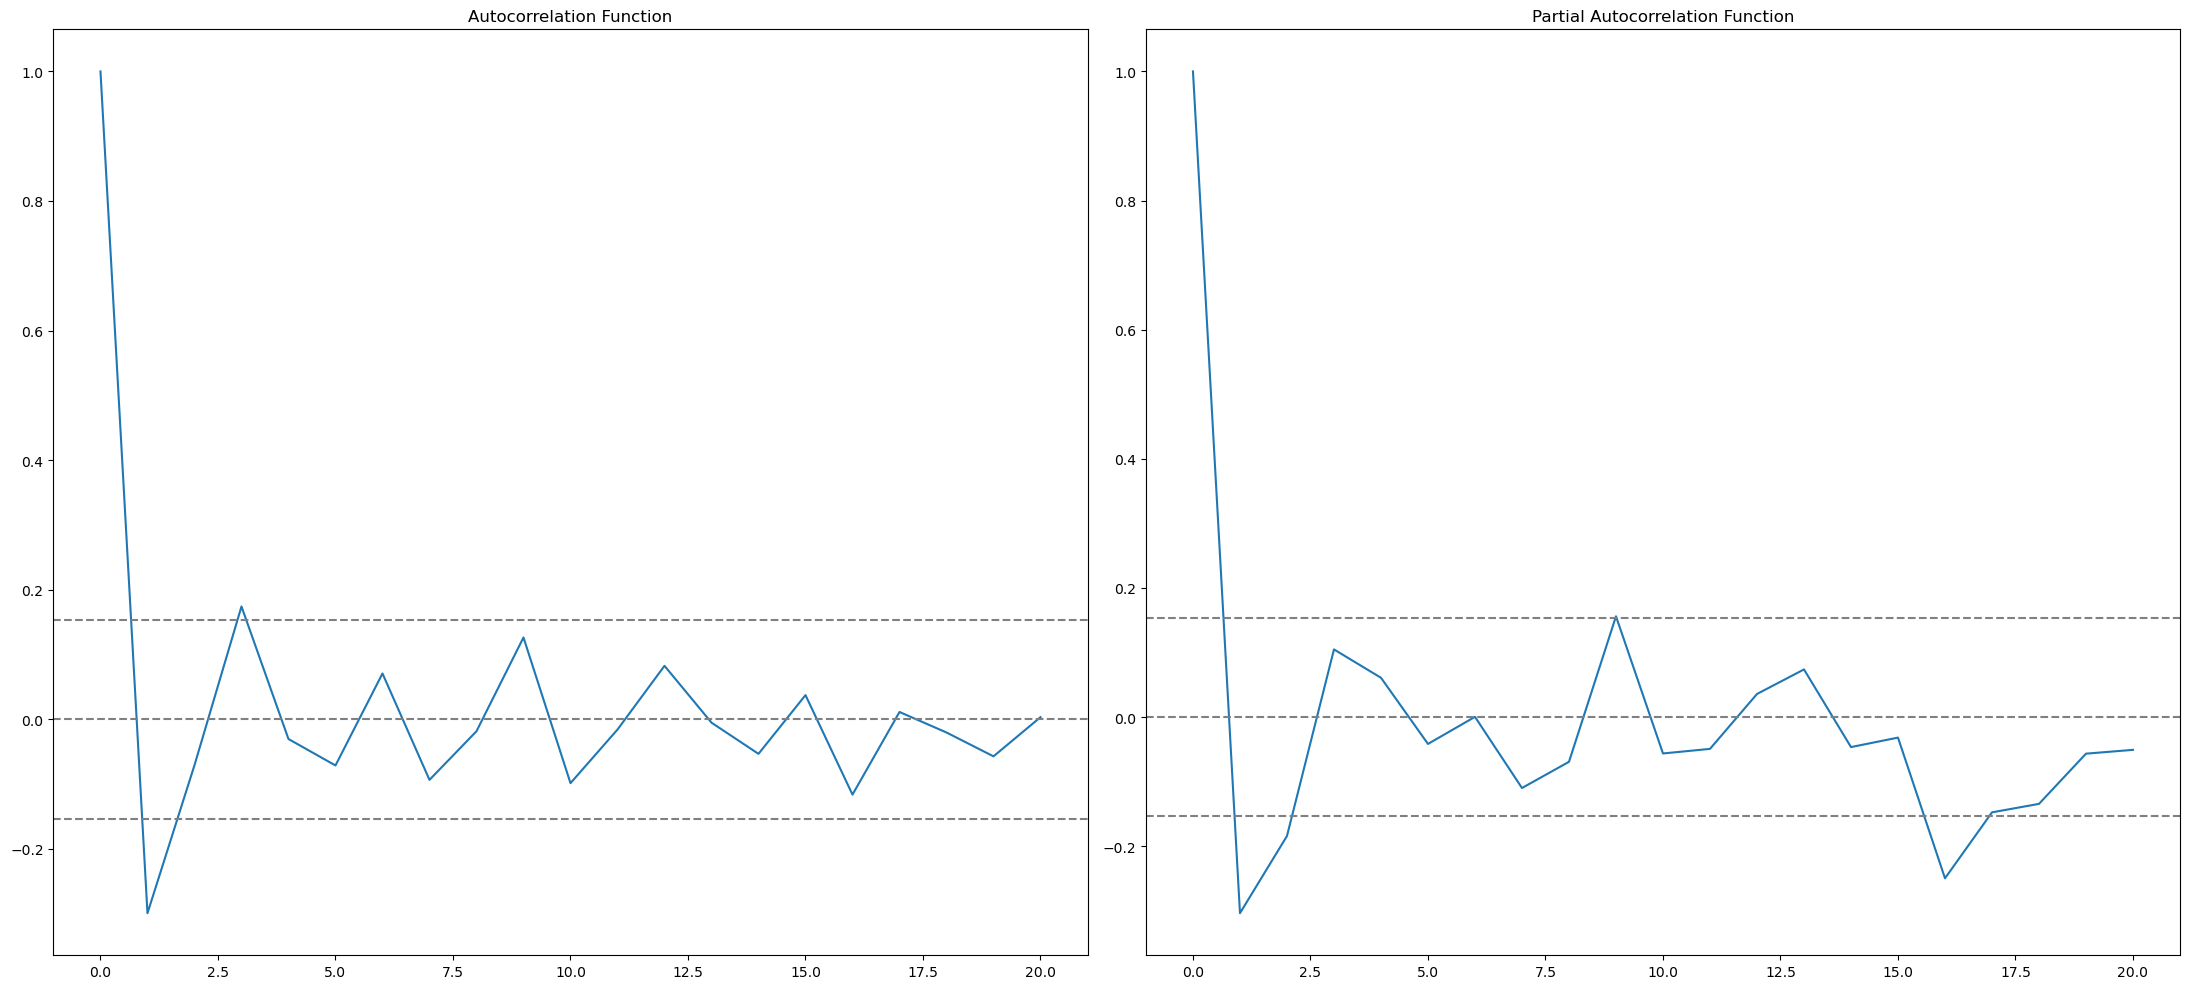

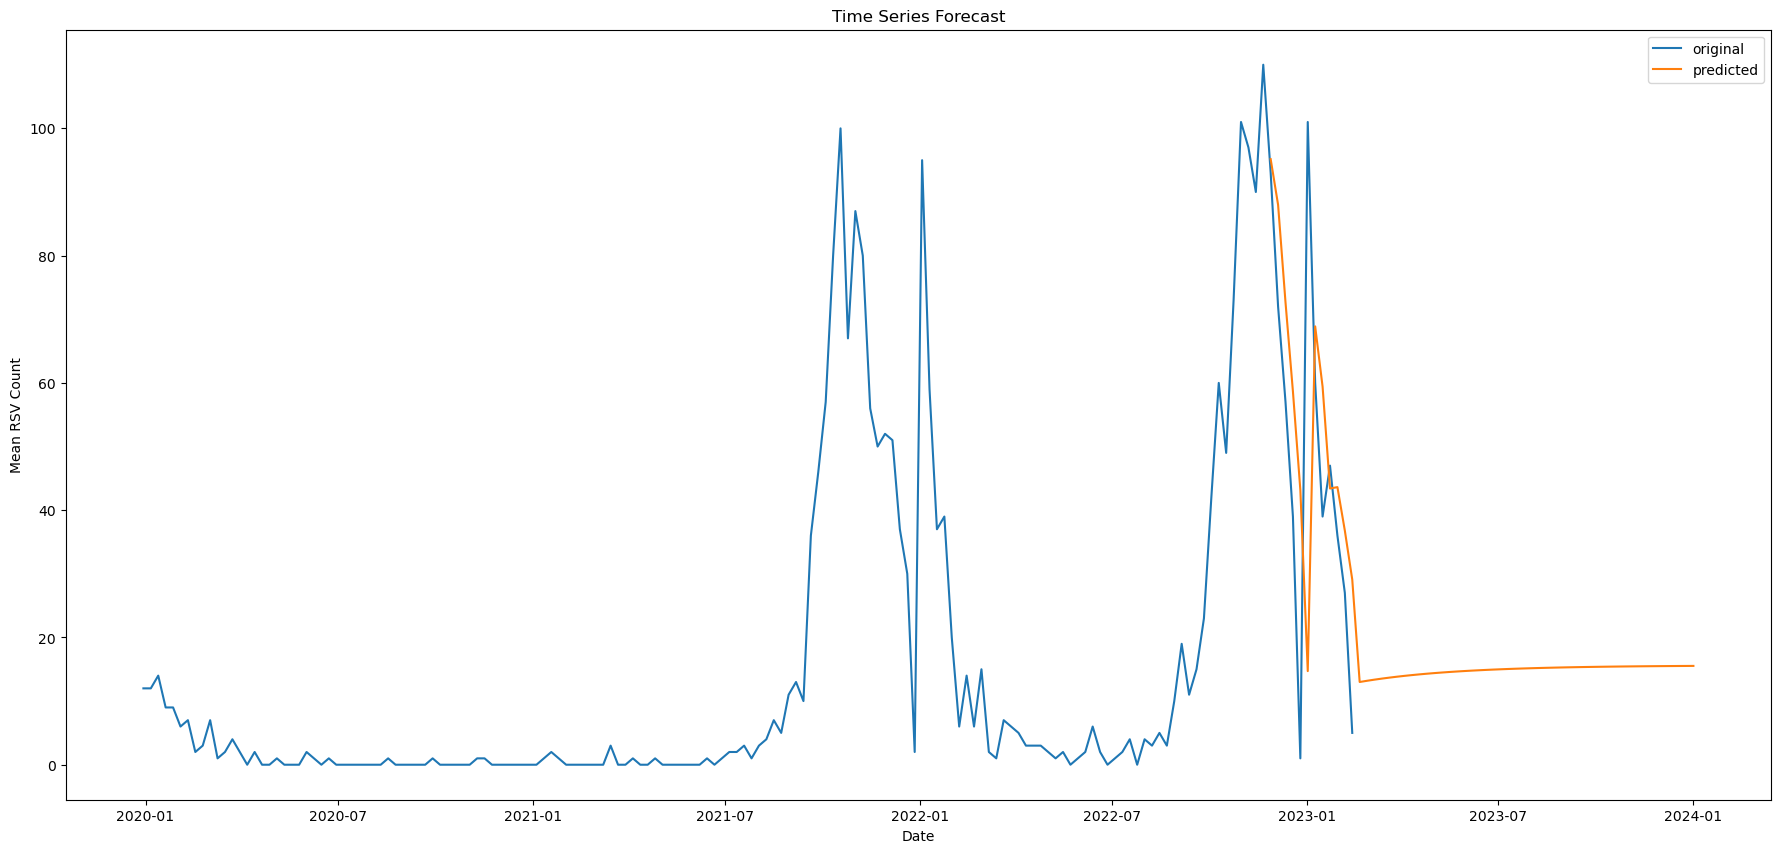

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


error:  185.989265162891


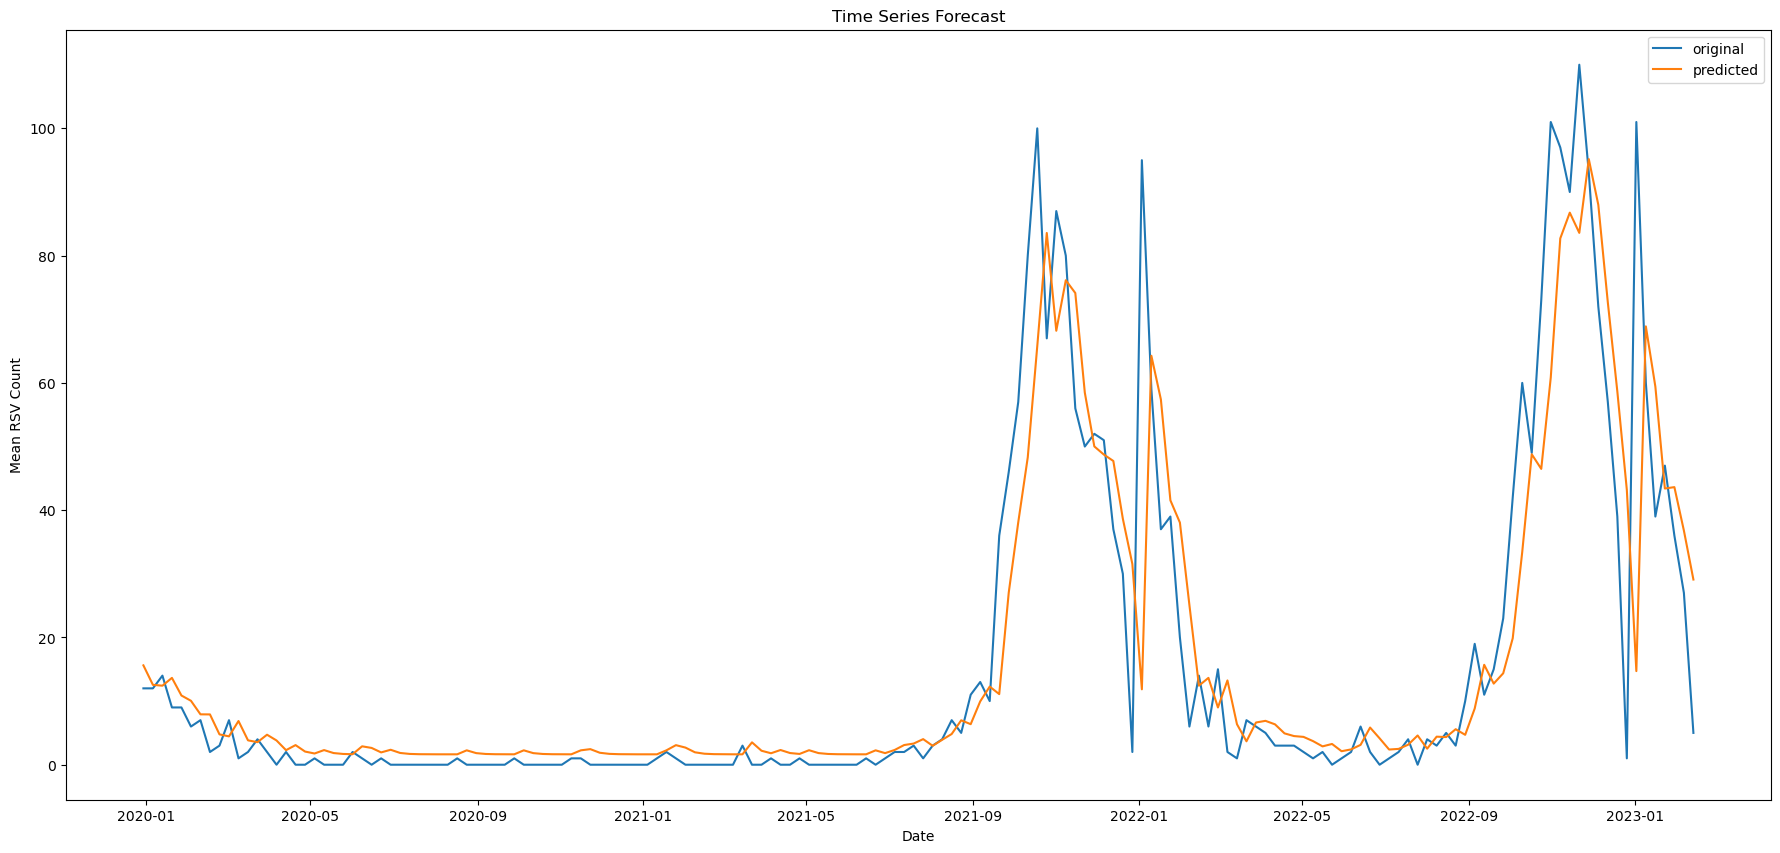

In [12]:
mex = df.loc[df['COUNTRY_CODE'] == 'MEX']
ts = mex.loc[:, ['week', 'RSV']]
ts = ts.sort_values(by = ['week'])
ts.index = ts.week
ts = ts.drop("week", axis = 1)
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel("Mean RSV Count")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.RSV)

window_size = 6
moving_avg = ts.rolling(6).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Count of RSV")
plt.xlabel("Date")
plt.ylabel("Mean RSV")
plt.legend()
plt.show()


ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.RSV)


ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean RSV")
plt.show()

ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.RSV)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = datetime(2022, 11, 28)
end_index = datetime(2024, 1, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index, ts.RSV, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean RSV Count")
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.RSV,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean RSV Count")
plt.legend()
plt.savefig('graph.png')

plt.show()

#### Mexico Adenovirus

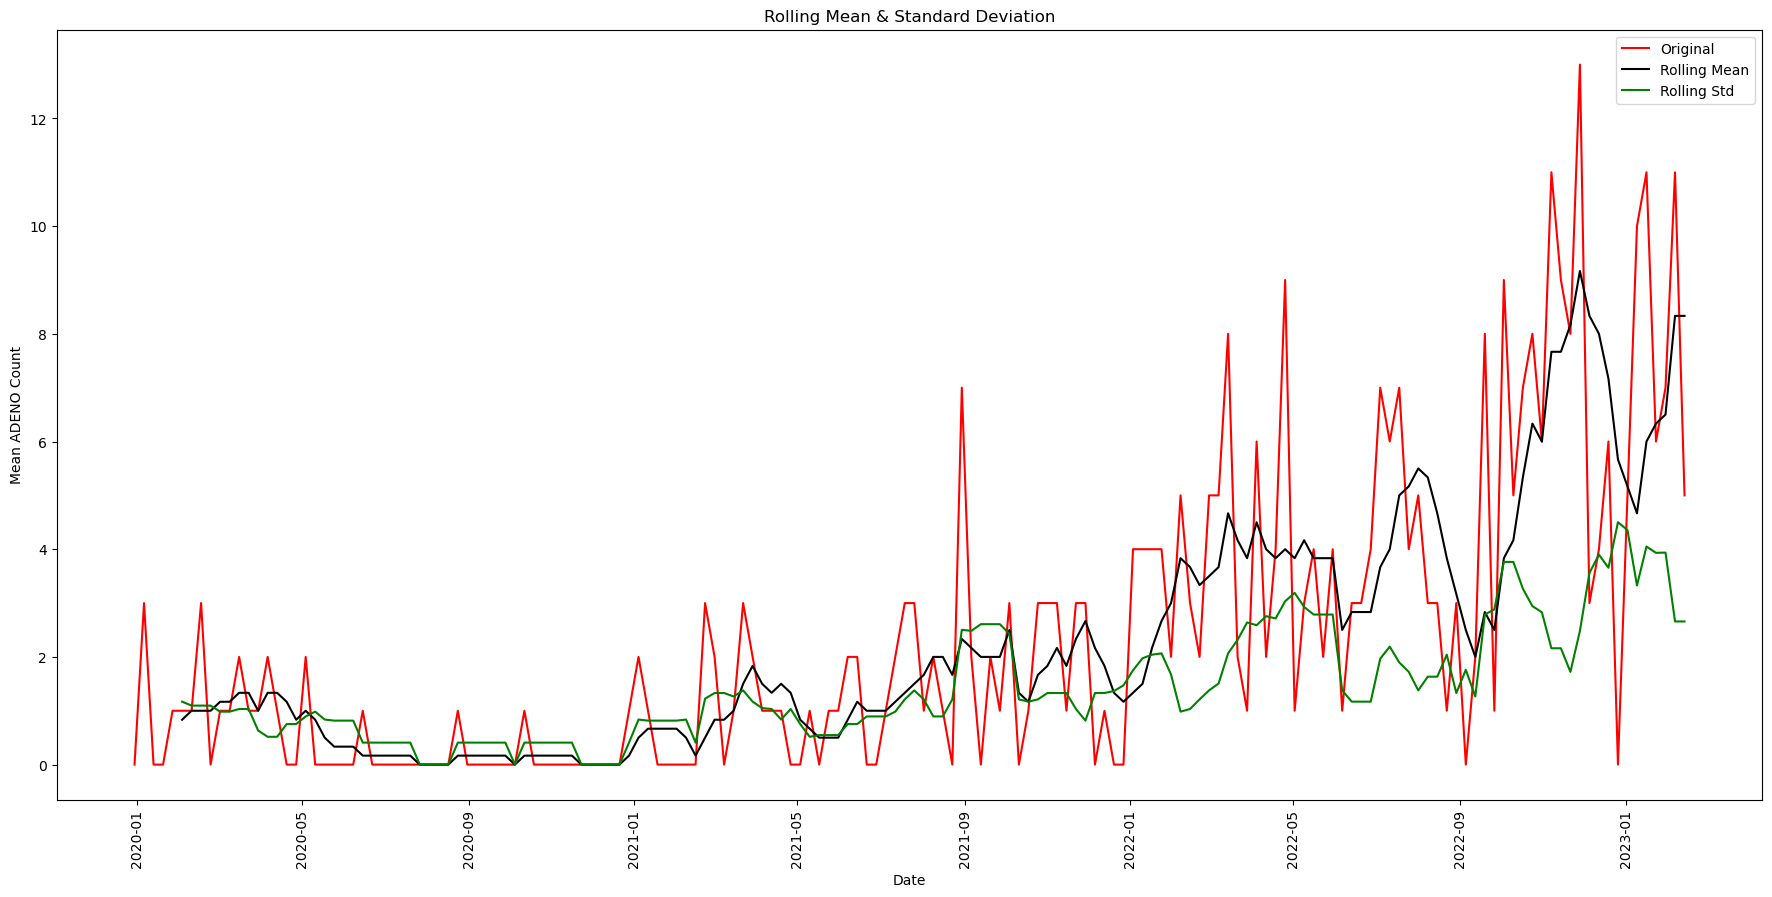

Test statistic:  1.0025296140133872
p-value:  0.994292567337022
Critical Values: {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}


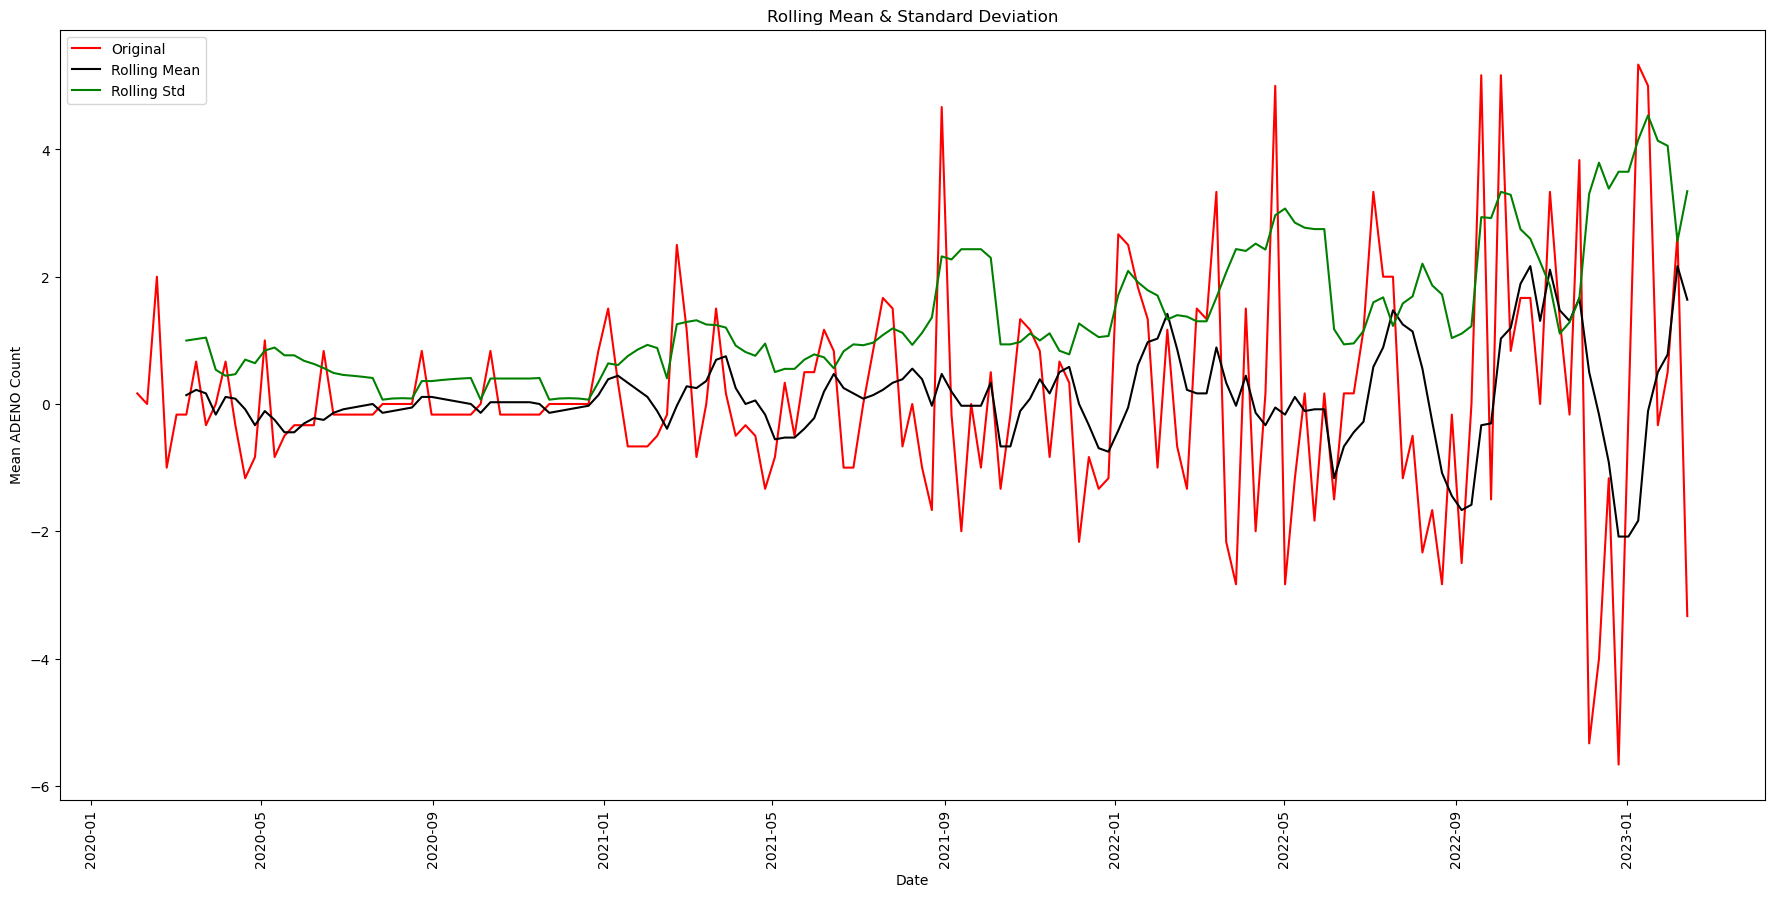

Test statistic:  -6.459003354828889
p-value:  1.4590421546099706e-08
Critical Values: {'1%': -3.474714913481481, '5%': -2.881008708148148, '10%': -2.5771508444444446}


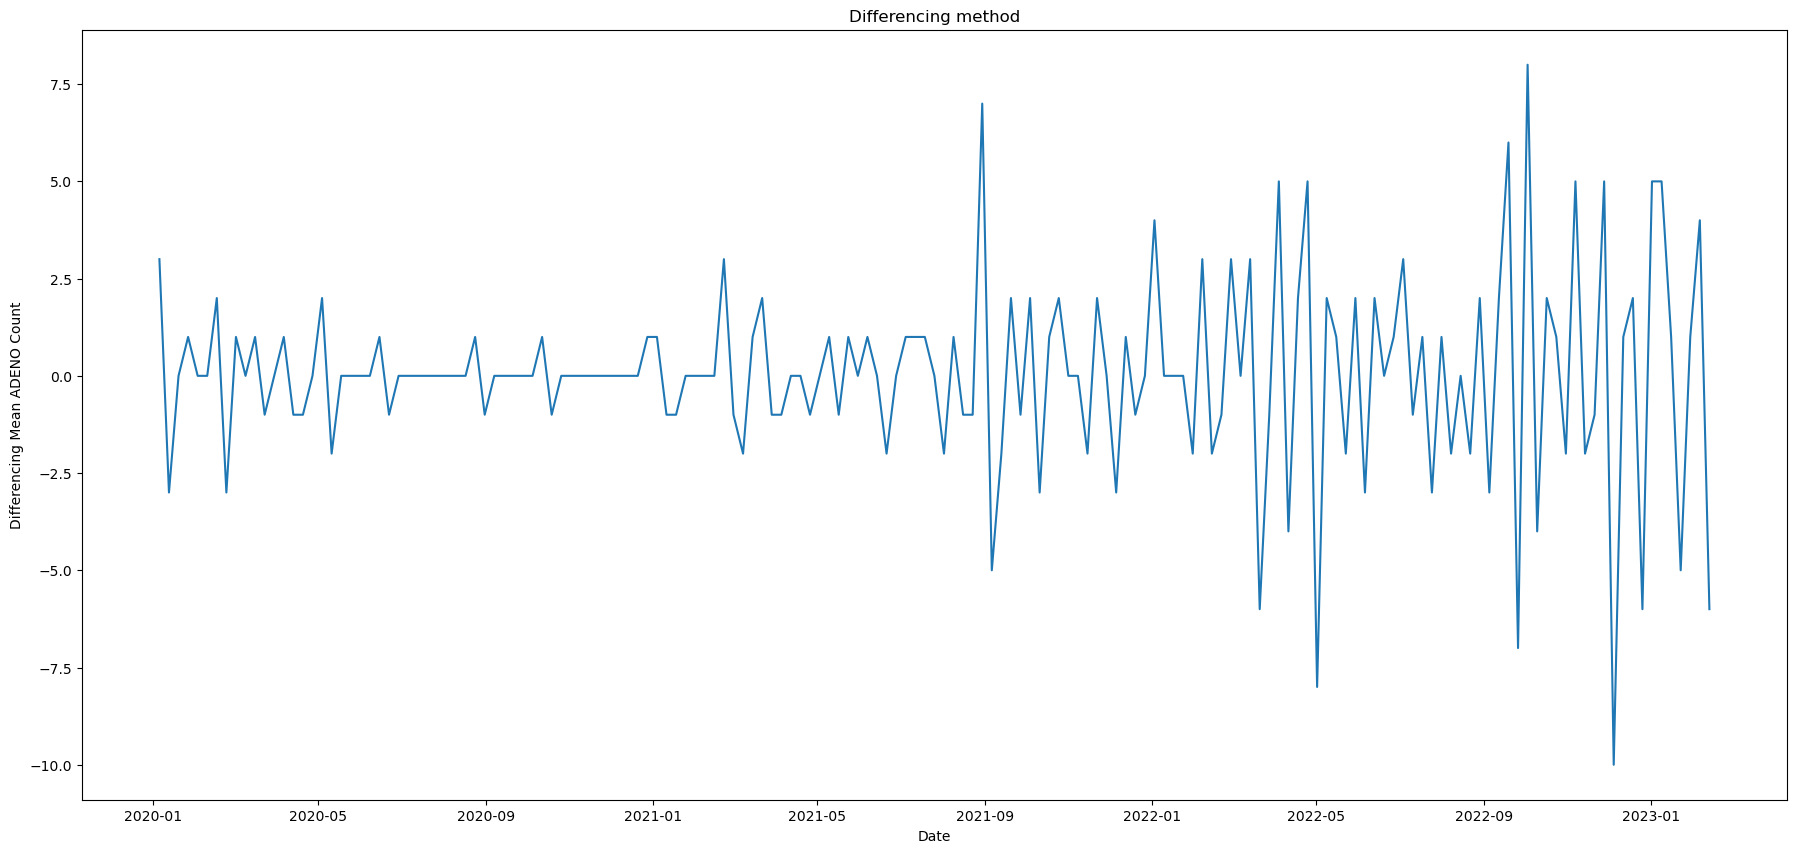

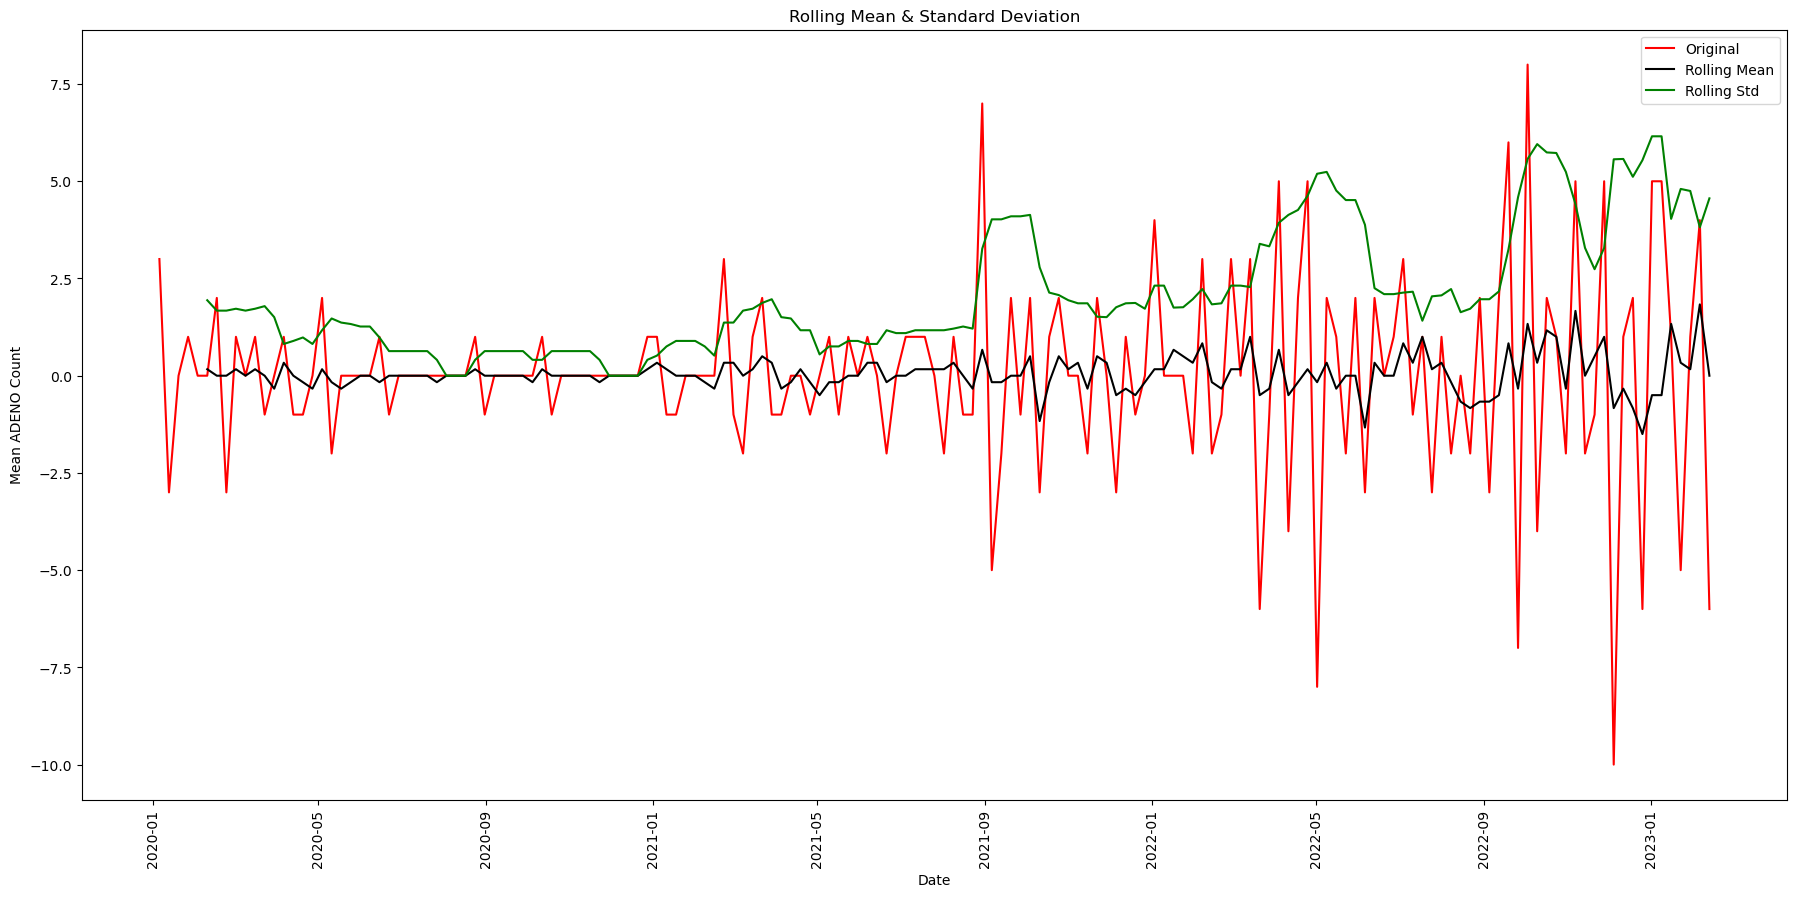

Test statistic:  -5.89616893706844
p-value:  2.8480749400834135e-07
Critical Values: {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


error:  3.897209873645662


In [13]:
mex = df.loc[df['COUNTRY_CODE'] == 'MEX']
ts = mex.loc[:, ['week', 'ADENO']]
ts = ts.sort_values(by = ['week'])
ts.index = ts.week
ts = ts.drop("week", axis = 1)
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel("Mean ADENO Count")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.ADENO)

window_size = 6
moving_avg = ts.rolling(6).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Count of ADENO Influenza")
plt.xlabel("Date")
plt.ylabel("Mean ADENO Count")
plt.legend()
plt.show()


ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.ADENO)


ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean ADENO Count")
plt.show()

ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.ADENO)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = datetime(2022, 11, 28)
end_index = datetime(2024, 1, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index, ts.ADENO, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean ADENO Count")
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.ADENO,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean ADENO Count")
plt.legend()
plt.savefig('graph.png')

plt.show()

#### Mexico Bocavirus

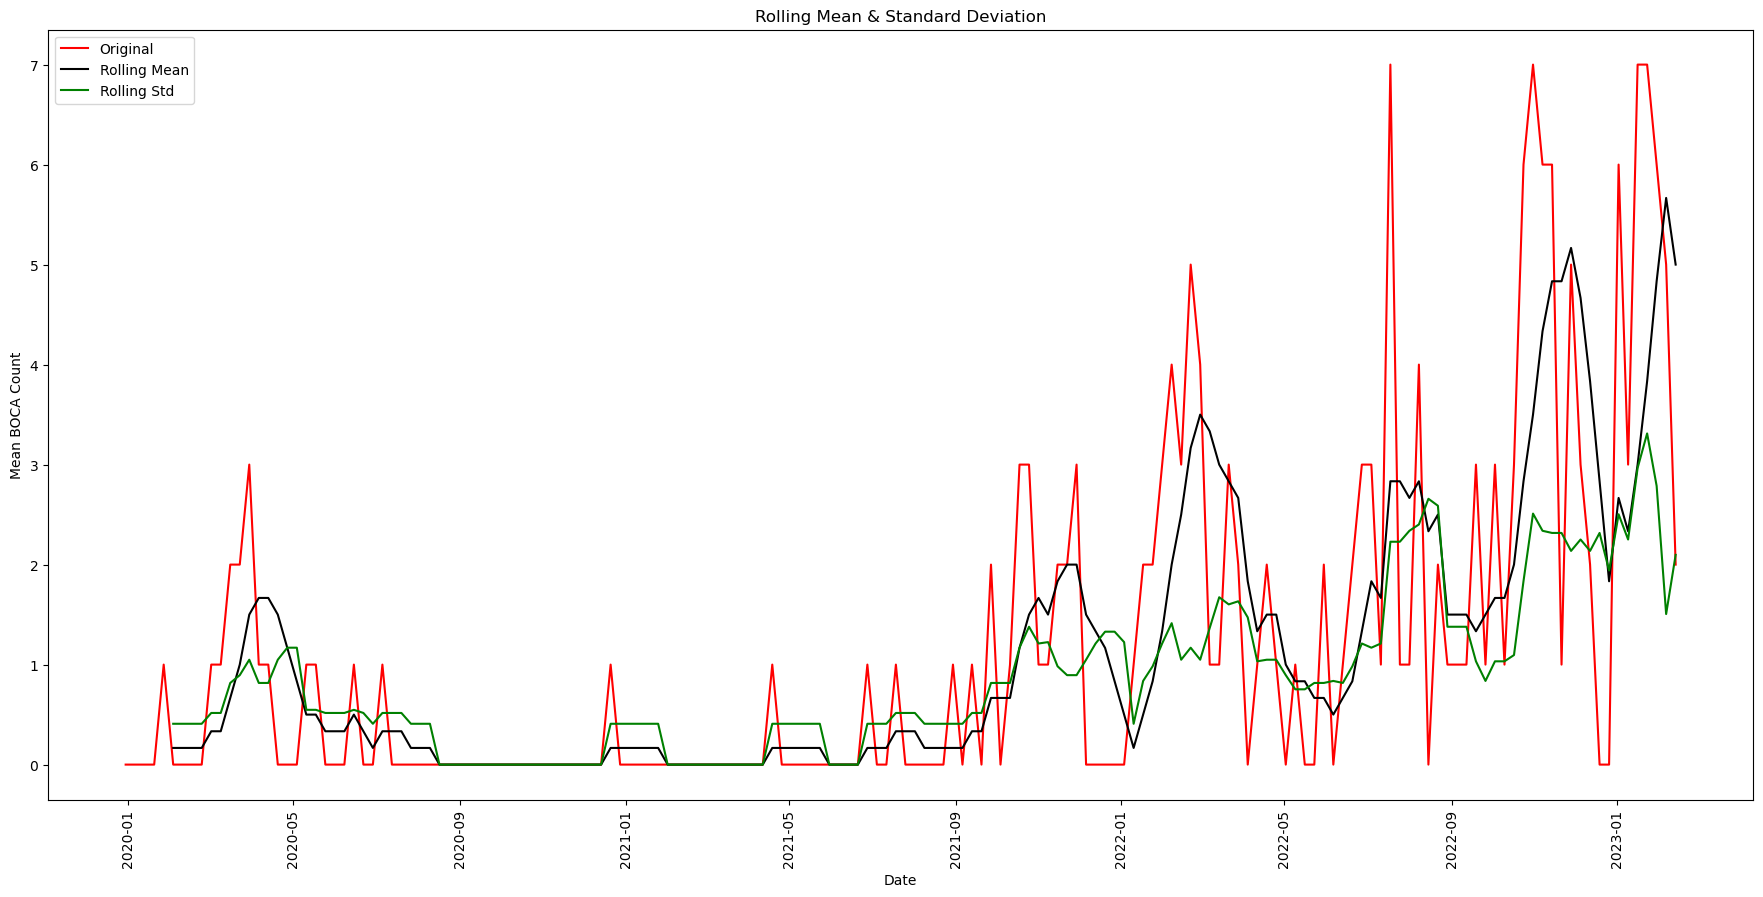

Test statistic:  -1.1117913524824141
p-value:  0.7103468162541594
Critical Values: {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


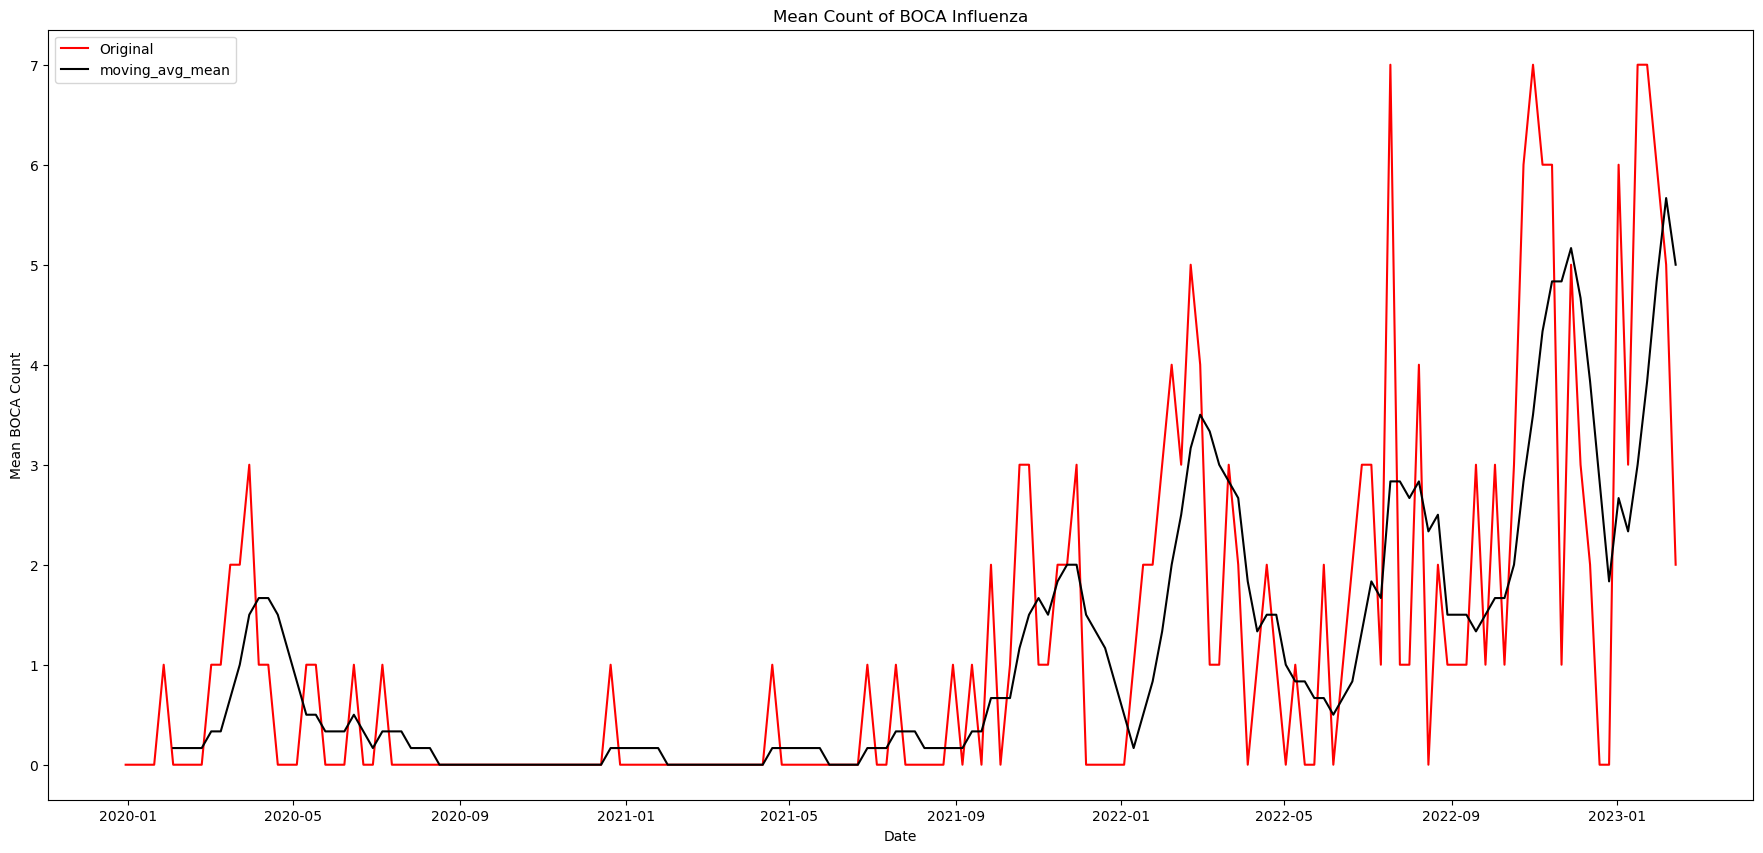

Test statistic:  -7.277124087712268
p-value:  1.5340532913939405e-10
Critical Values: {'1%': -3.4744158894942156, '5%': -2.880878382771059, '10%': -2.577081275821236}


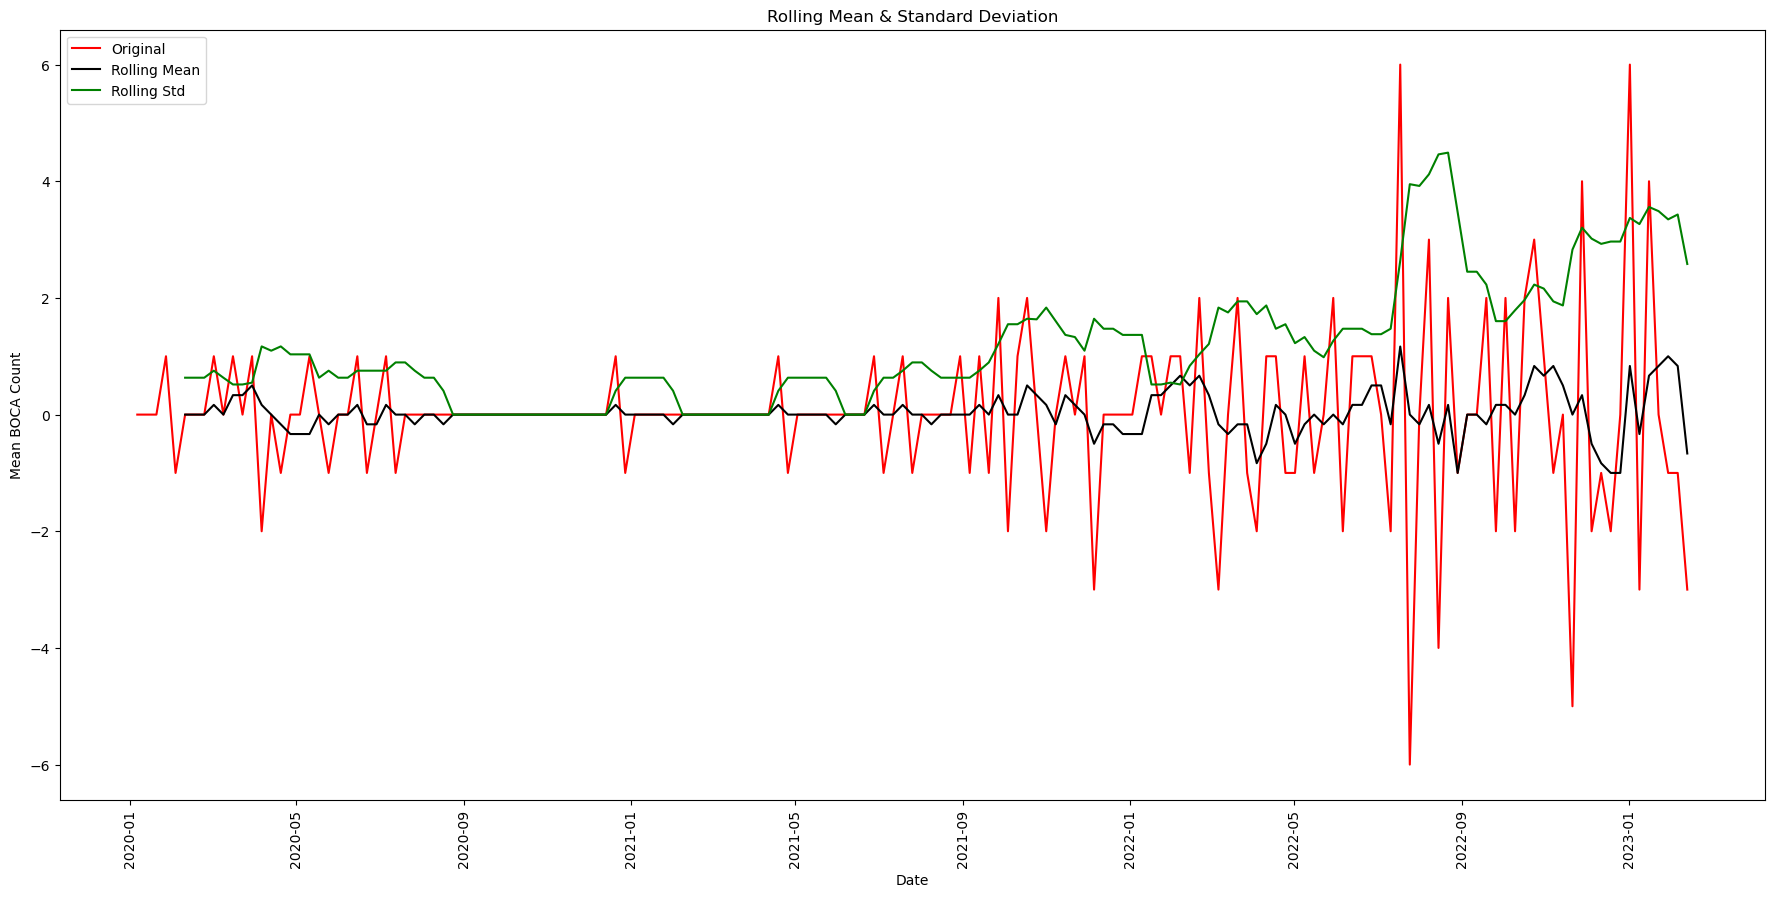

Test statistic:  -7.882897908739601
p-value:  4.6515001951970556e-12
Critical Values: {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


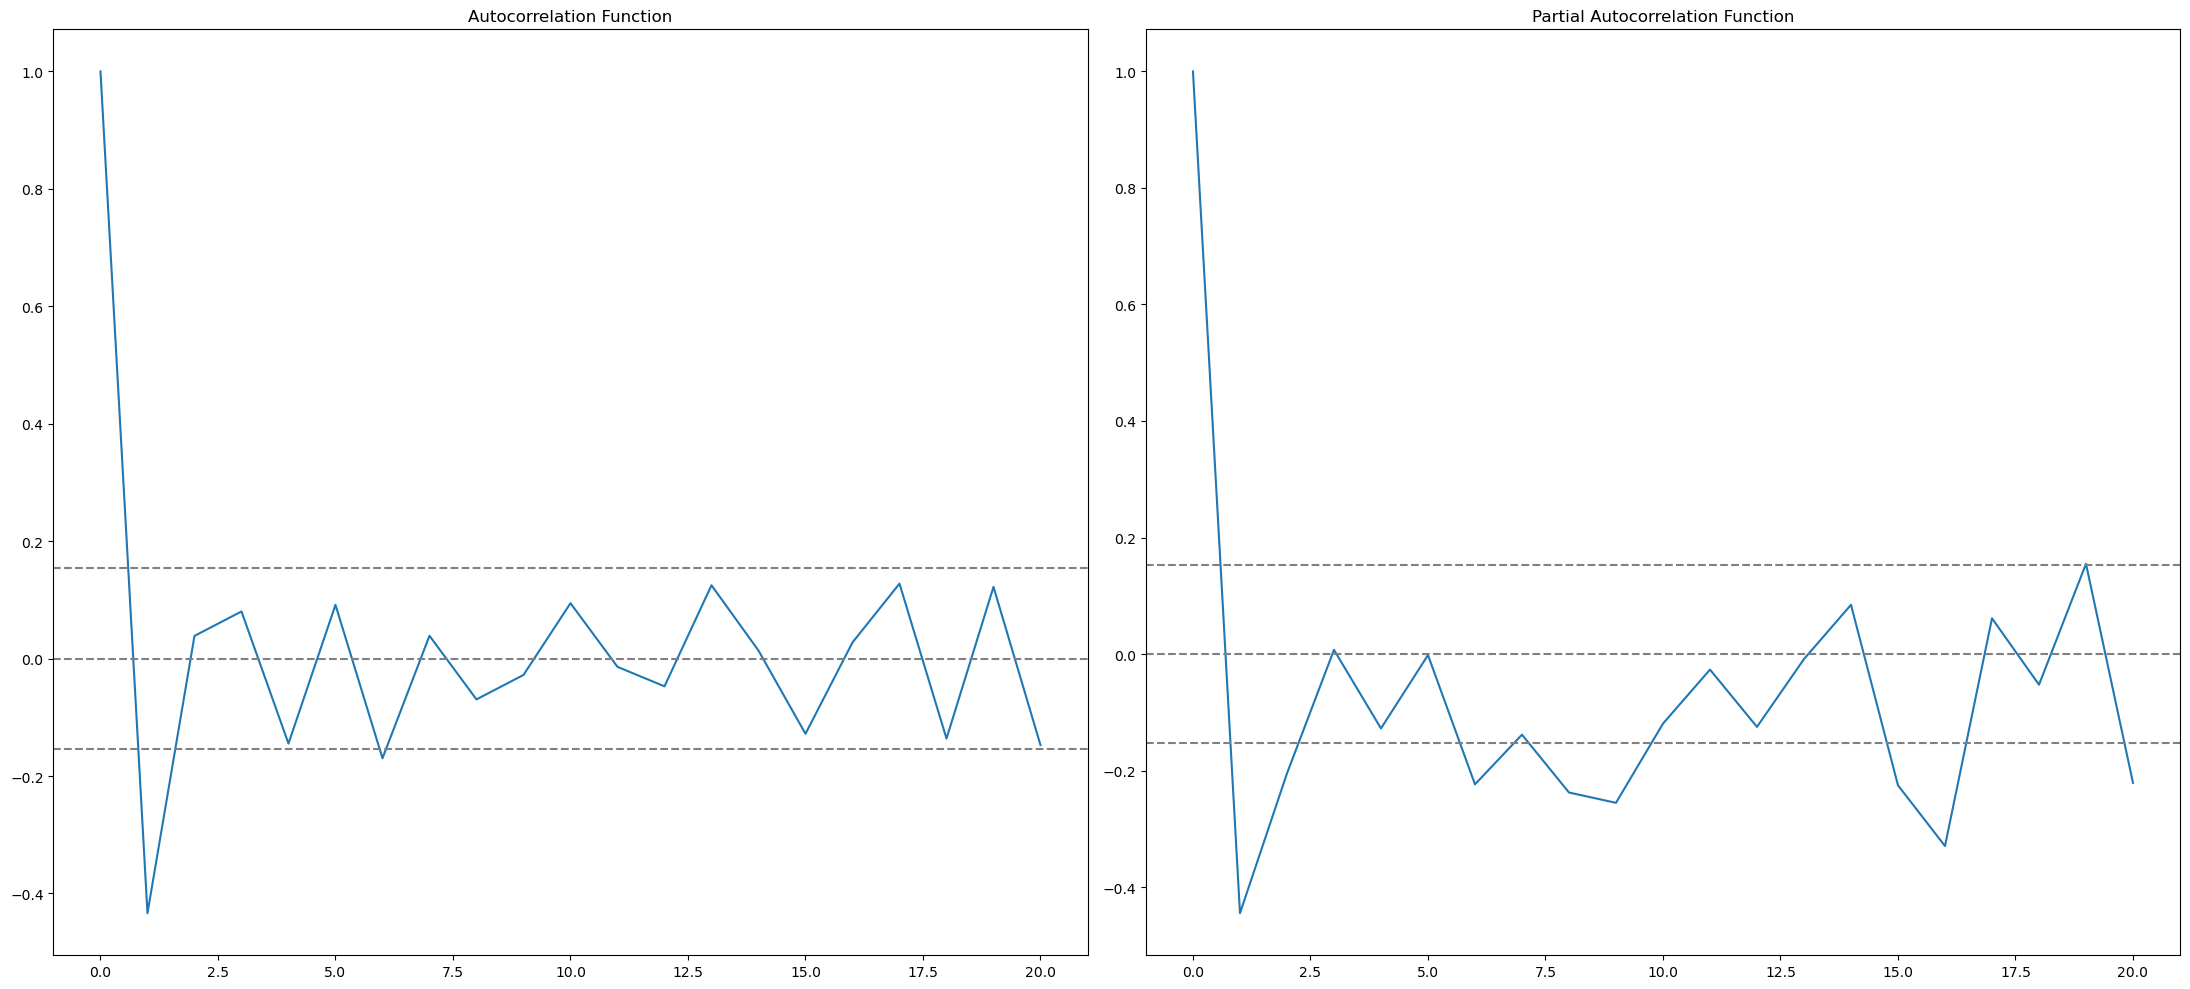

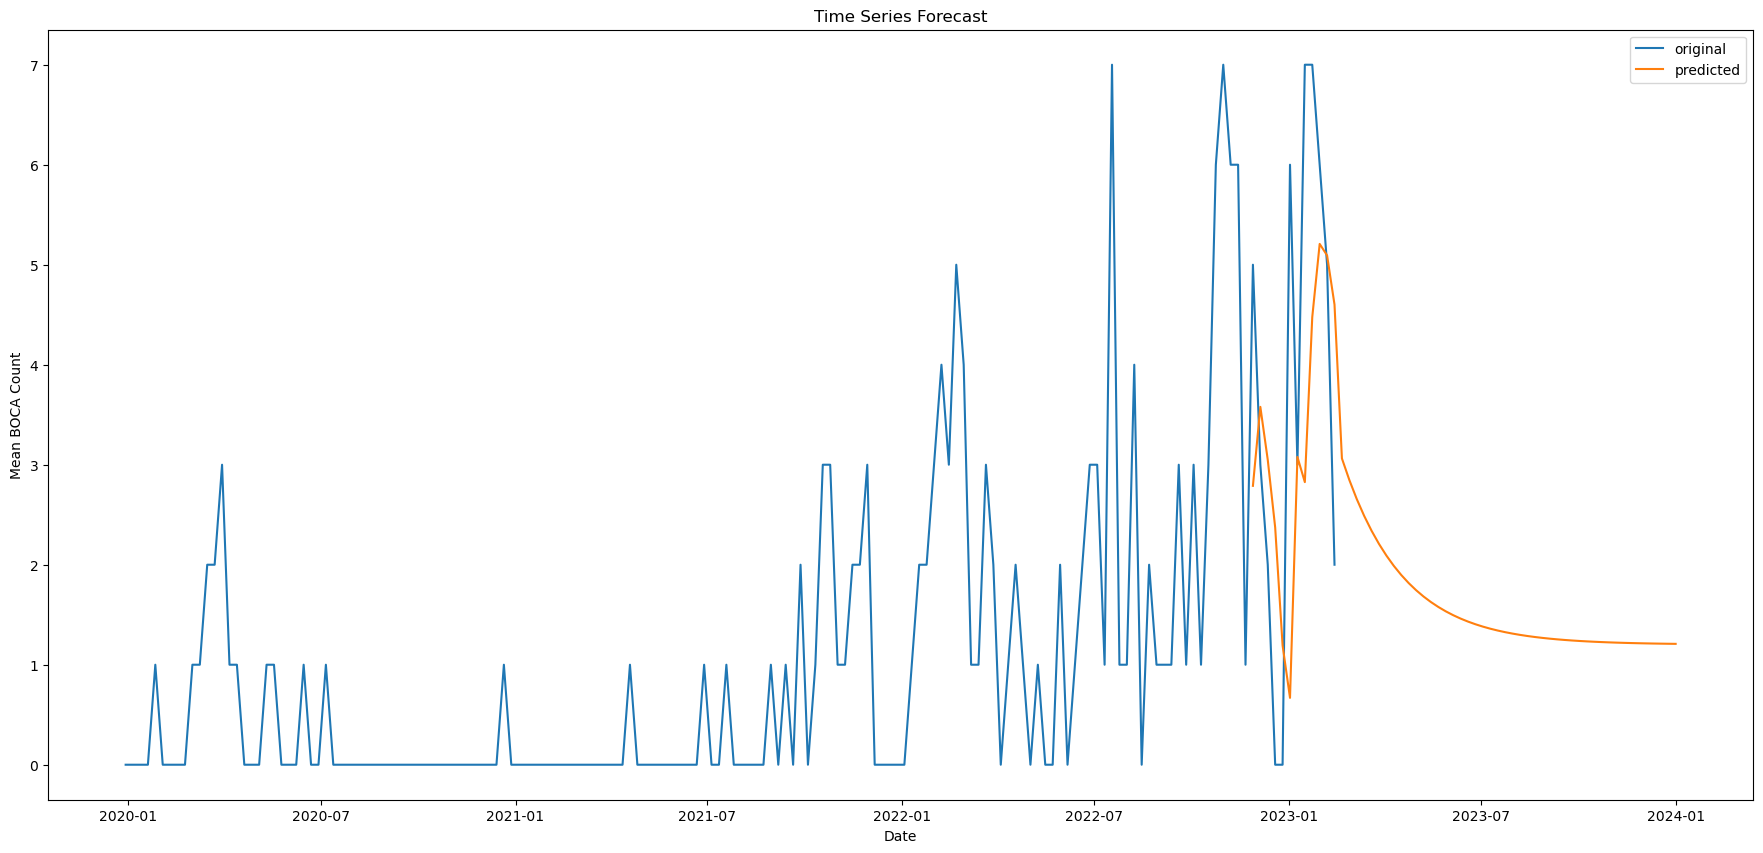

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


error:  1.6319501262393539


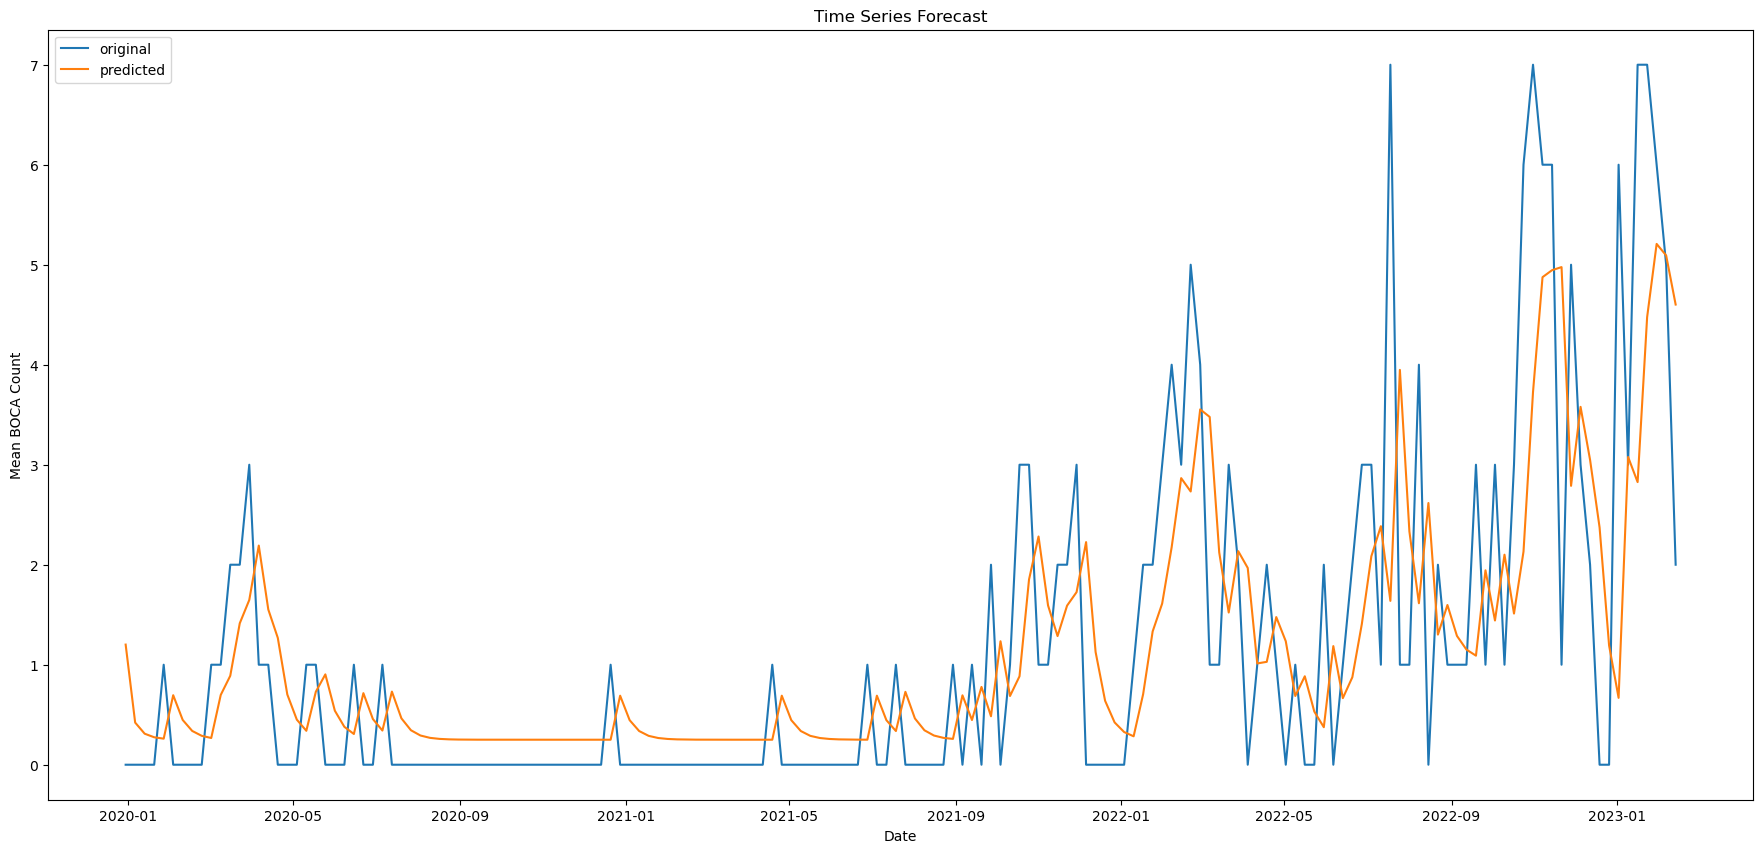

In [14]:
mex = df.loc[df['COUNTRY_CODE'] == 'MEX']
ts = mex.loc[:, ['week', 'BOCA']]
ts = ts.sort_values(by = ['week'])
ts.index = ts.week
ts = ts.drop("week", axis = 1)
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel("Mean BOCA Count")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.BOCA)

window_size = 6
moving_avg = ts.rolling(6).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Count of BOCA Influenza")
plt.xlabel("Date")
plt.ylabel("Mean BOCA Count")
plt.legend()
plt.show()


ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.BOCA)


ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean BOCA Count")
plt.show()

ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.BOCA)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = datetime(2022, 11, 28)
end_index = datetime(2024, 1, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index, ts.BOCA, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean BOCA Count")
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.BOCA,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean BOCA Count")
plt.legend()
plt.savefig('graph.png')

plt.show()

#### Mexico Coronavirus

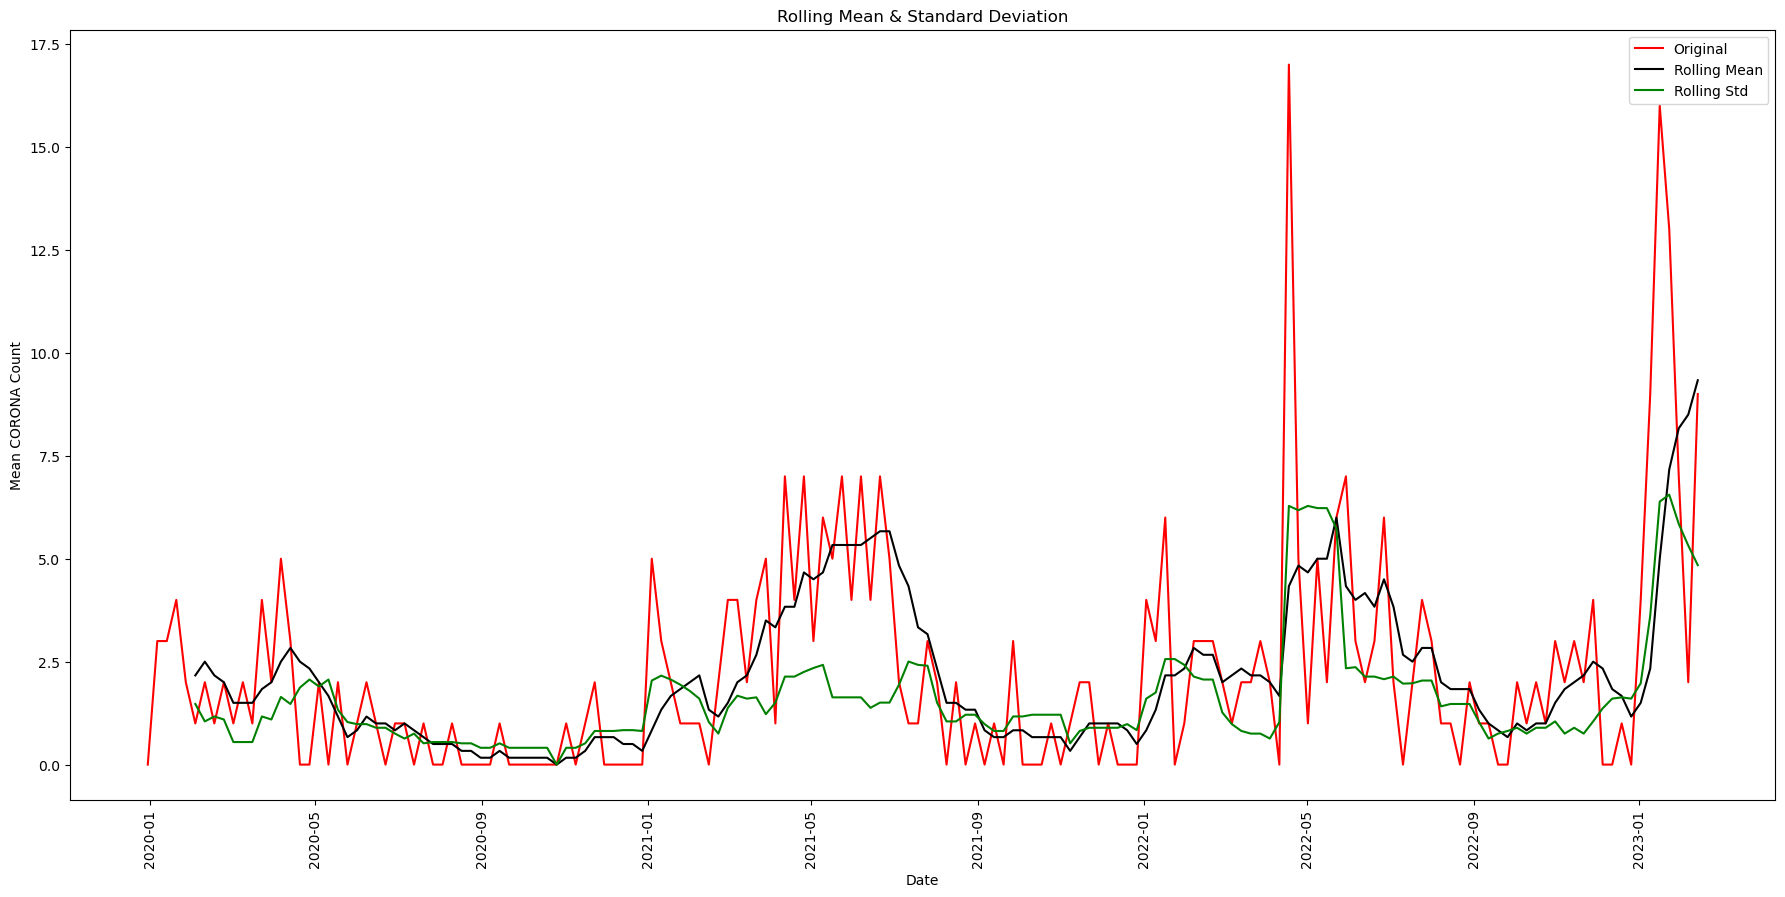

Test statistic:  -5.226604812043649
p-value:  7.75656717699402e-06
Critical Values: {'1%': -3.471374345647024, '5%': -2.8795521079291966, '10%': -2.5763733302850174}


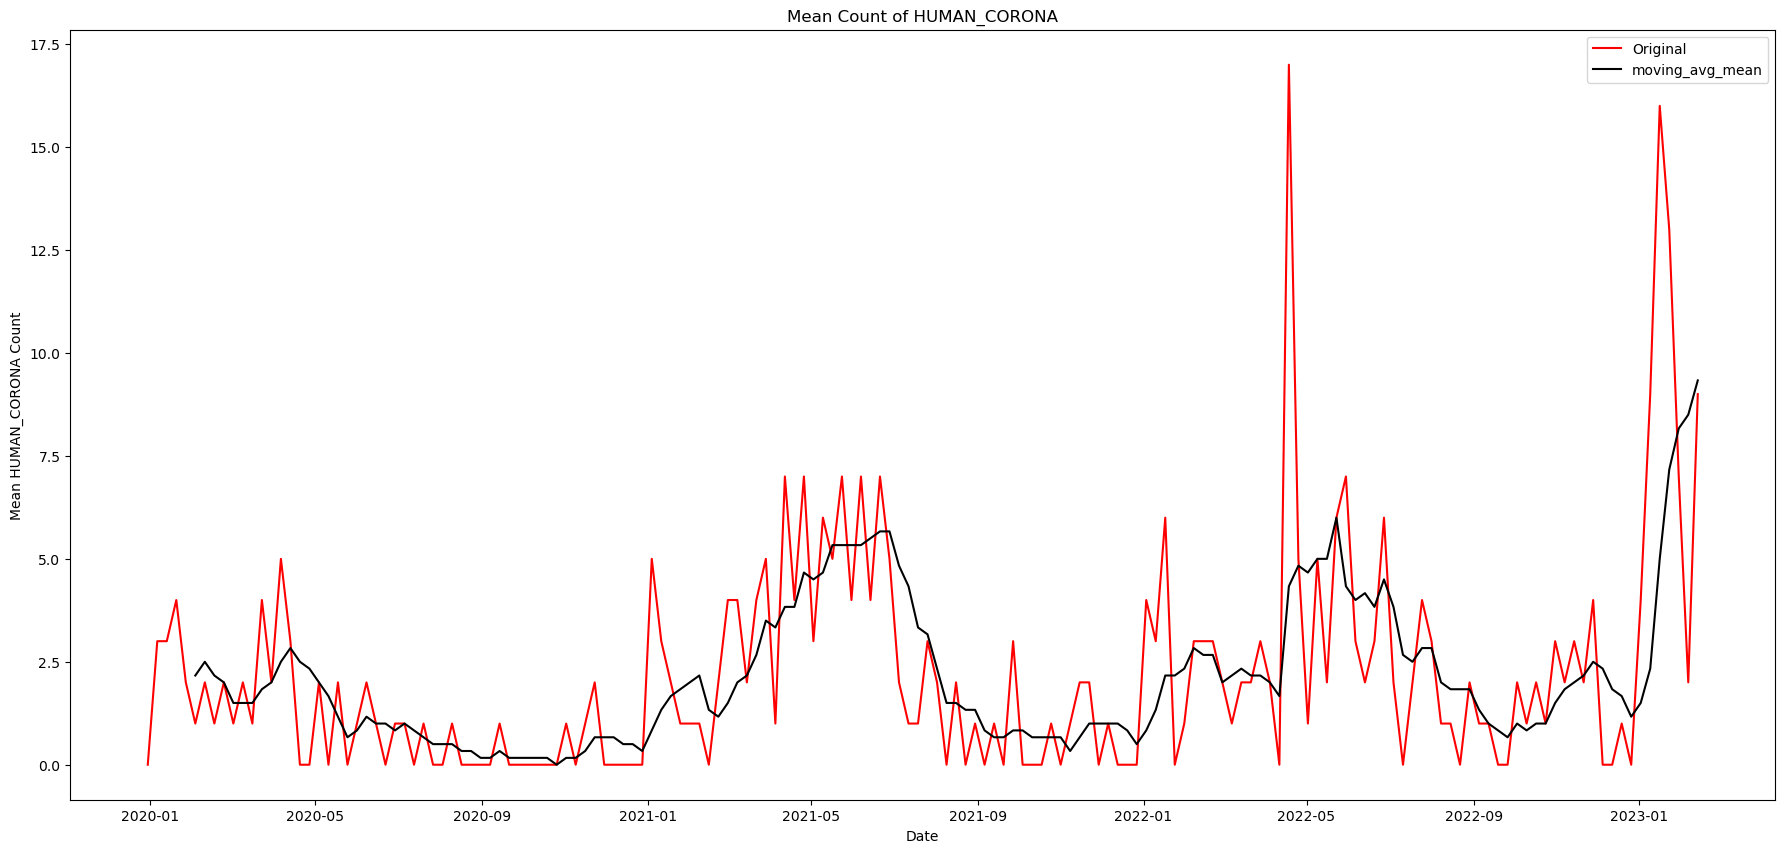

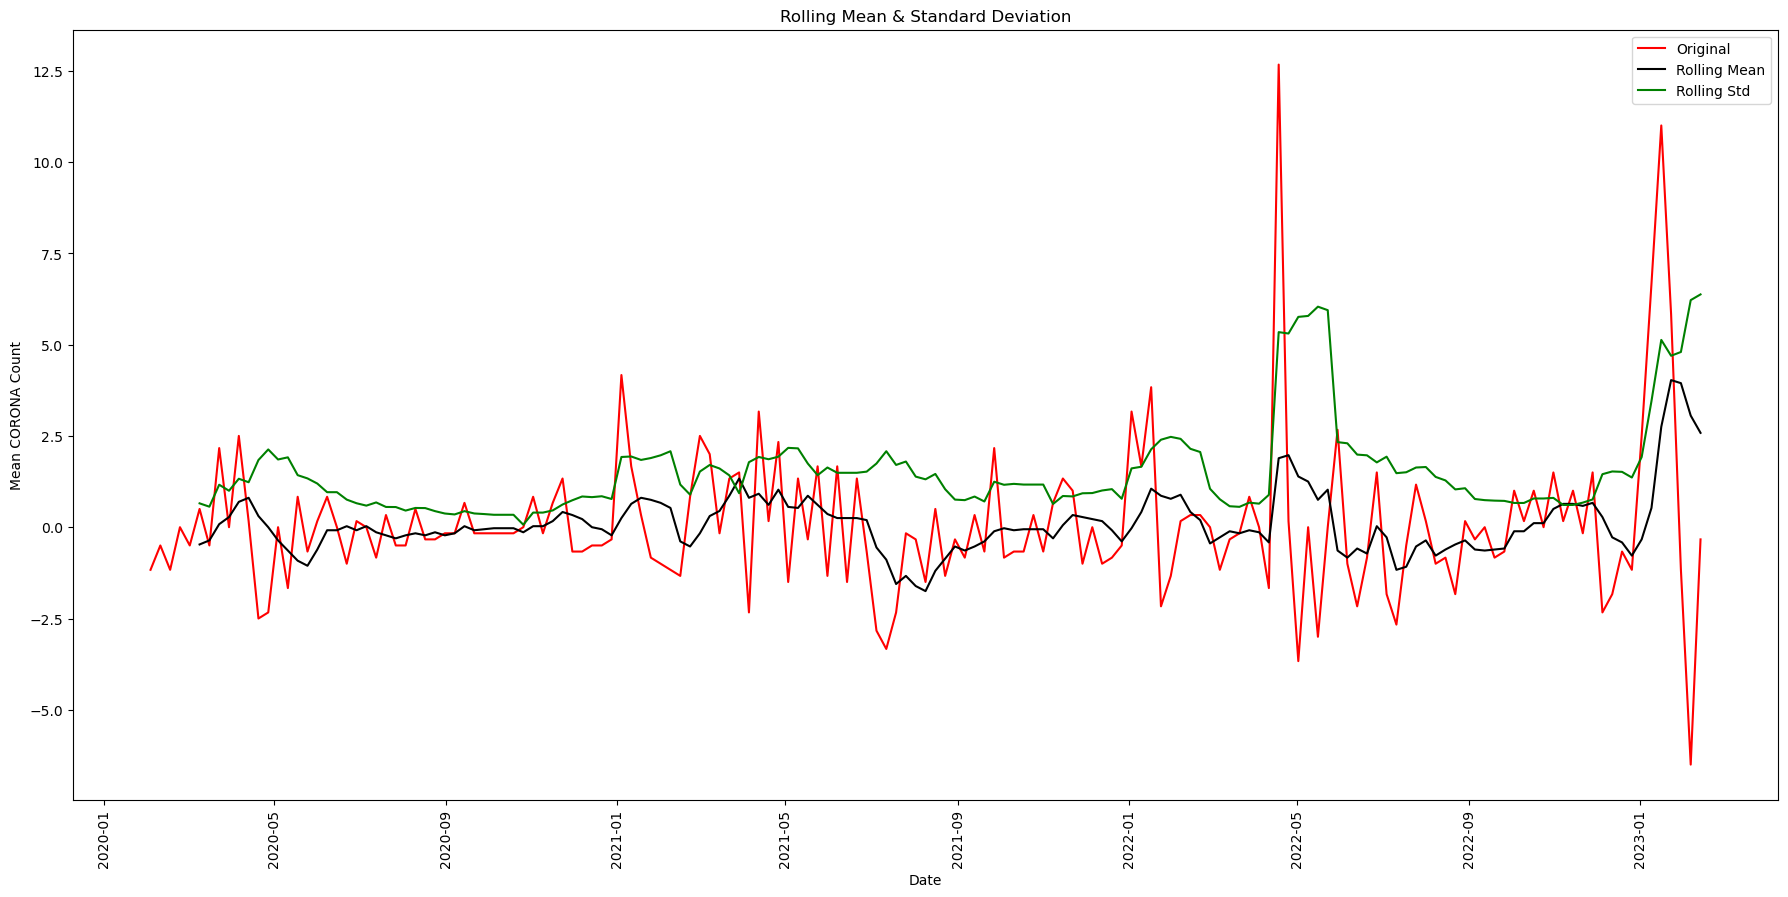

Test statistic:  -7.9970808556652075
p-value:  2.388261159909799e-12
Critical Values: {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5767469641683105}


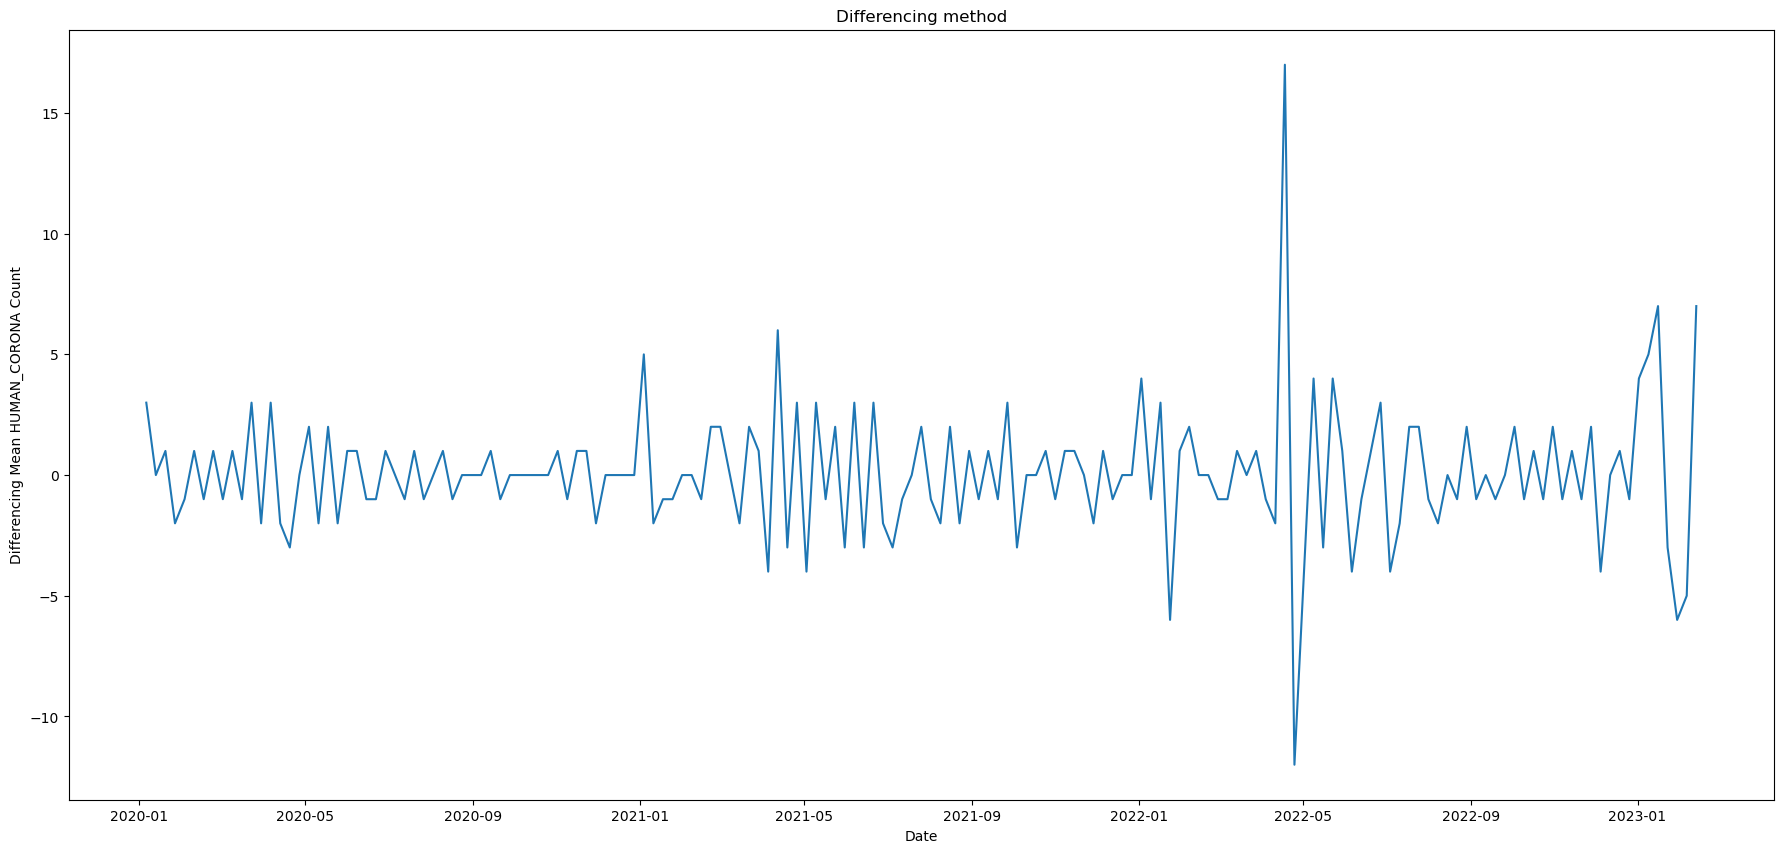

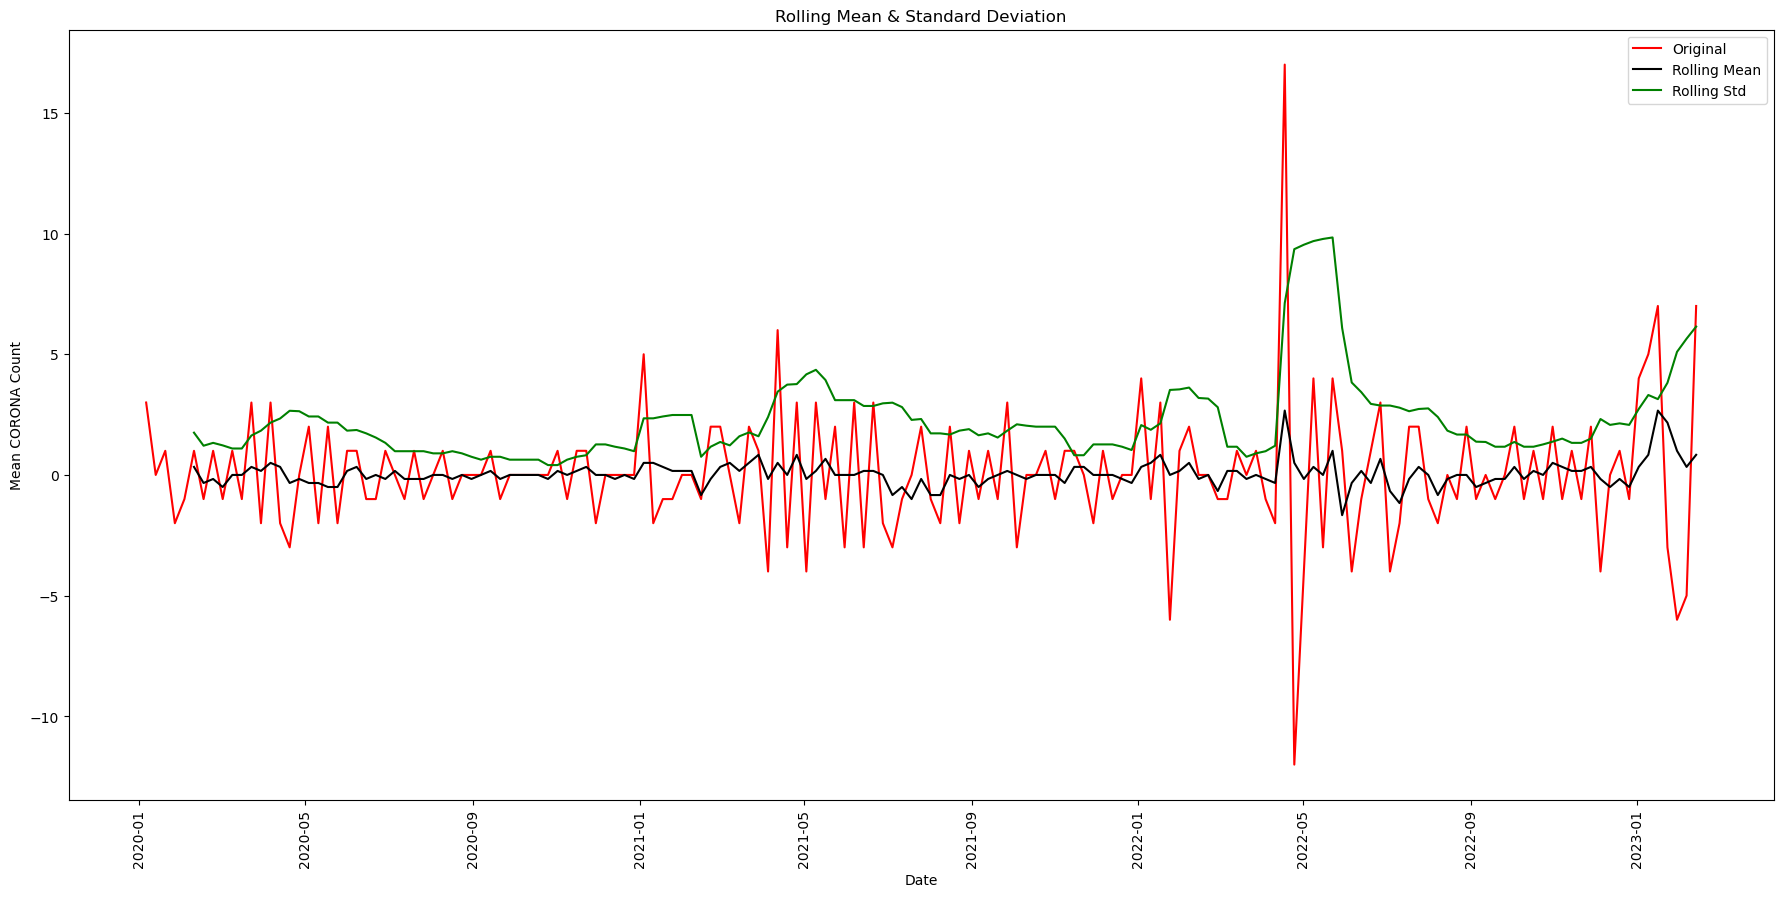

Test statistic:  -8.90851017984323
p-value:  1.1207406453888791e-14
Critical Values: {'1%': -3.4724305215713156, '5%': -2.8800127935315465, '10%': -2.576619230892485}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


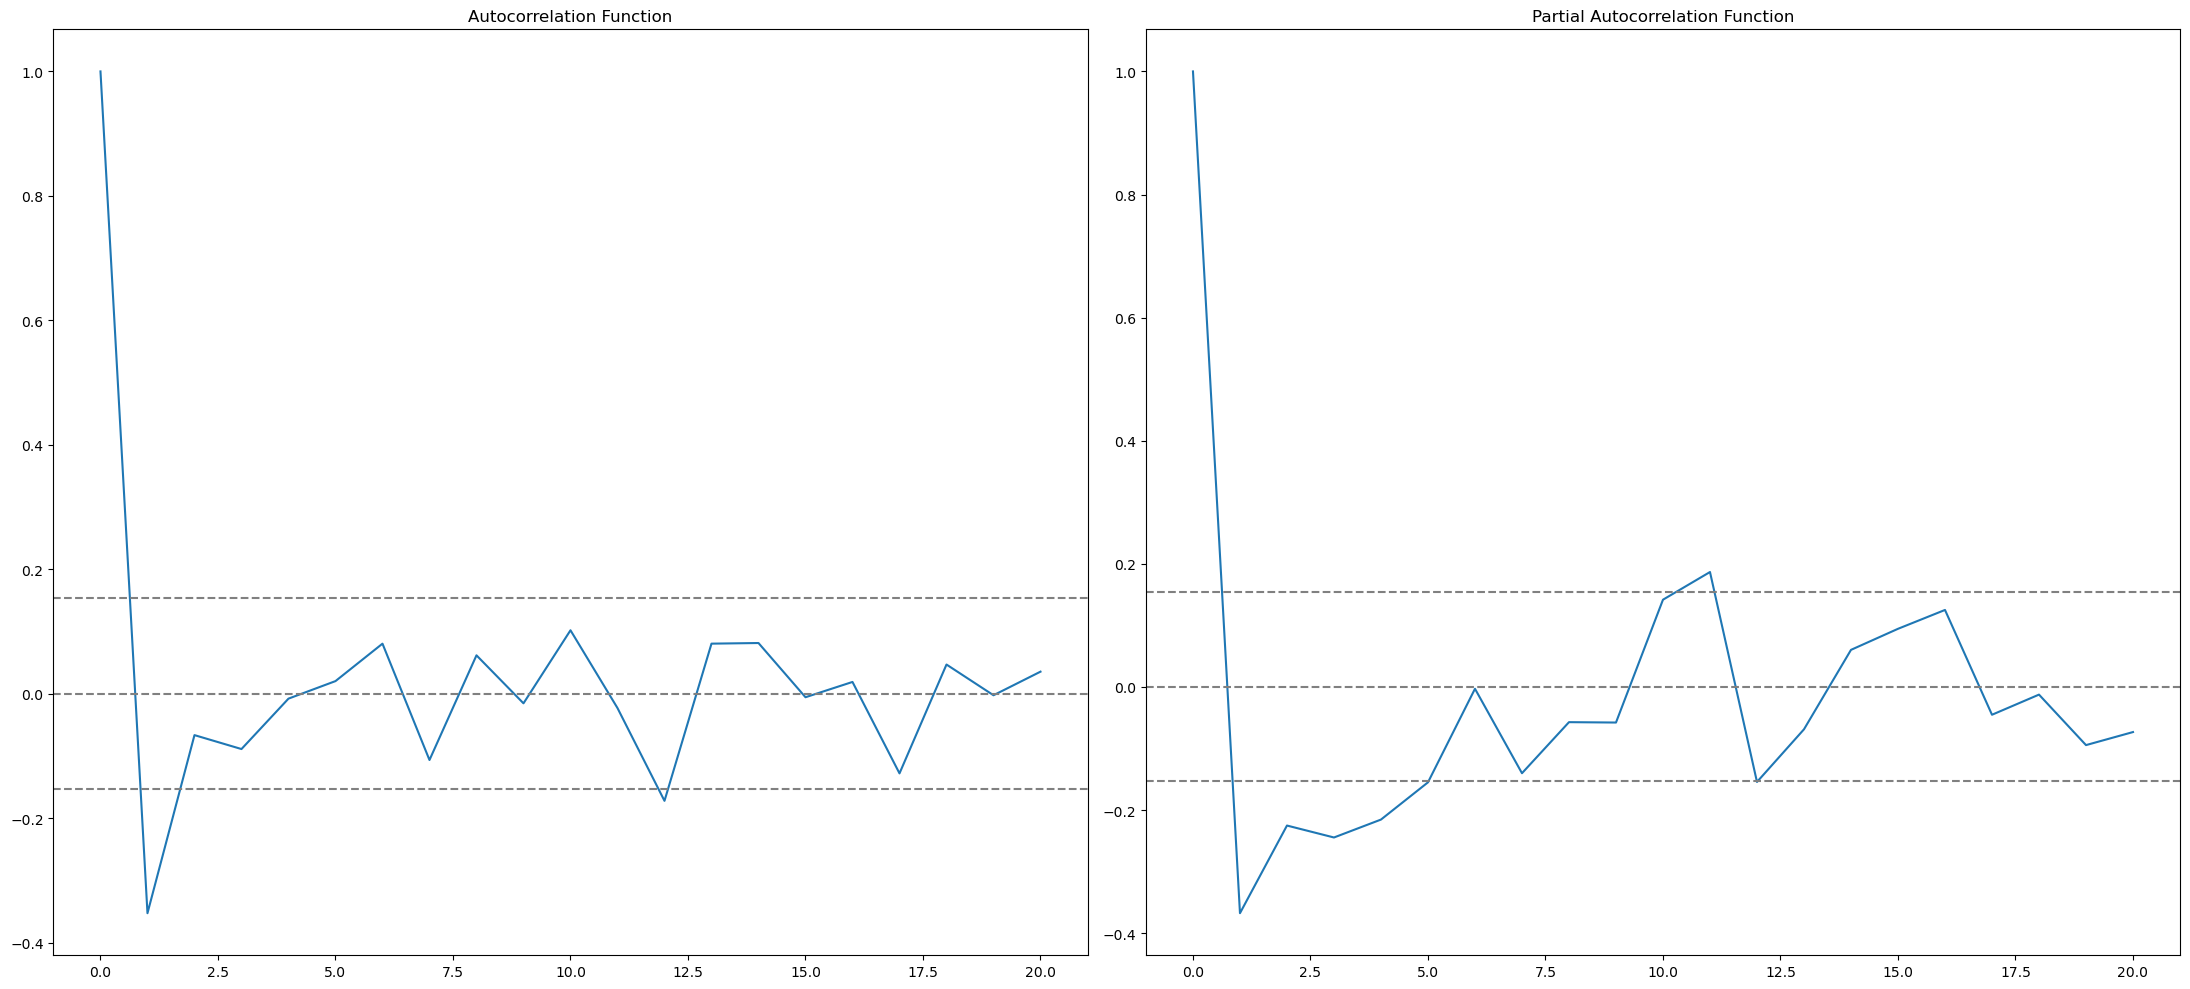

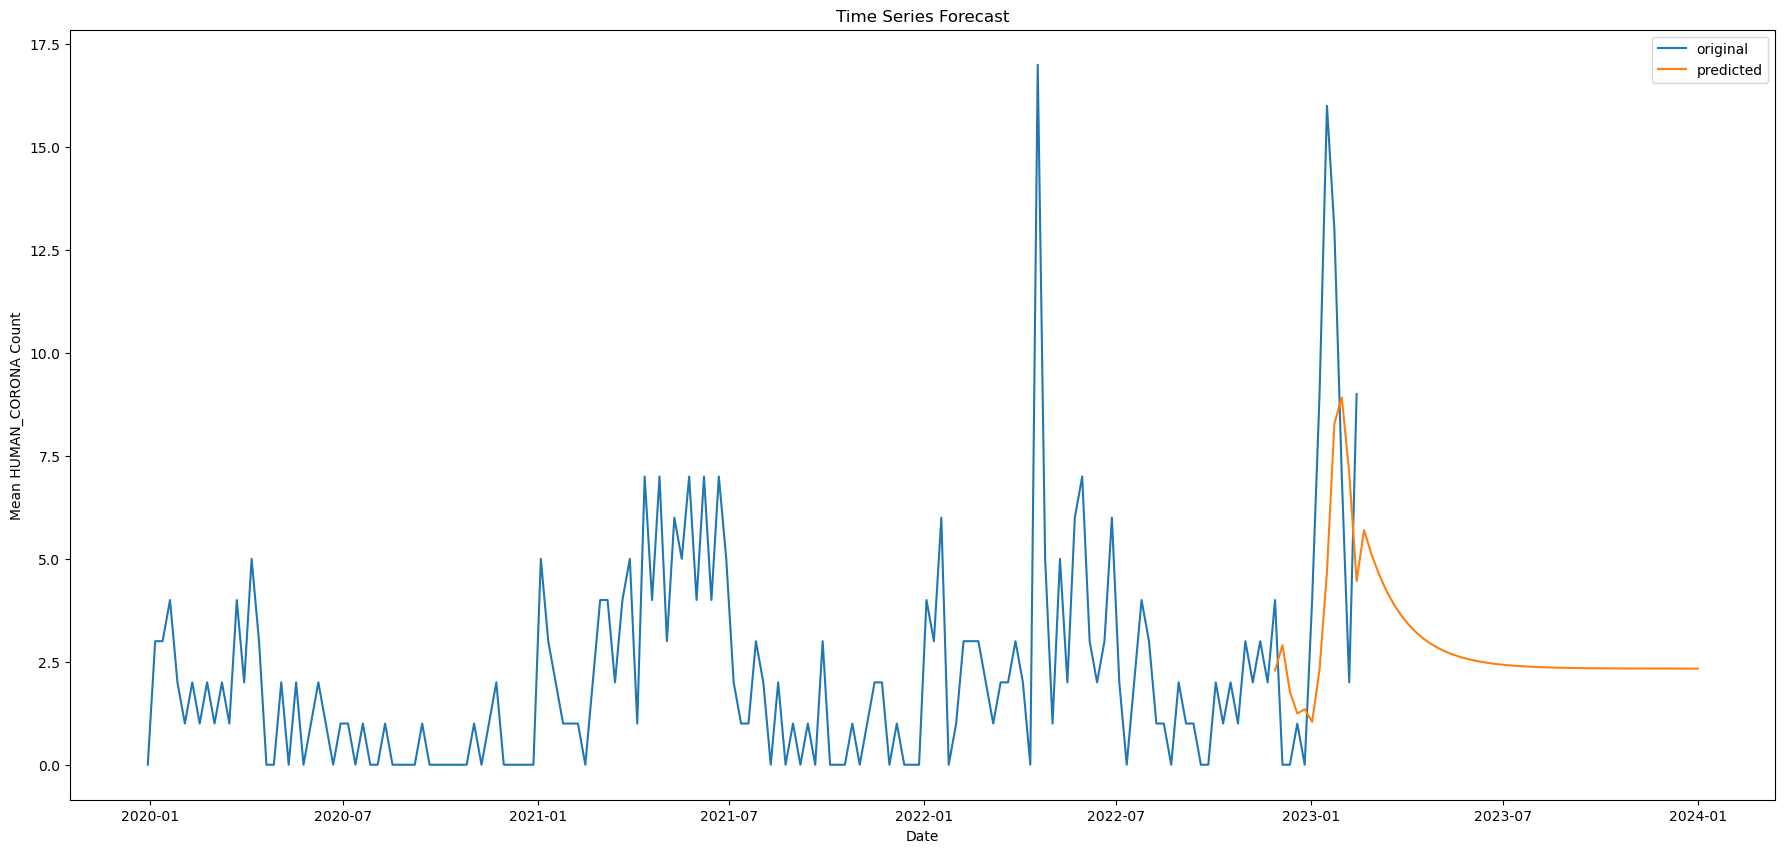

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


error:  5.4510025709461924


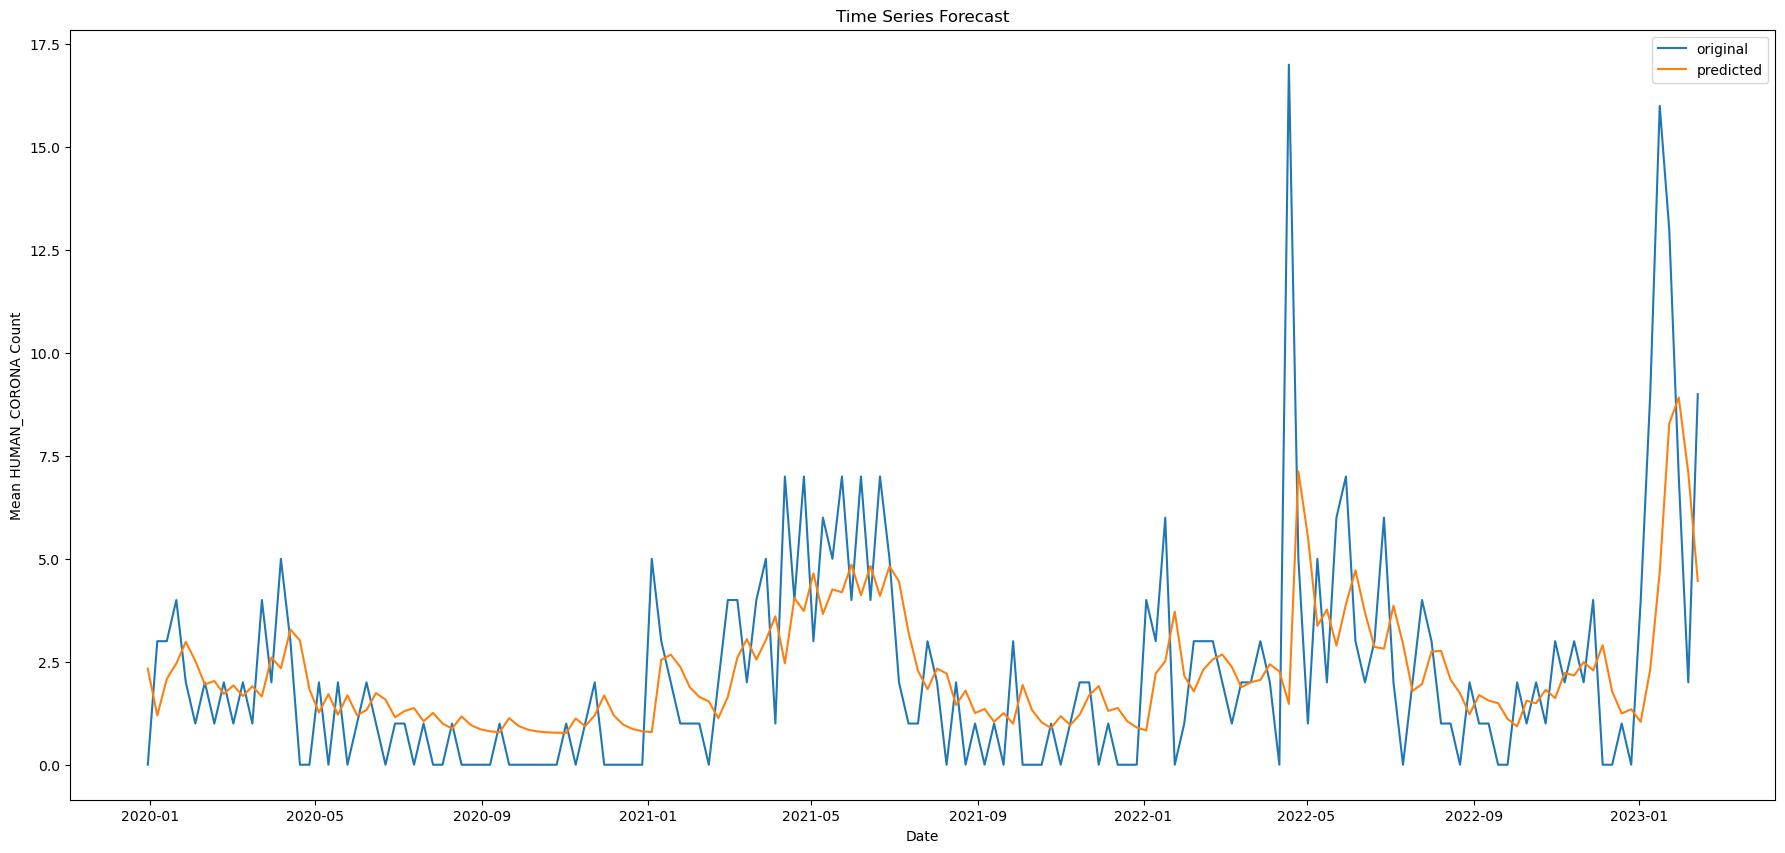

In [15]:
mex = df.loc[df['COUNTRY_CODE'] == 'MEX']
ts = mex.loc[:, ['week', 'HUMAN_CORONA']]
ts = ts.sort_values(by = ['week'])
ts.index = ts.week
ts = ts.drop("week", axis = 1)
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel("Mean CORONA Count")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.HUMAN_CORONA)

window_size = 6
moving_avg = ts.rolling(6).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Count of HUMAN_CORONA")
plt.xlabel("Date")
plt.ylabel("Mean HUMAN_CORONA Count")
plt.legend()
plt.show()


ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.HUMAN_CORONA)


ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean HUMAN_CORONA Count")
plt.show()

ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.HUMAN_CORONA)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = datetime(2022, 11, 28)
end_index = datetime(2024, 1, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index, ts.HUMAN_CORONA, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean HUMAN_CORONA Count")
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.HUMAN_CORONA,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean HUMAN_CORONA Count")
plt.legend()
plt.savefig('graph.png')

plt.show()

#### Mexico Metapneumovirus

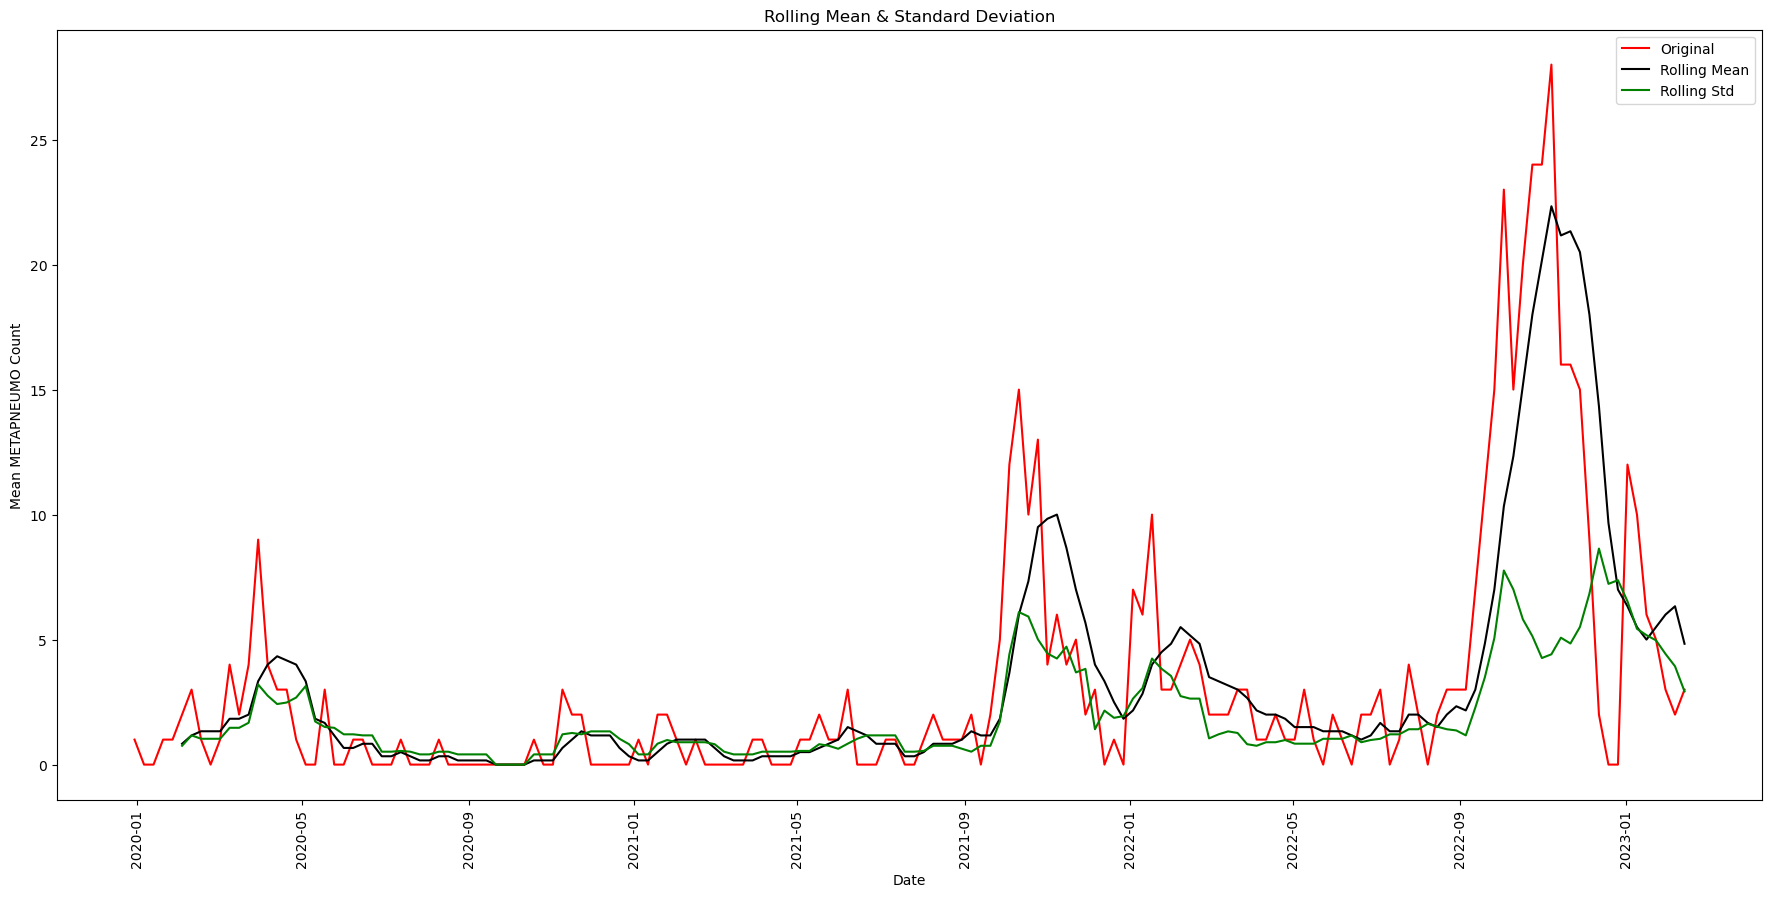

Test statistic:  -3.4546967150750567
p-value:  0.009229720361508074
Critical Values: {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}


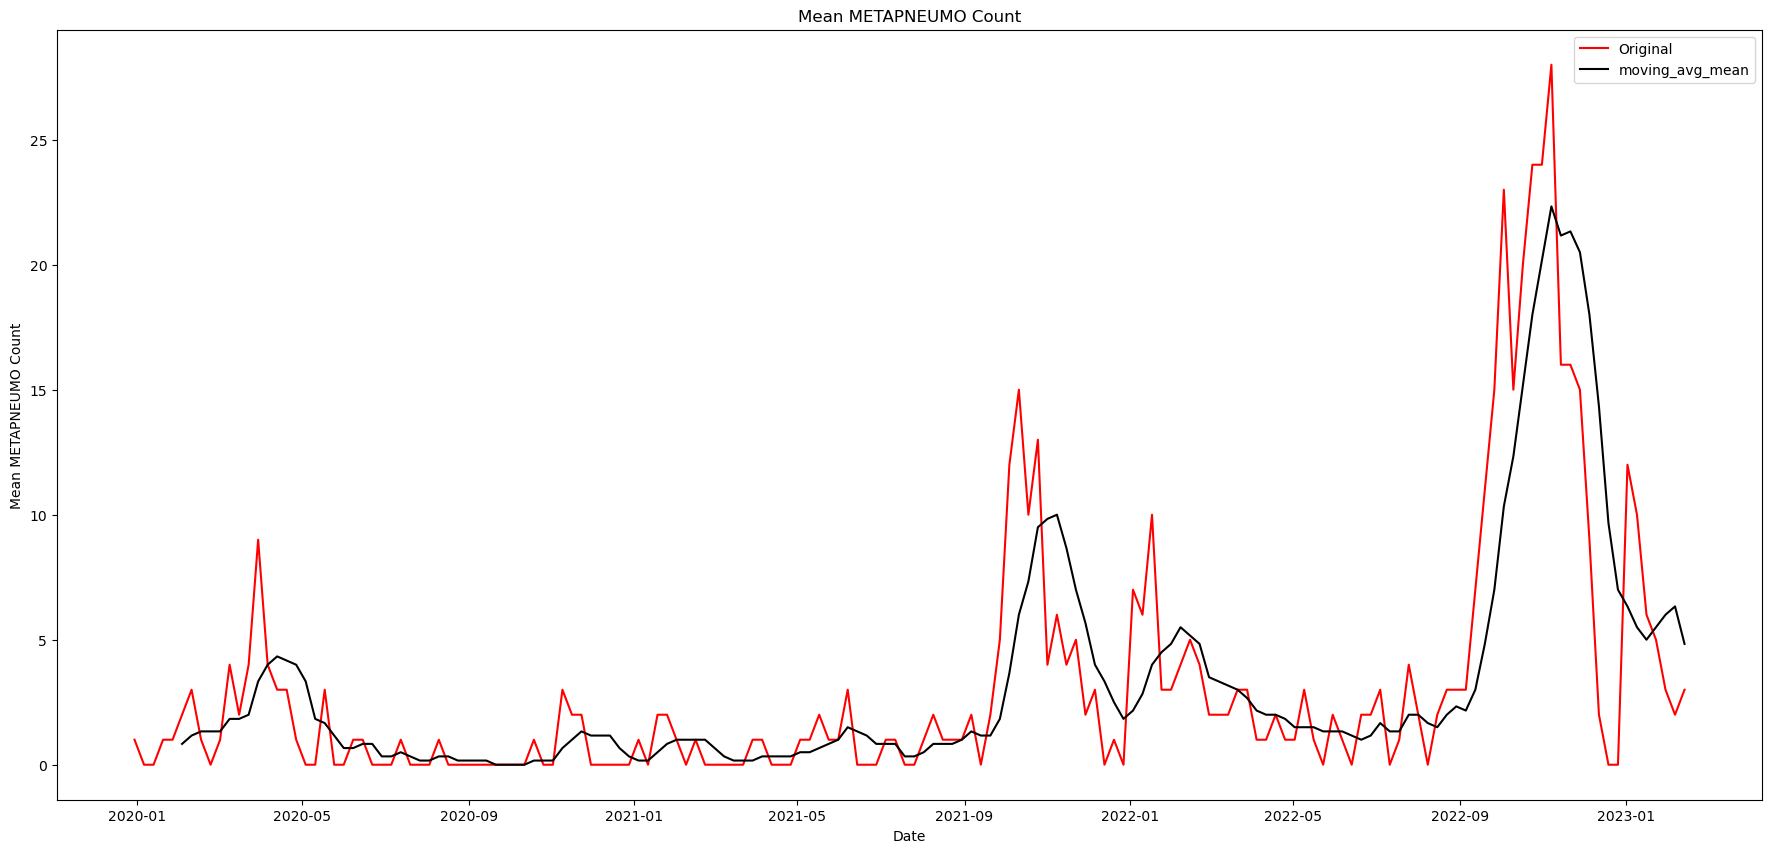

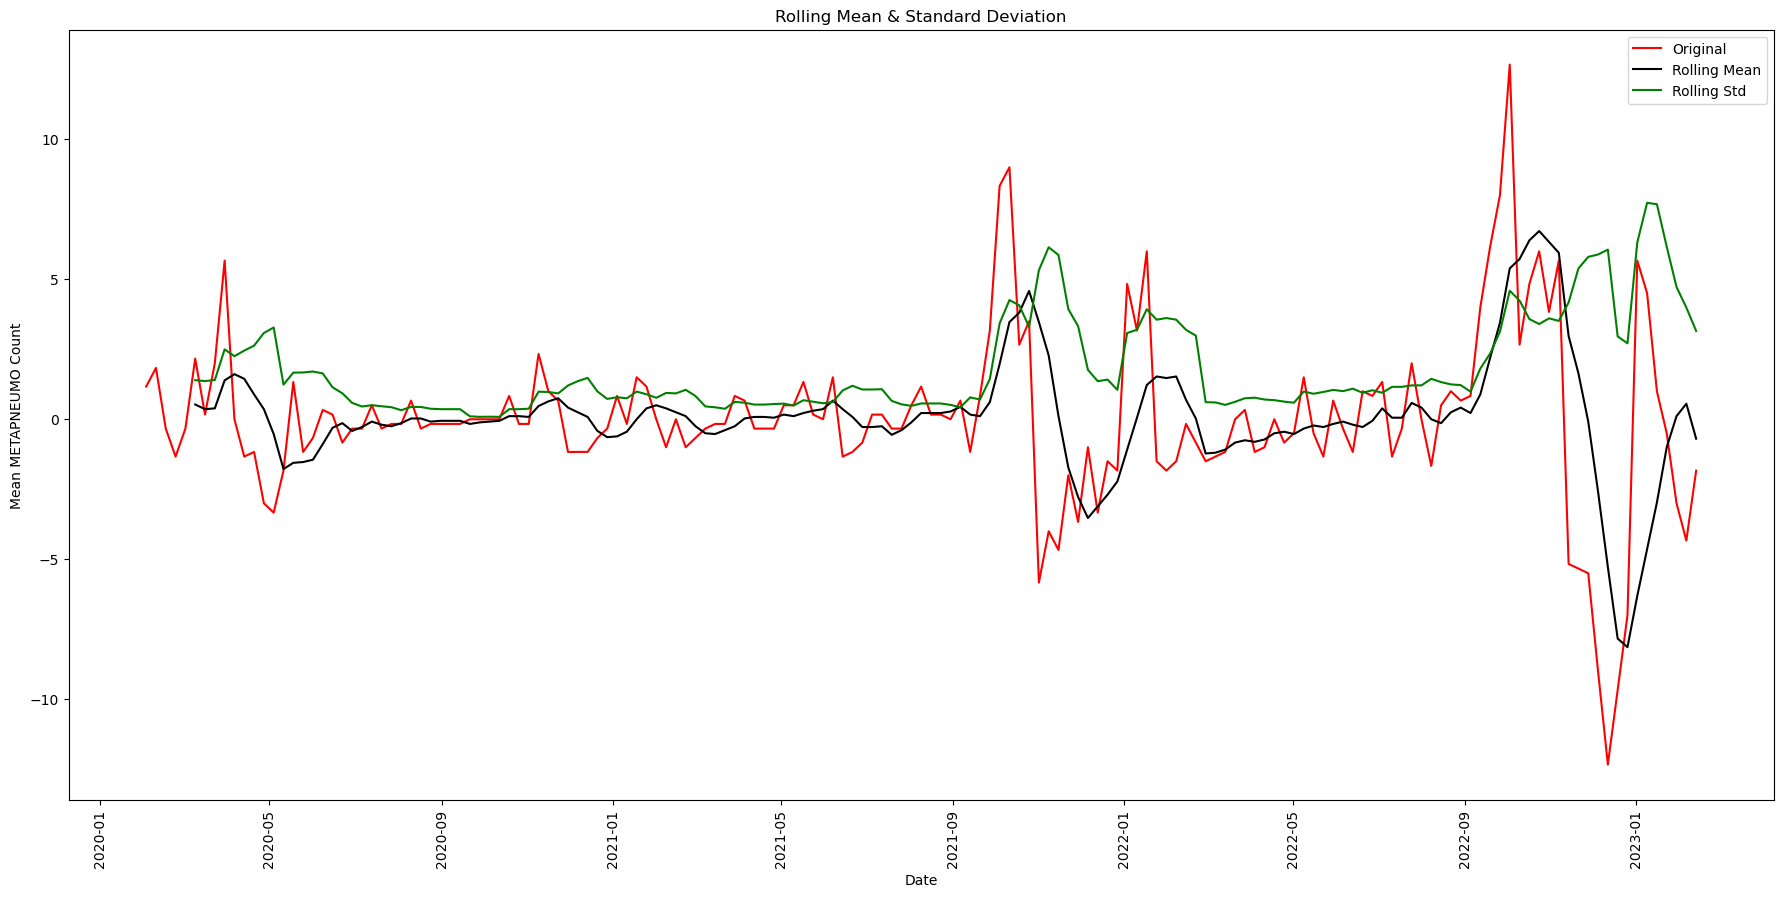

Test statistic:  -5.8934588363413685
p-value:  2.8879842348362404e-07
Critical Values: {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5767469641683105}


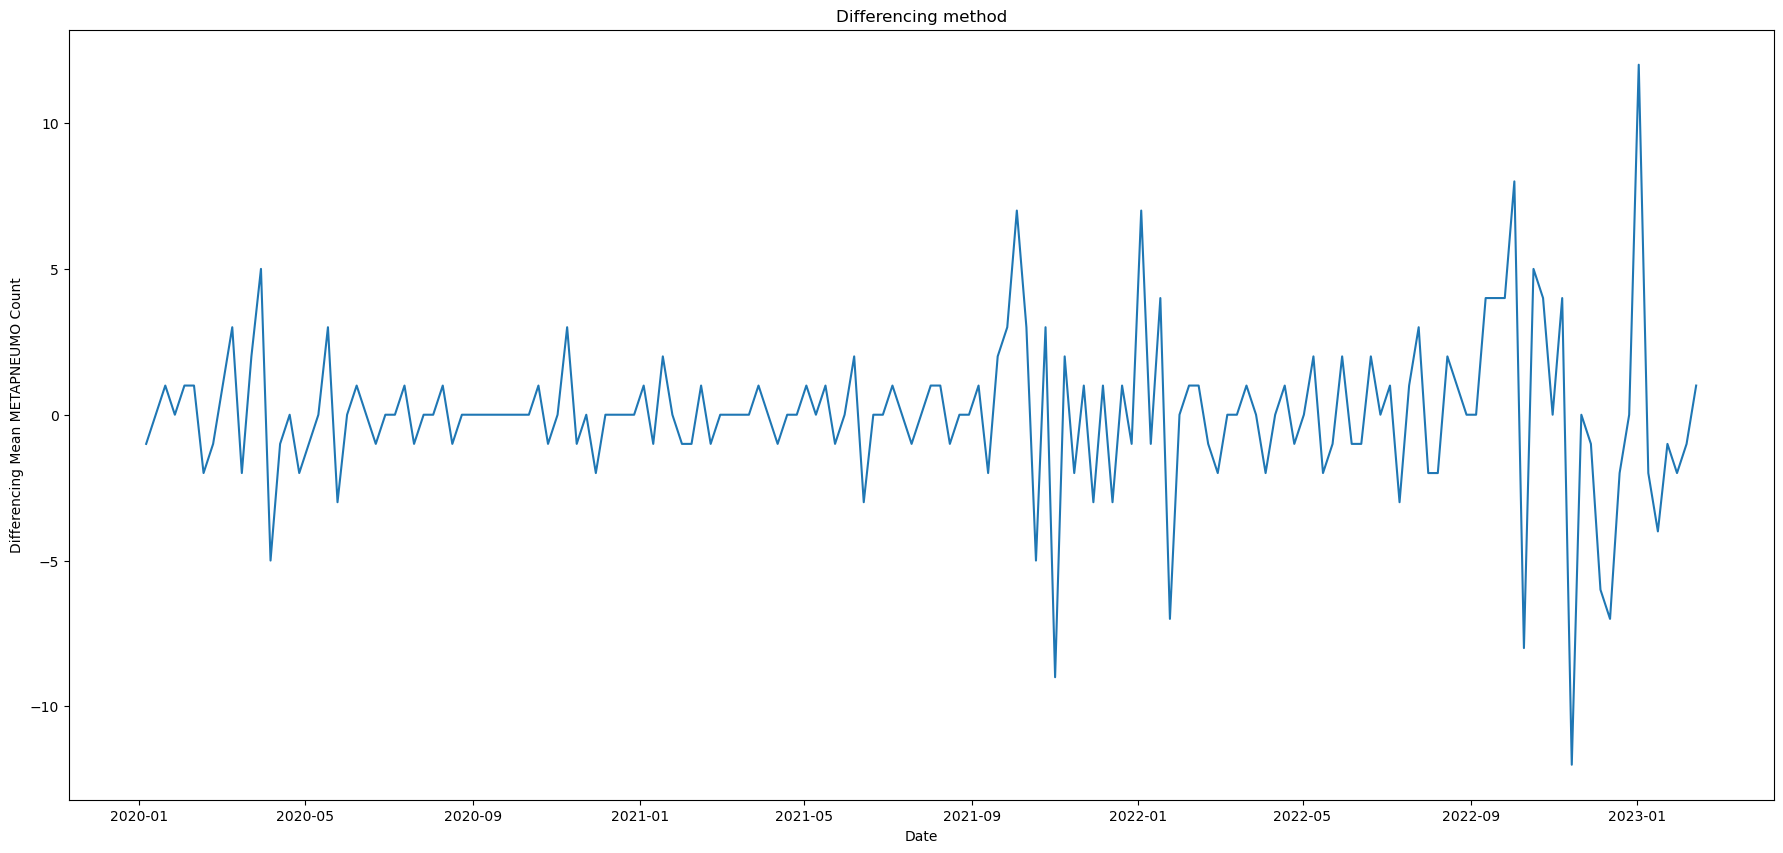

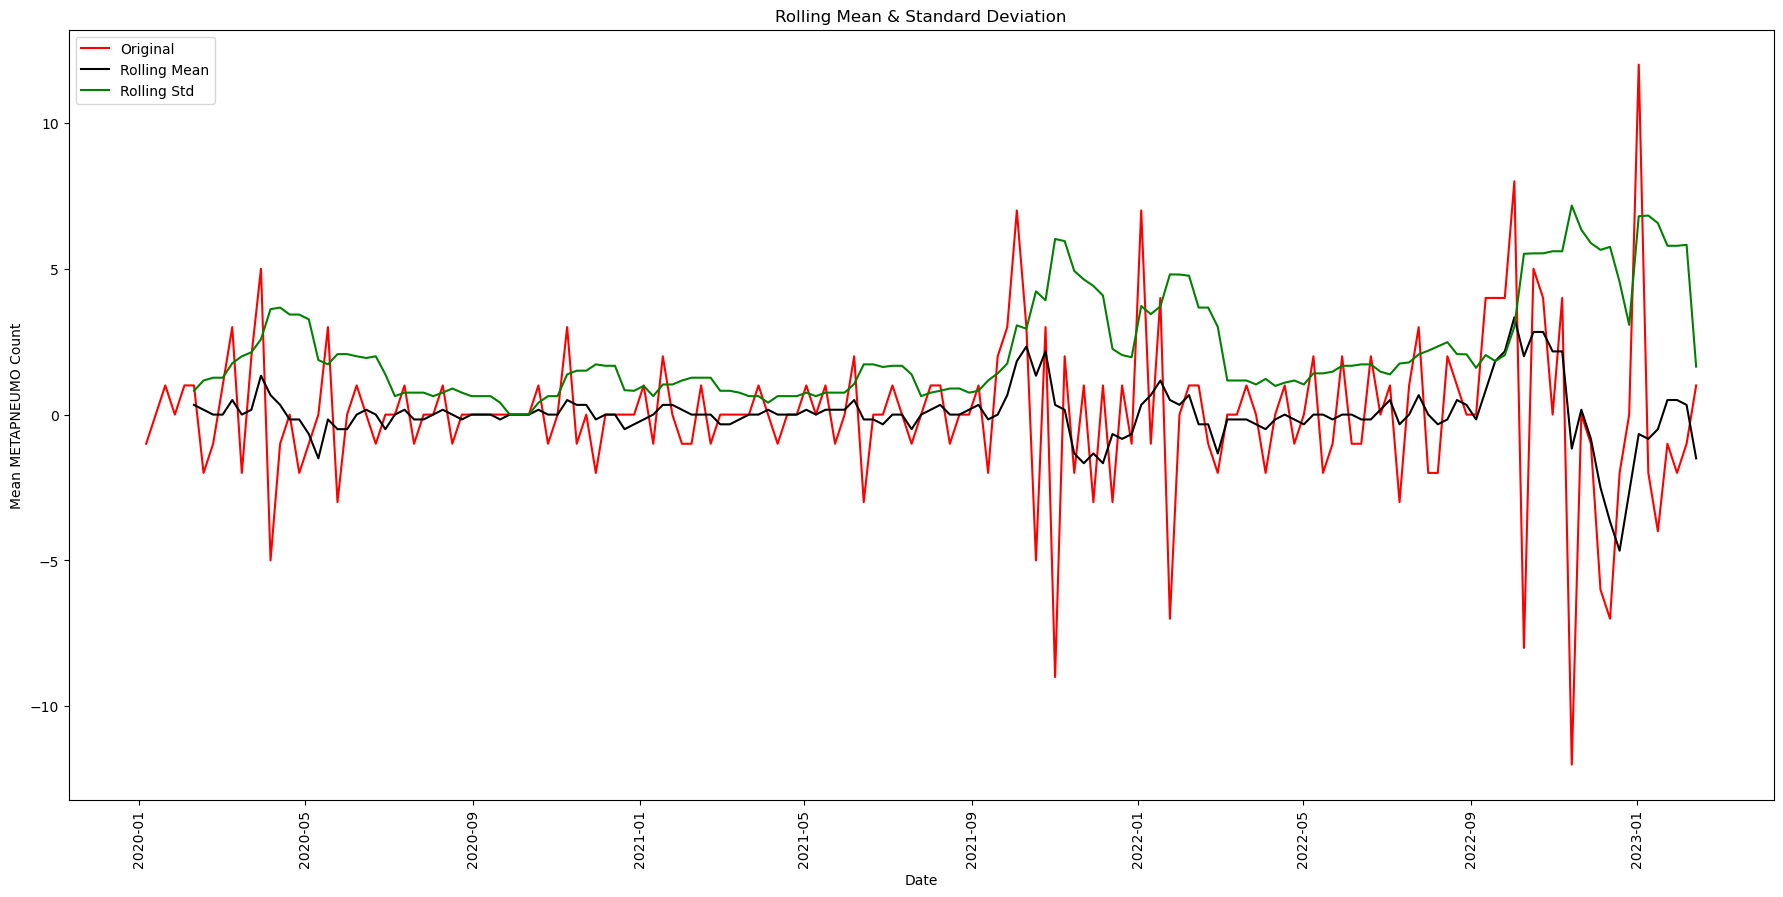

Test statistic:  -5.868641155866463
p-value:  3.2798586196890144e-07
Critical Values: {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5767469641683105}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


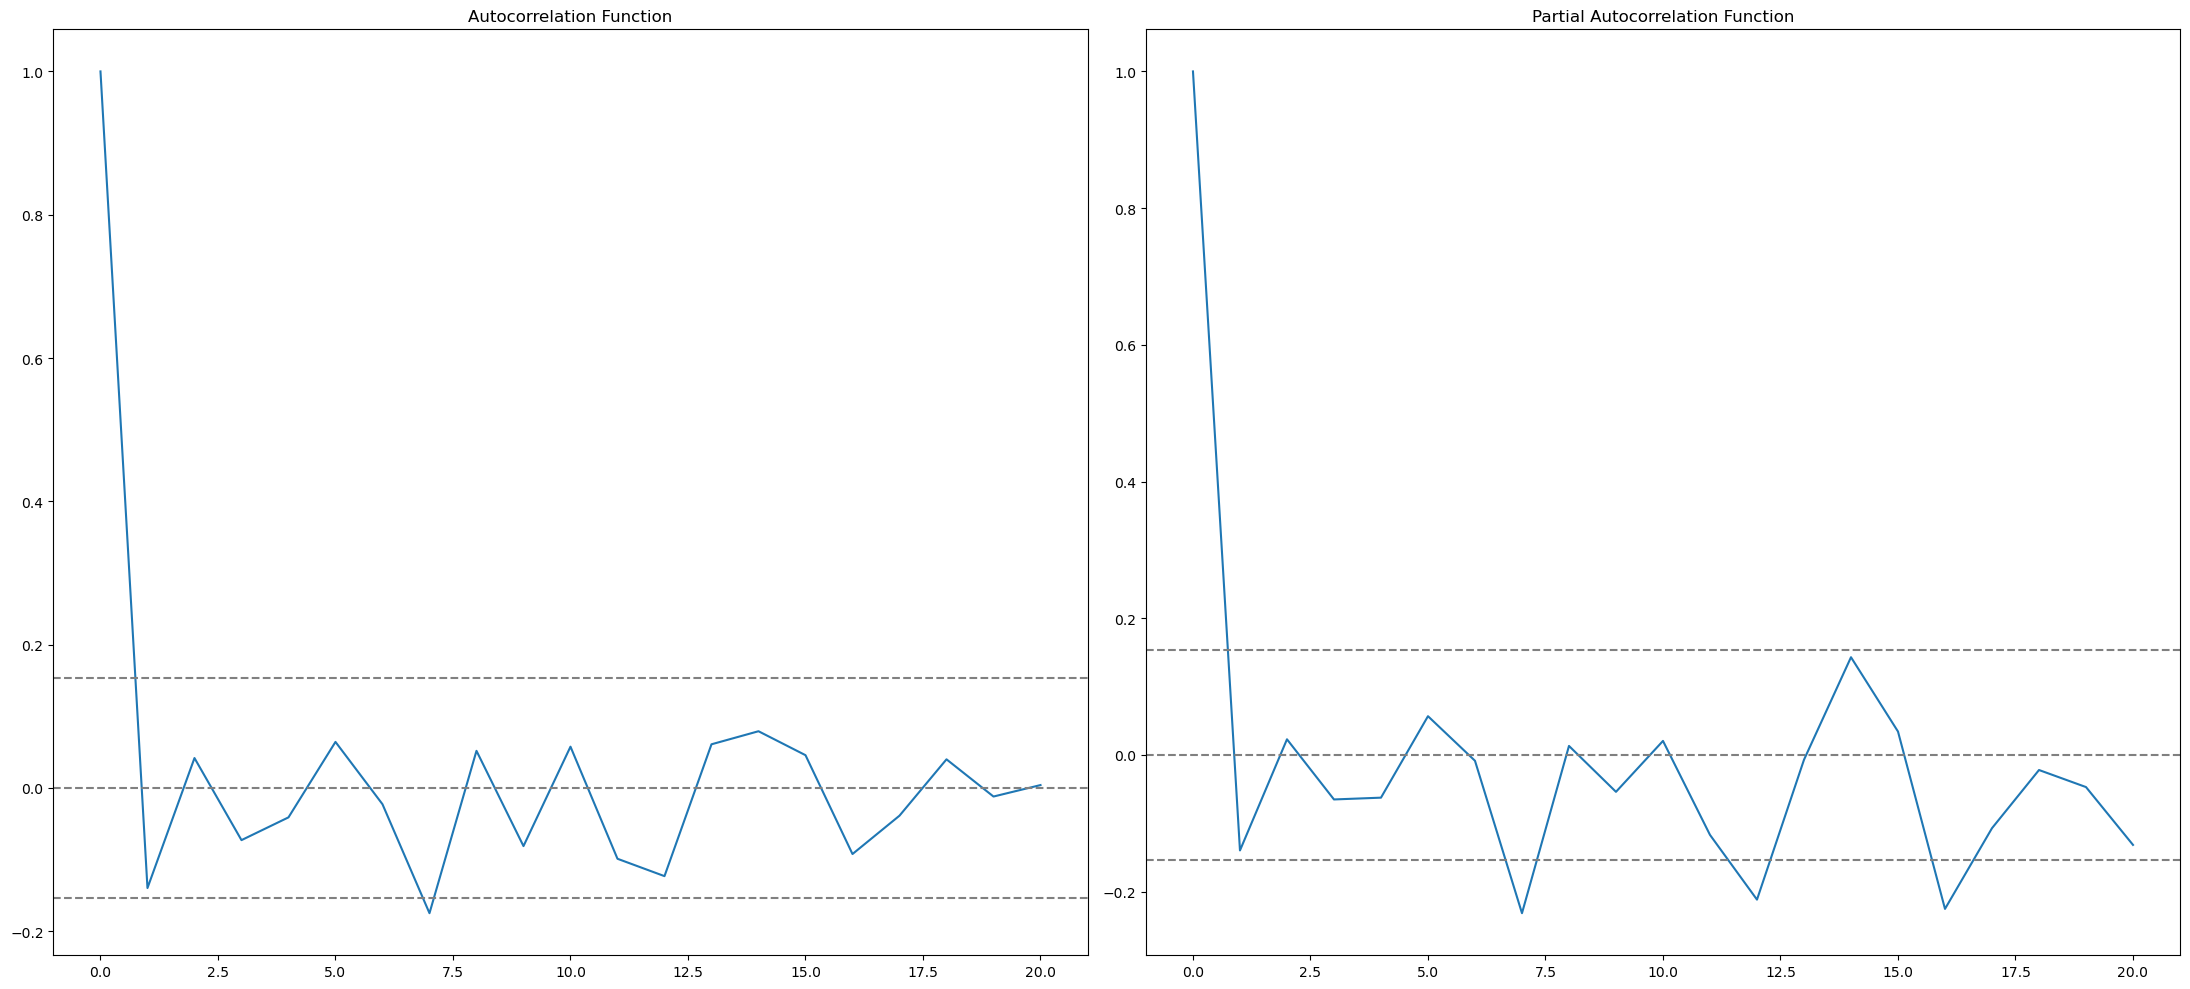

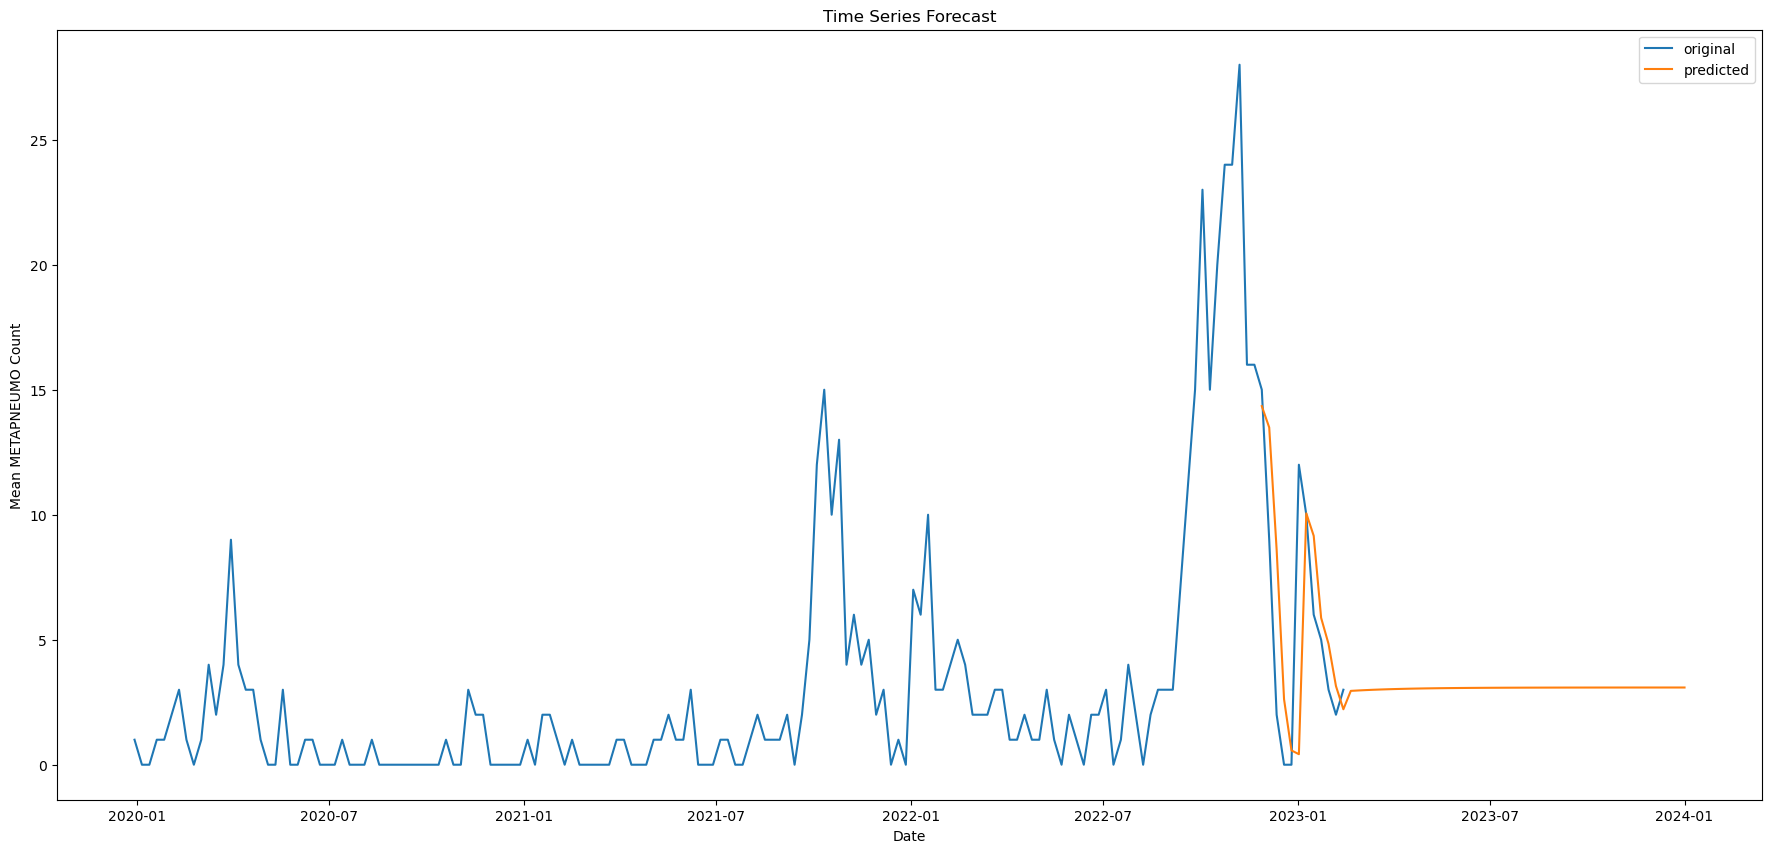

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


error:  6.784225326864946


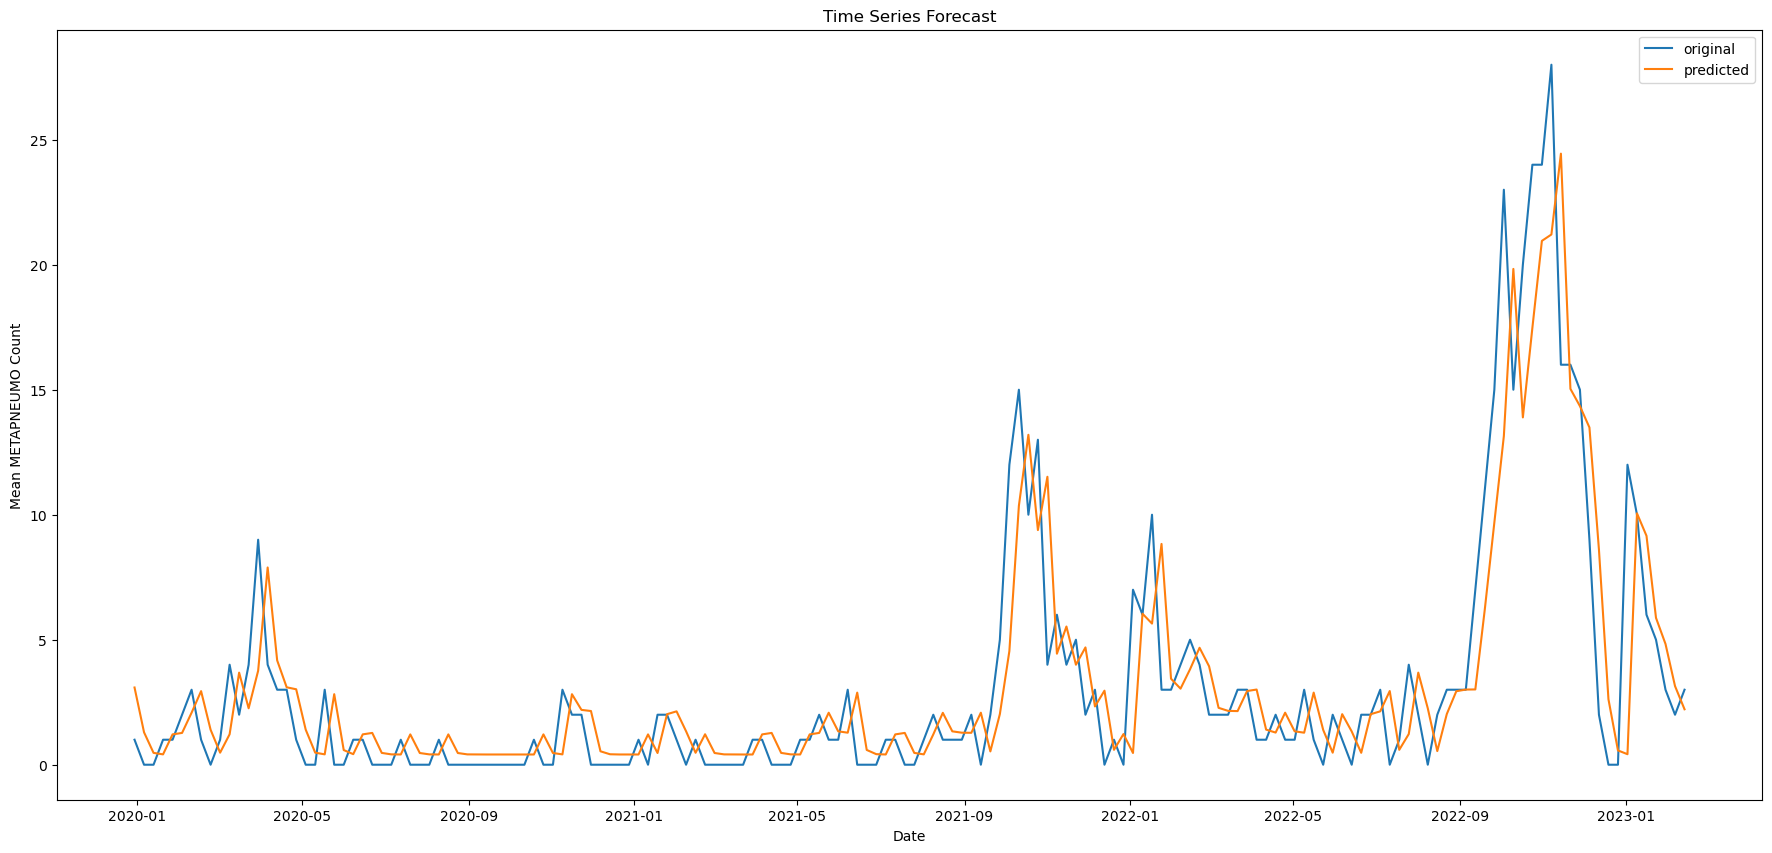

In [16]:
mex = df.loc[df['COUNTRY_CODE'] == 'MEX']
ts = mex.loc[:, ['week', 'METAPNEUMO']]
ts = ts.sort_values(by = ['week'])
ts.index = ts.week
ts = ts.drop("week", axis = 1)
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel("Mean METAPNEUMO Count")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.METAPNEUMO)

window_size = 6
moving_avg = ts.rolling(6).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean METAPNEUMO Count")
plt.xlabel("Date")
plt.ylabel("Mean METAPNEUMO Count")
plt.legend()
plt.show()


ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.METAPNEUMO)


ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean METAPNEUMO Count")
plt.show()

ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.METAPNEUMO)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = datetime(2022, 11, 28)
end_index = datetime(2024, 1, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index, ts.METAPNEUMO, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean METAPNEUMO Count")
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.METAPNEUMO,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean METAPNEUMO Count")
plt.legend()
plt.savefig('graph.png')

plt.show()

#### Mexico Parainfluenza

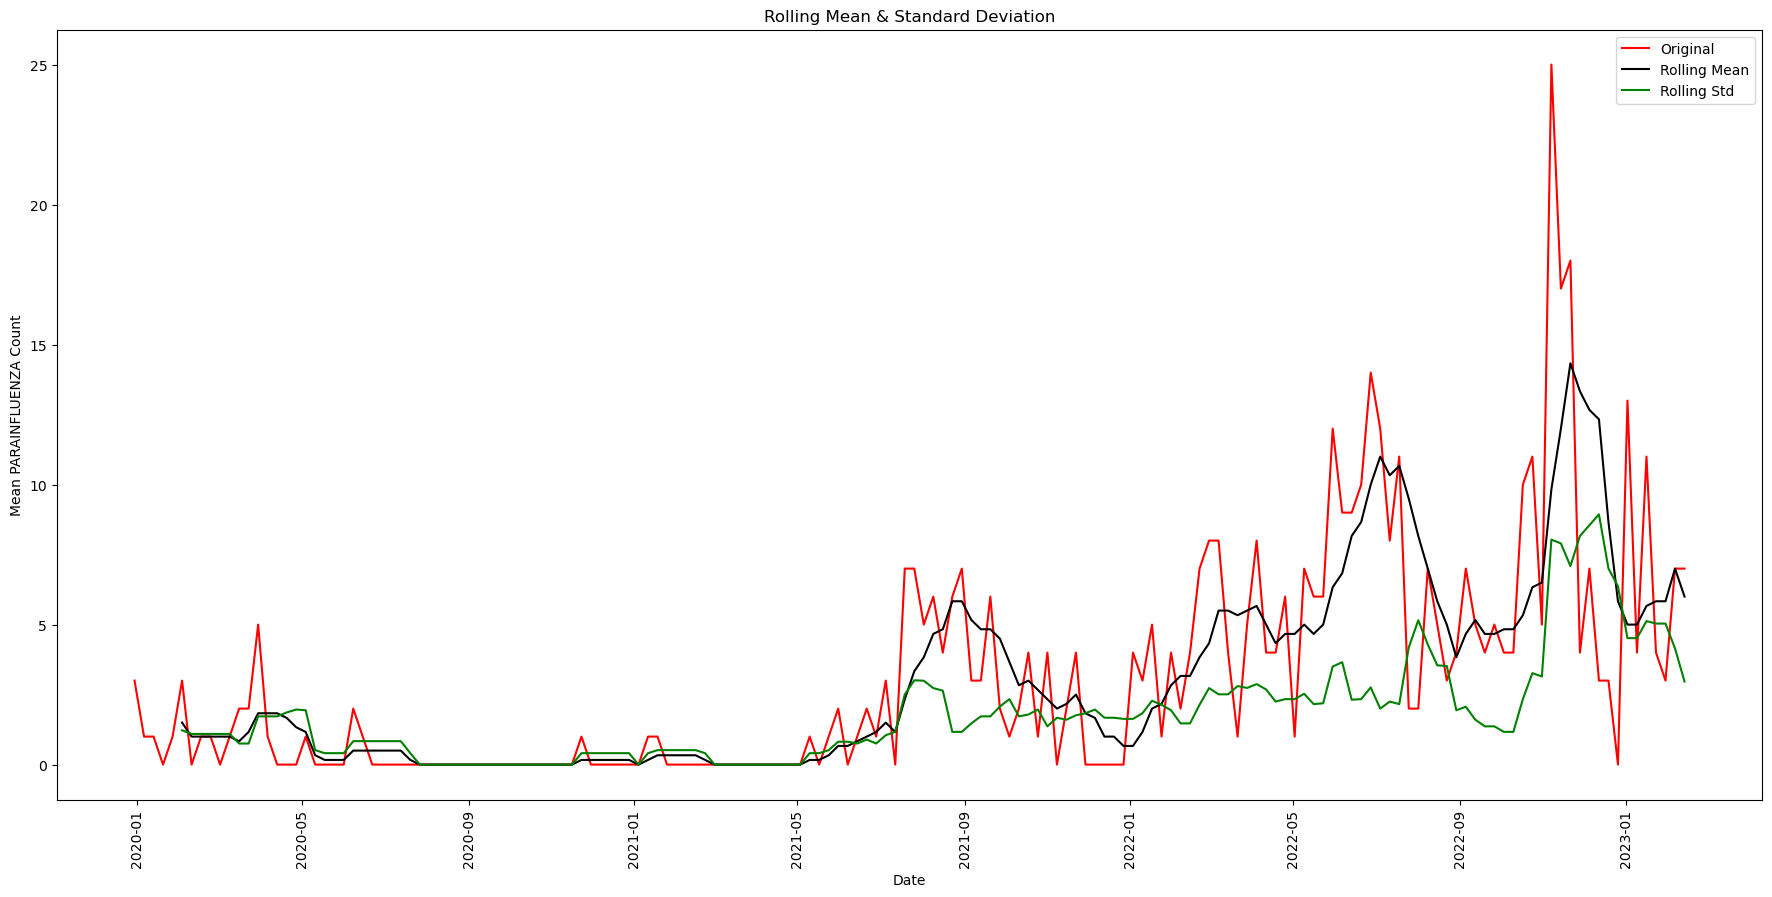

Test statistic:  -3.4217768422975046
p-value:  0.010238526660143311
Critical Values: {'1%': -3.471374345647024, '5%': -2.8795521079291966, '10%': -2.5763733302850174}


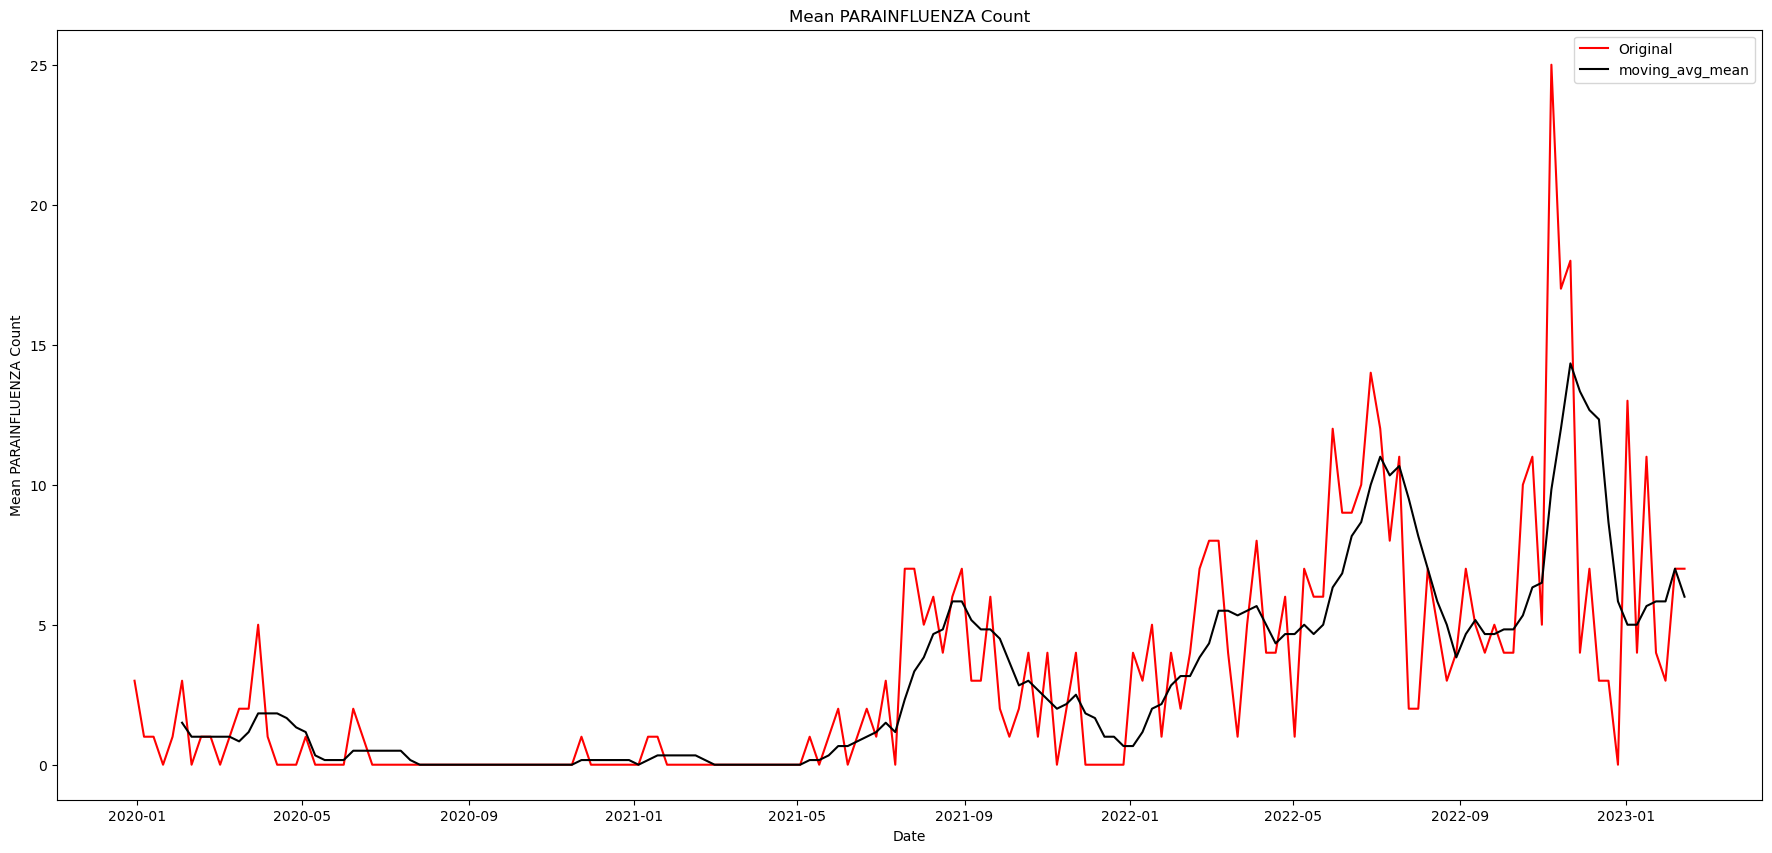

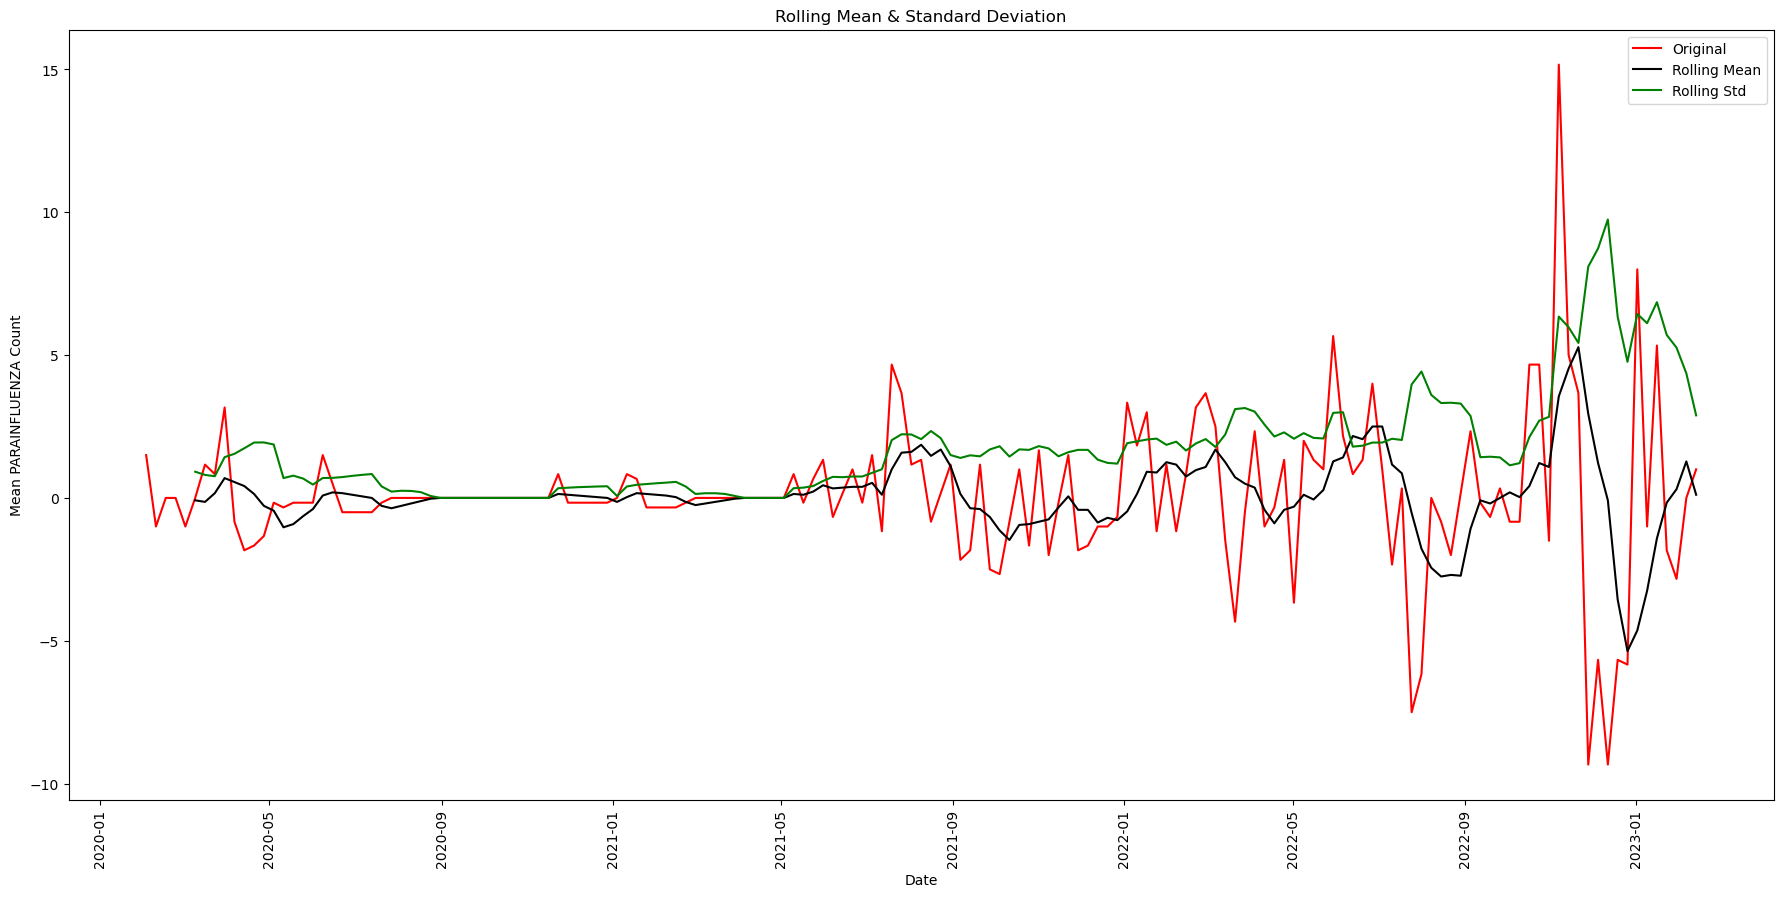

Test statistic:  -6.557624227805446
p-value:  8.537745125526805e-09
Critical Values: {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}


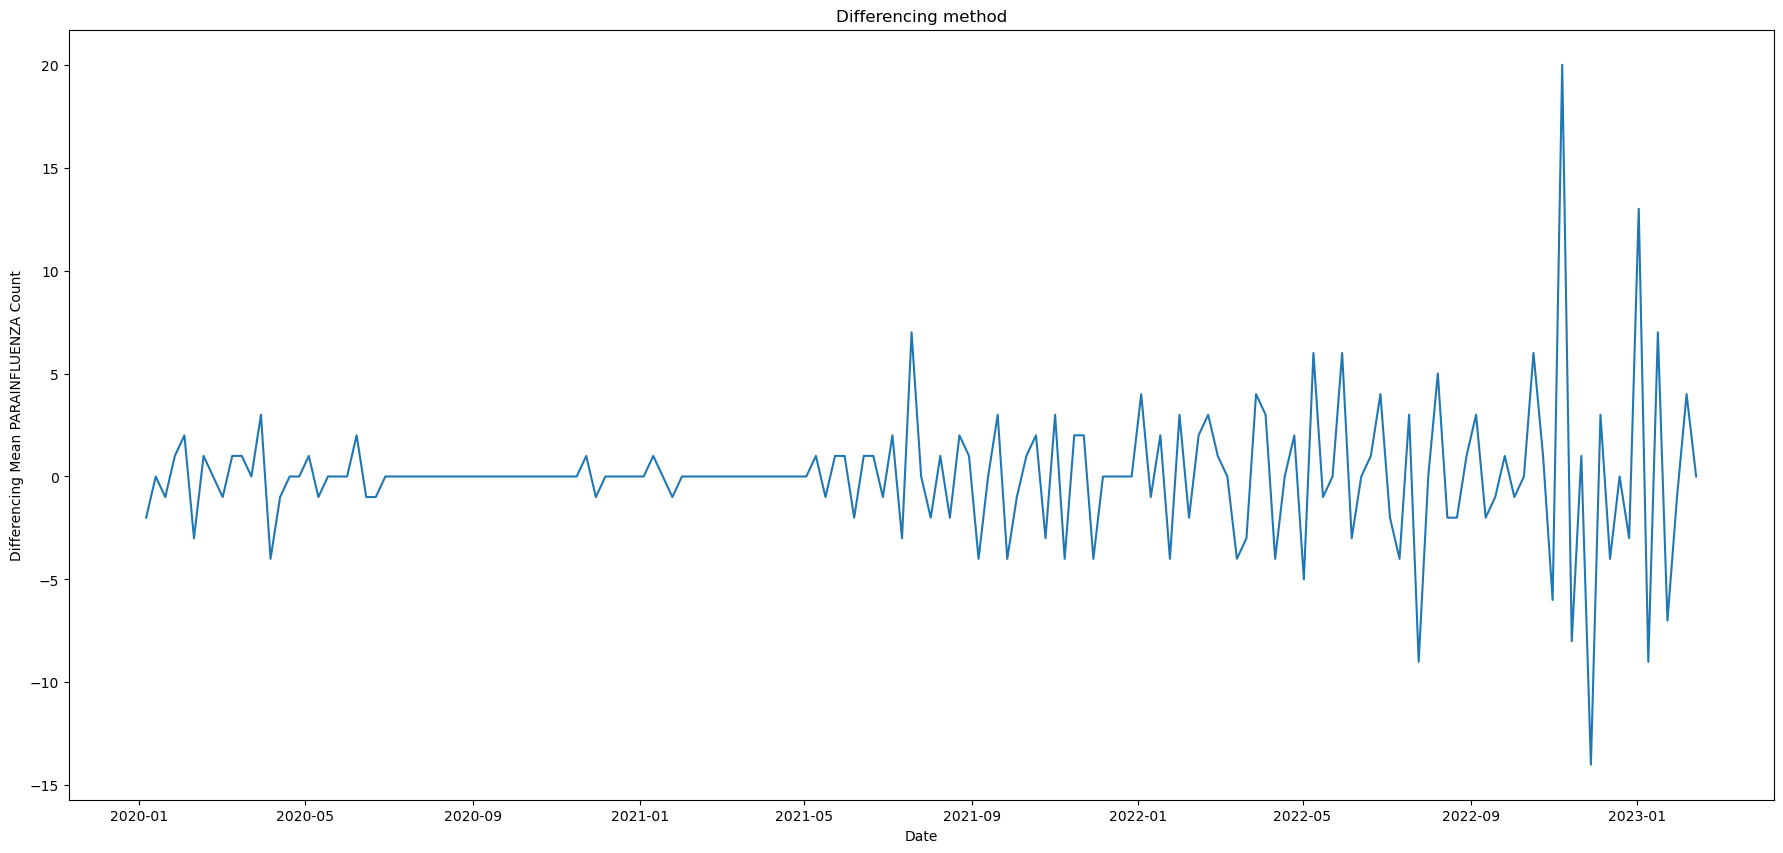

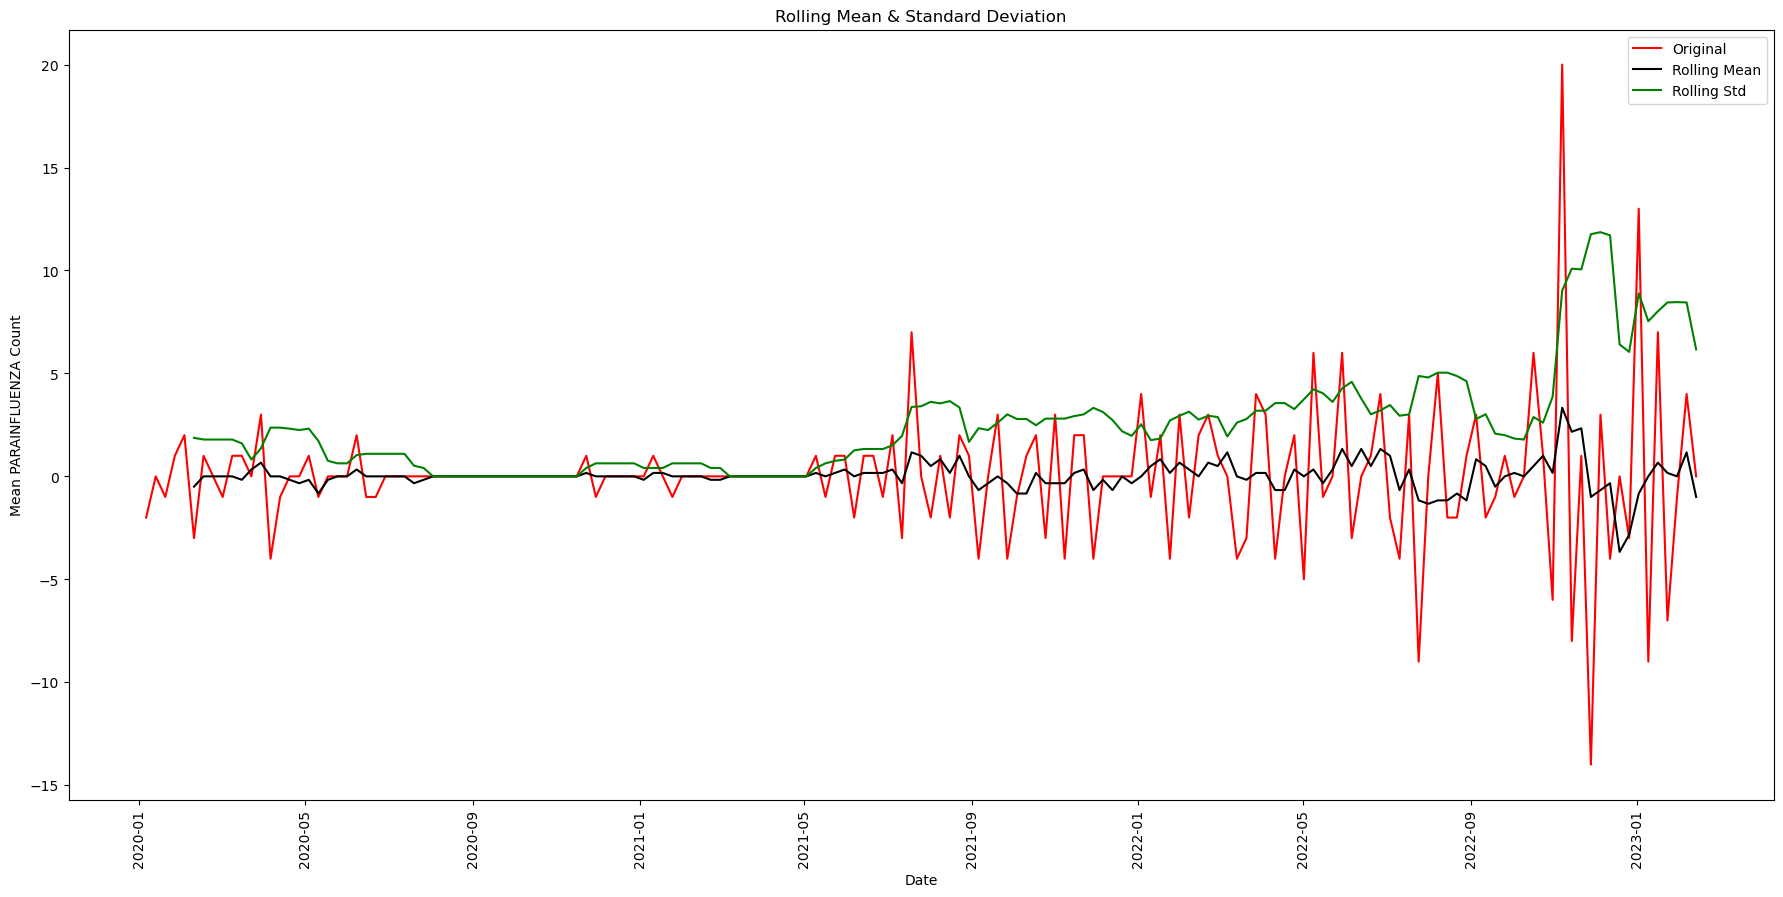

Test statistic:  -5.0407951375863
p-value:  1.841683072979329e-05
Critical Values: {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


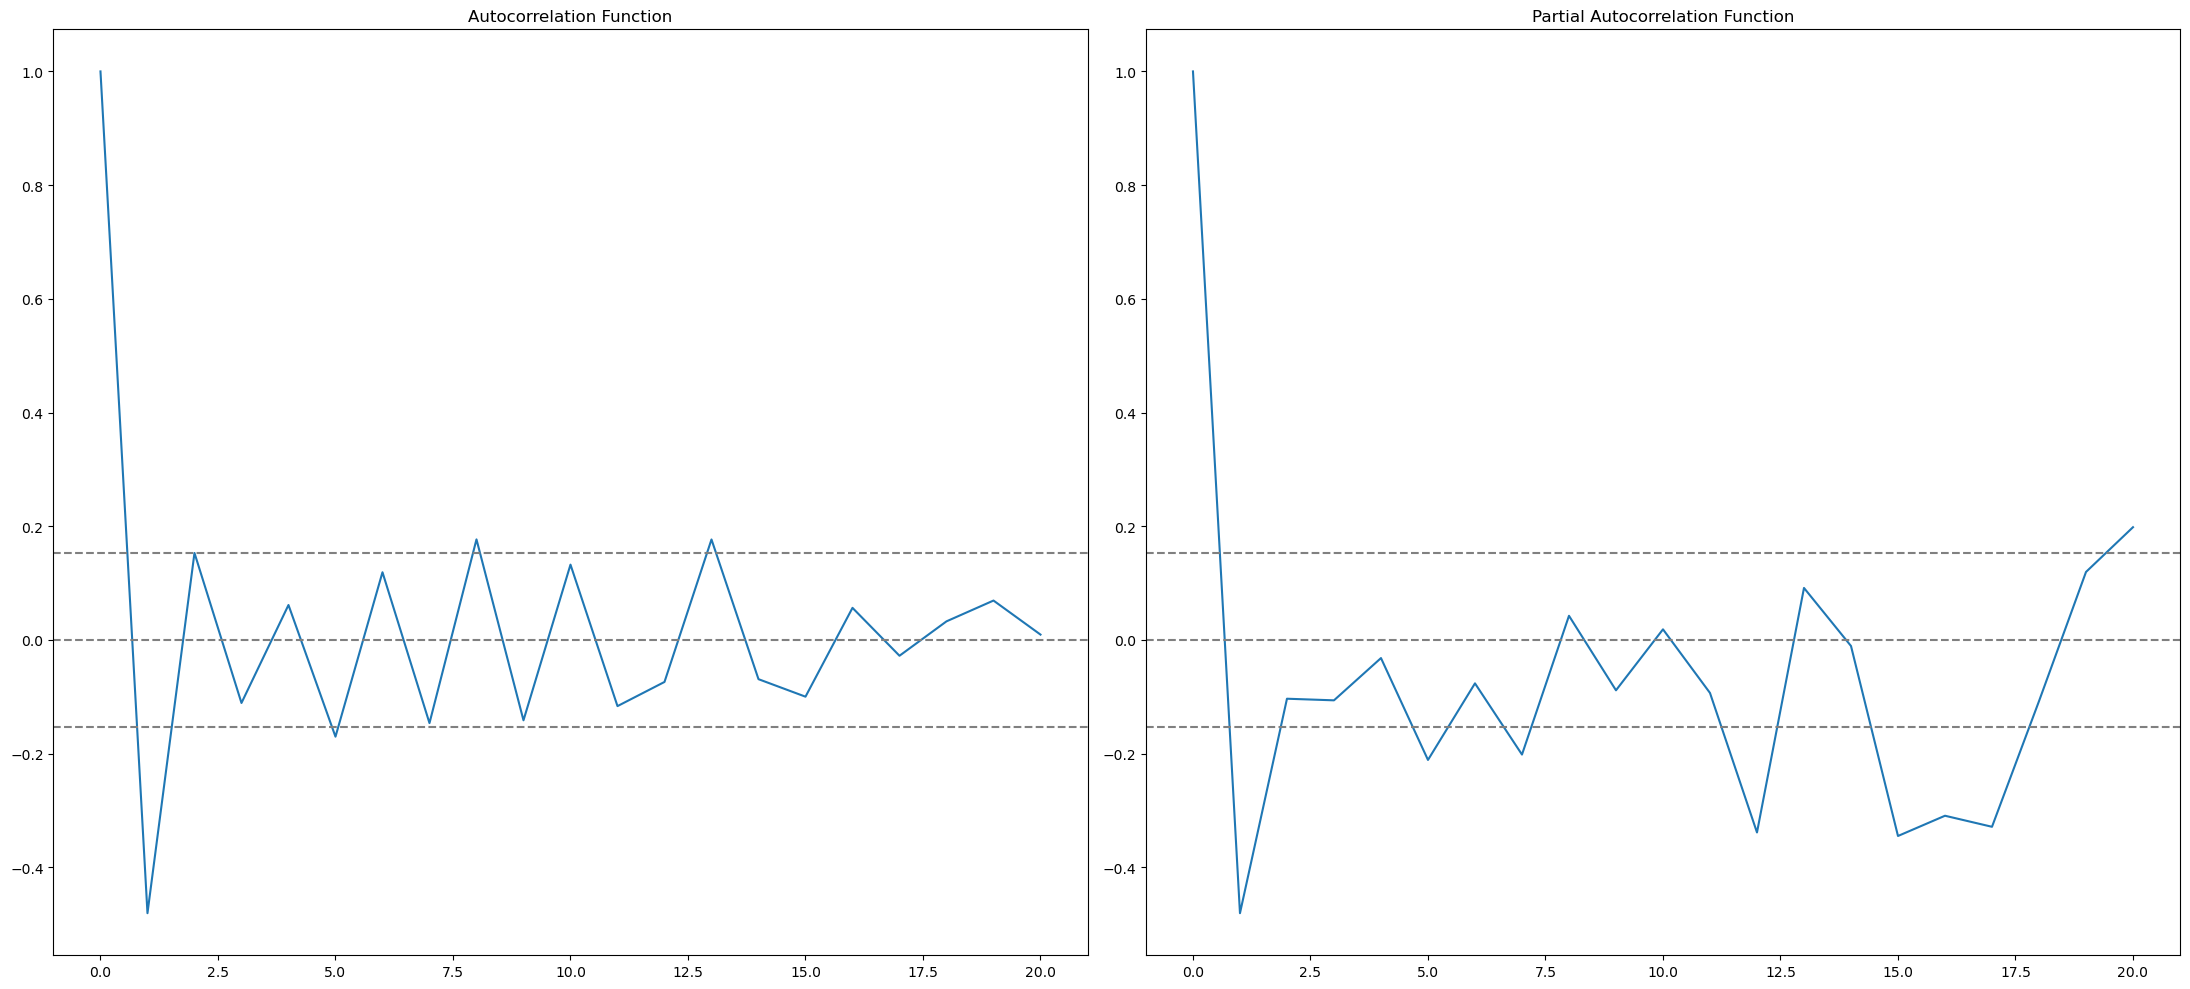

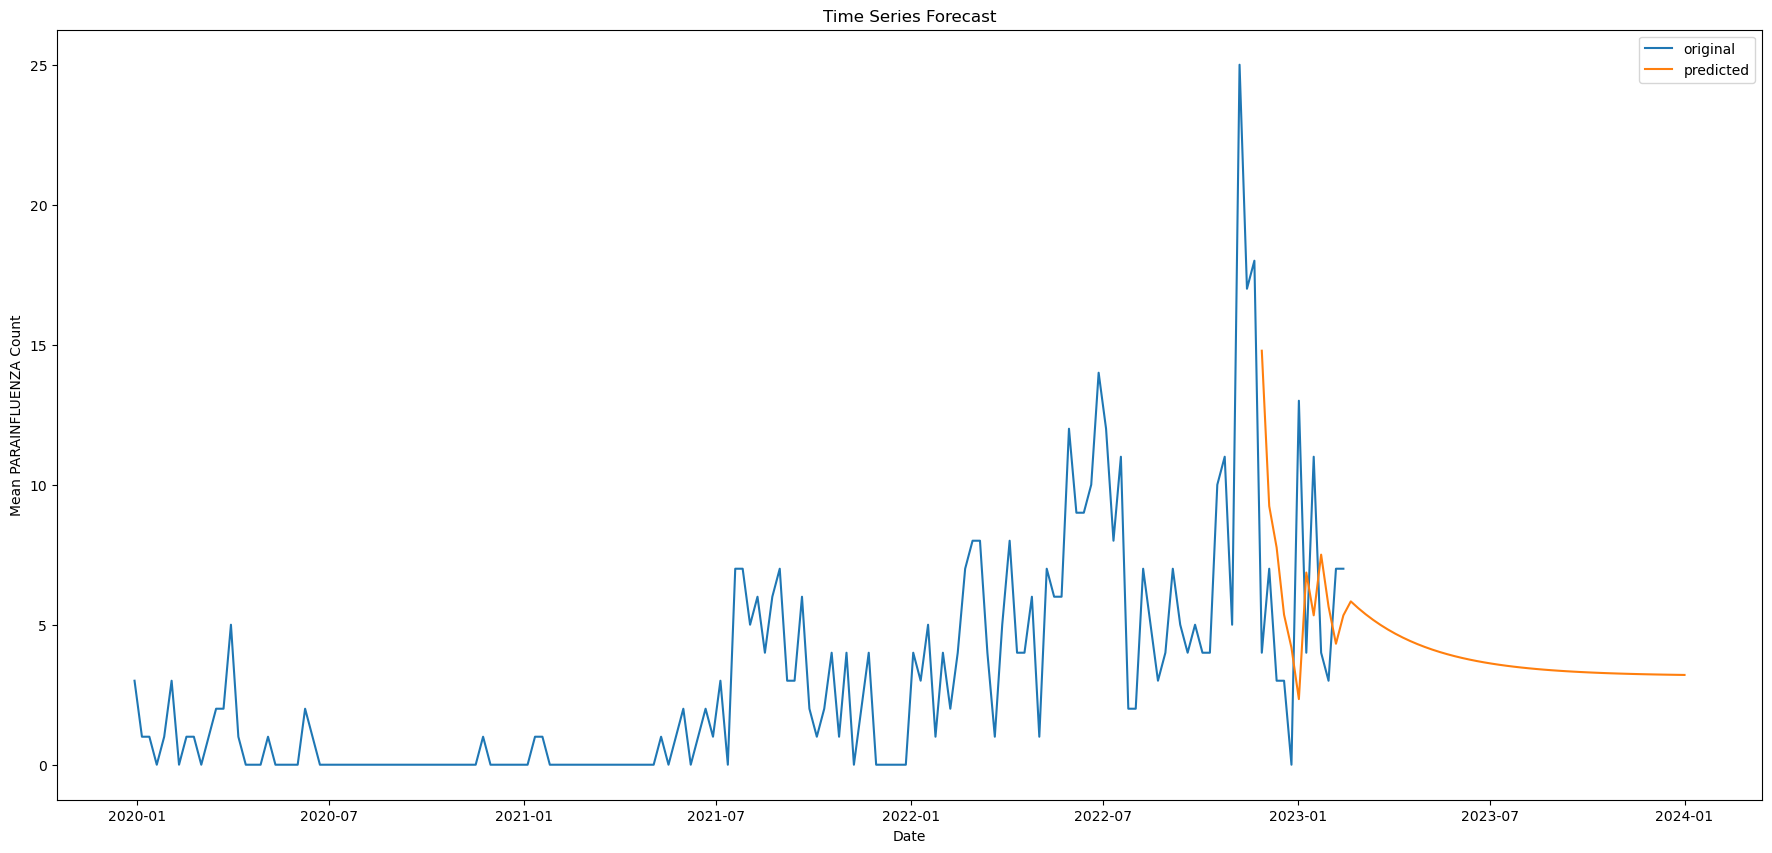

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


error:  7.983109557074706


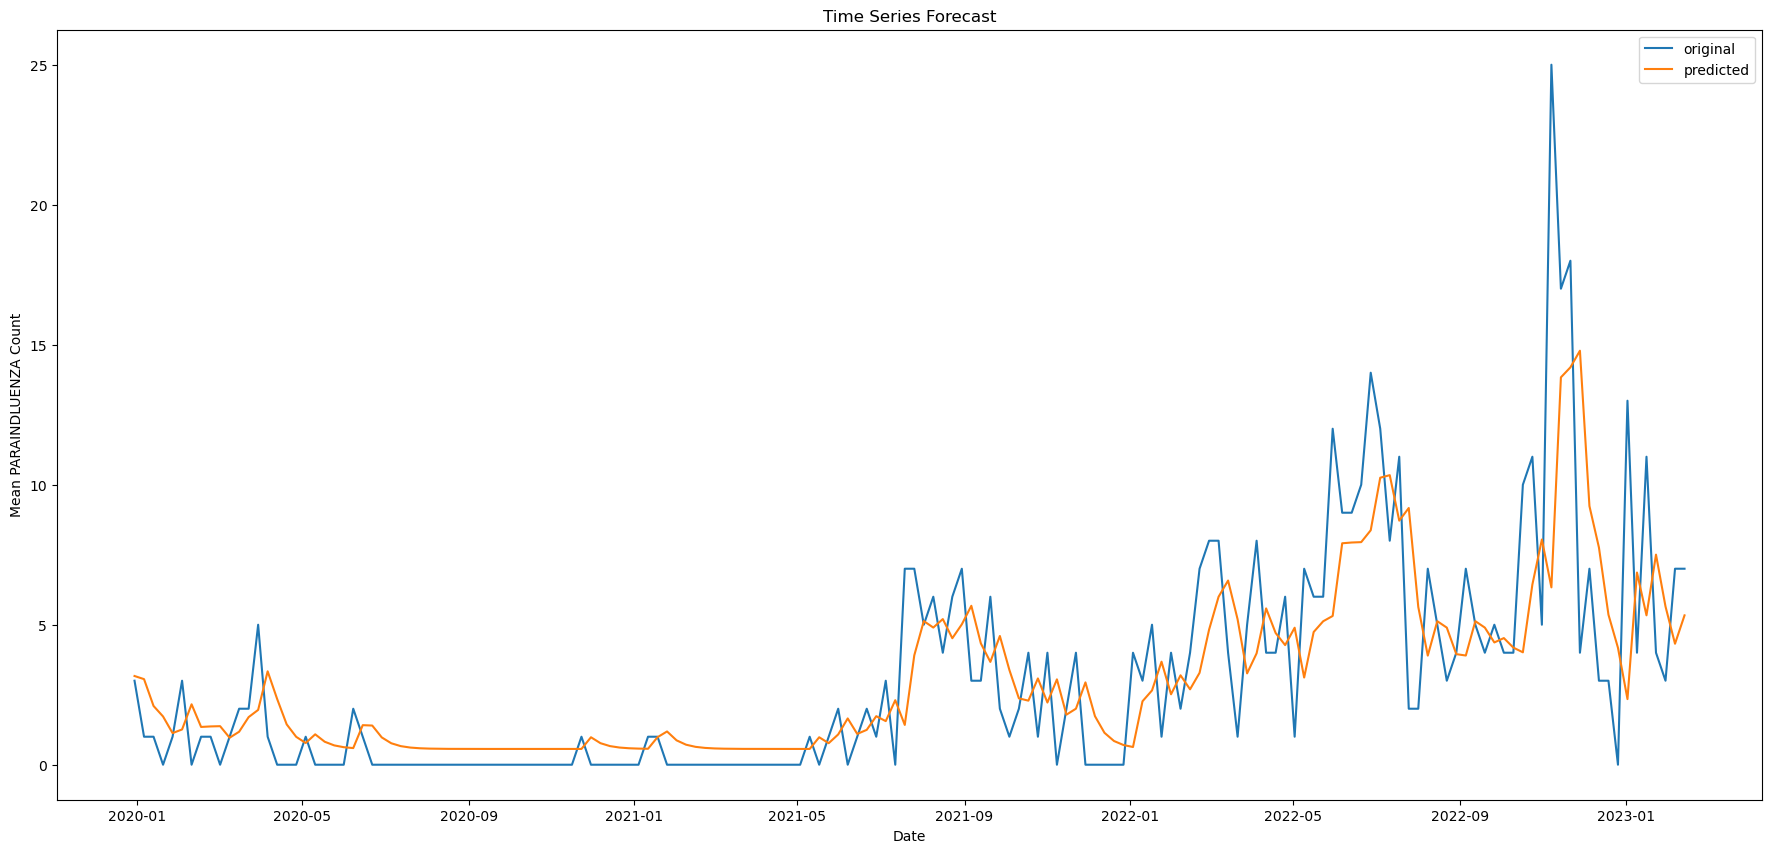

In [17]:
mex = df.loc[df['COUNTRY_CODE'] == 'MEX']
ts = mex.loc[:, ['week', 'PARAINFLUENZA']]
ts = ts.sort_values(by = ['week'])
ts.index = ts.week
ts = ts.drop("week", axis = 1)
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel("Mean PARAINFLUENZA Count")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.PARAINFLUENZA)

window_size = 6
moving_avg = ts.rolling(6).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean PARAINFLUENZA Count")
plt.xlabel("Date")
plt.ylabel("Mean PARAINFLUENZA Count")
plt.legend()
plt.show()


ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.PARAINFLUENZA)


ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean PARAINFLUENZA Count")
plt.show()

ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.PARAINFLUENZA)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = datetime(2022, 11, 28)
end_index = datetime(2024, 1, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index, ts.PARAINFLUENZA, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean PARAINFLUENZA Count")
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.PARAINFLUENZA,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean PARAINDLUENZA Count")
plt.legend()
plt.savefig('graph.png')

plt.show()

#### Mexico Rhinovirus

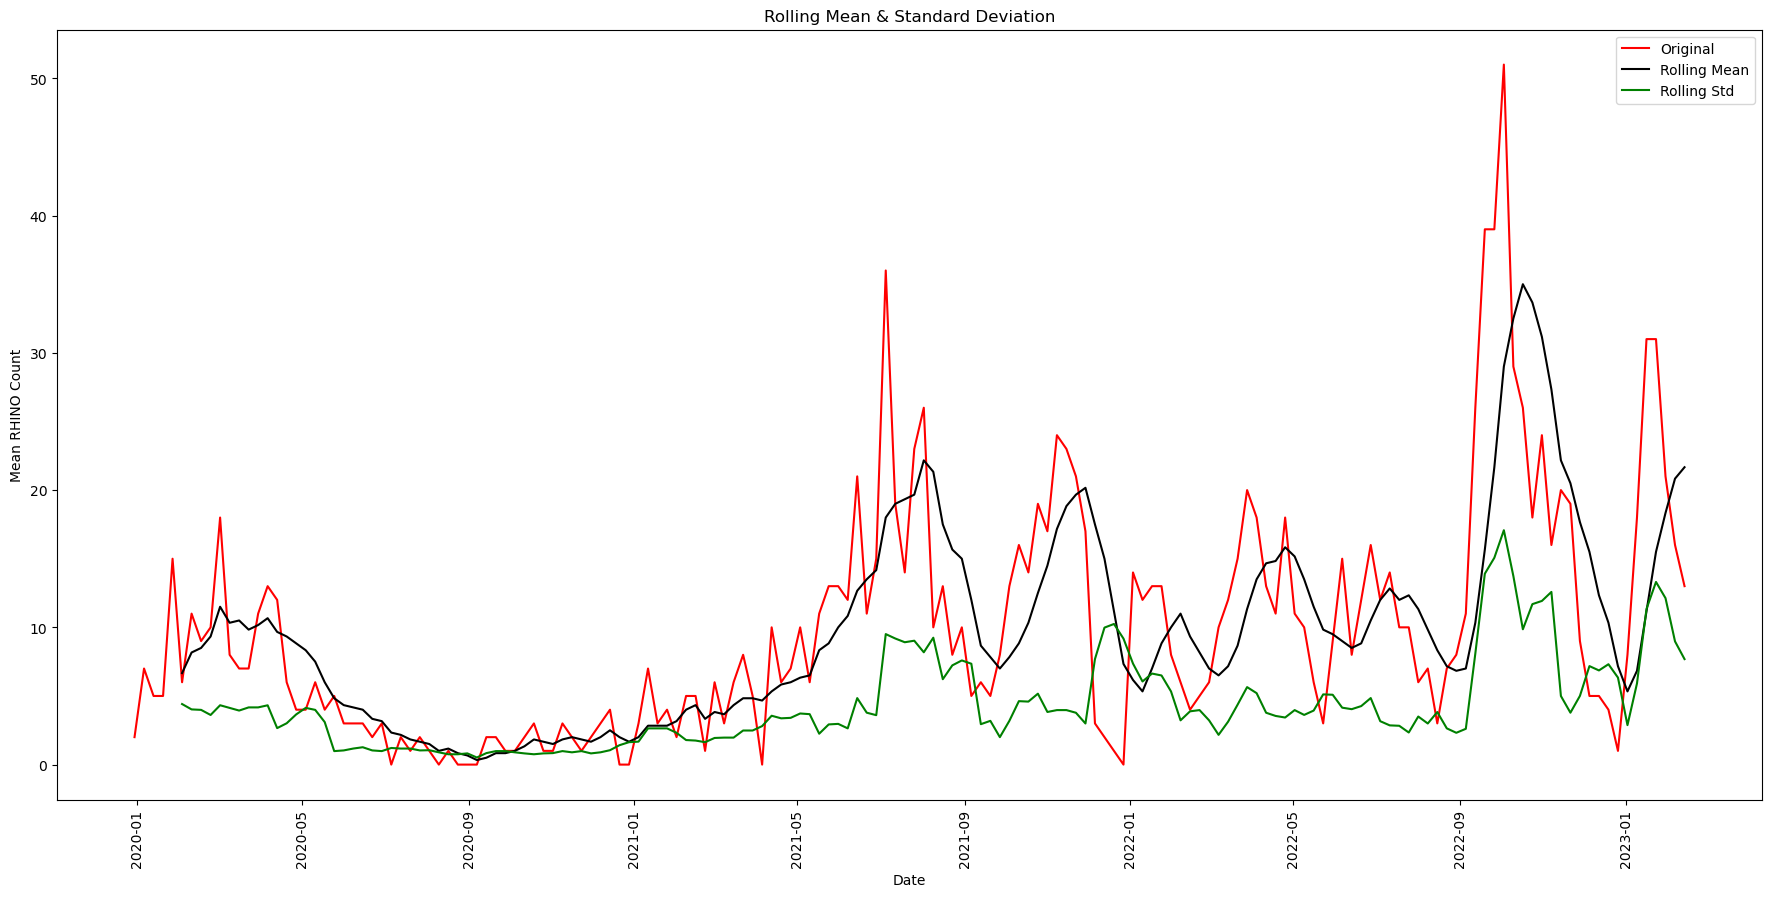

Test statistic:  -4.330077175135129
p-value:  0.00039385159617135465
Critical Values: {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}


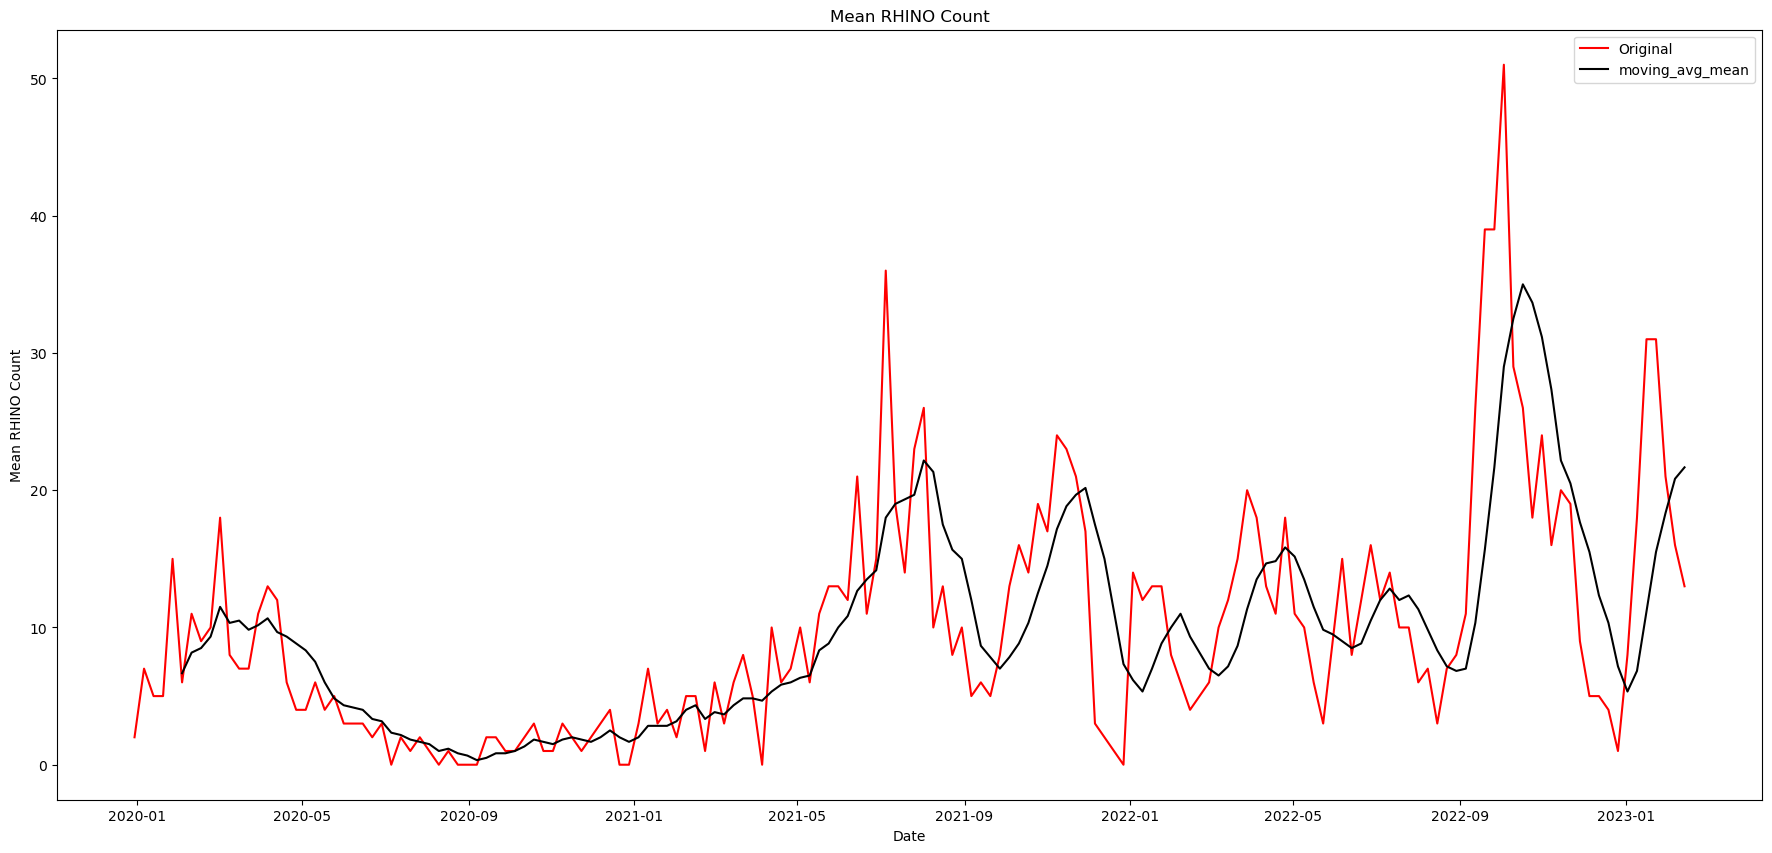

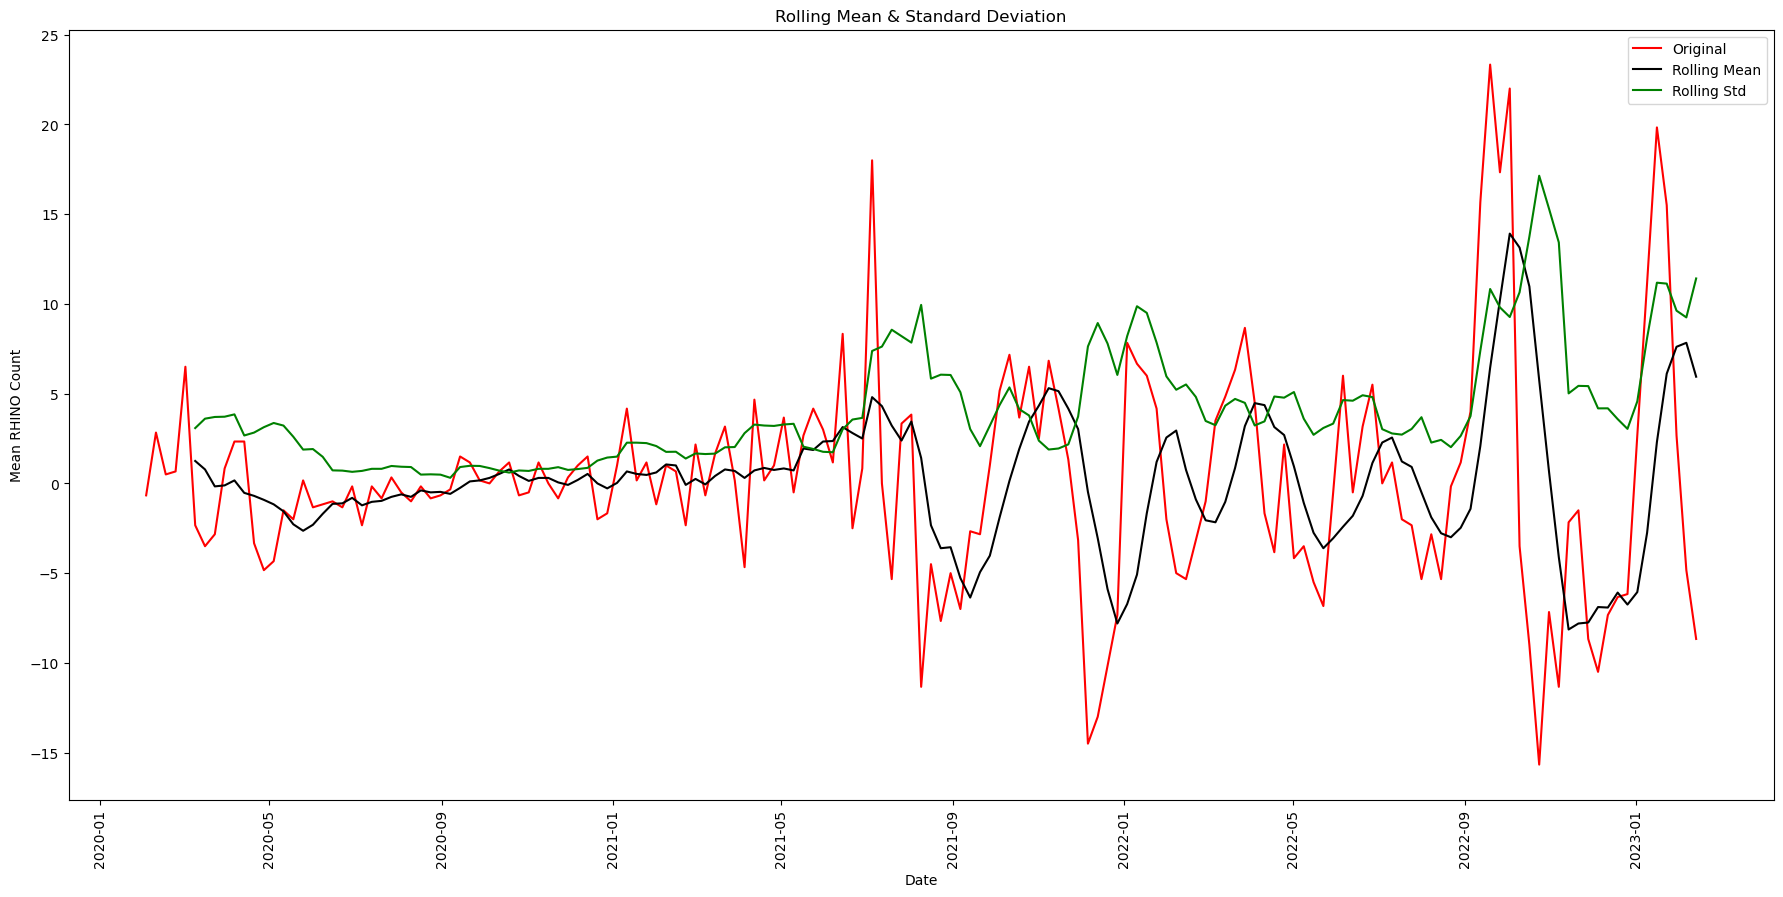

Test statistic:  -6.013517625009715
p-value:  1.553131373044922e-07
Critical Values: {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}


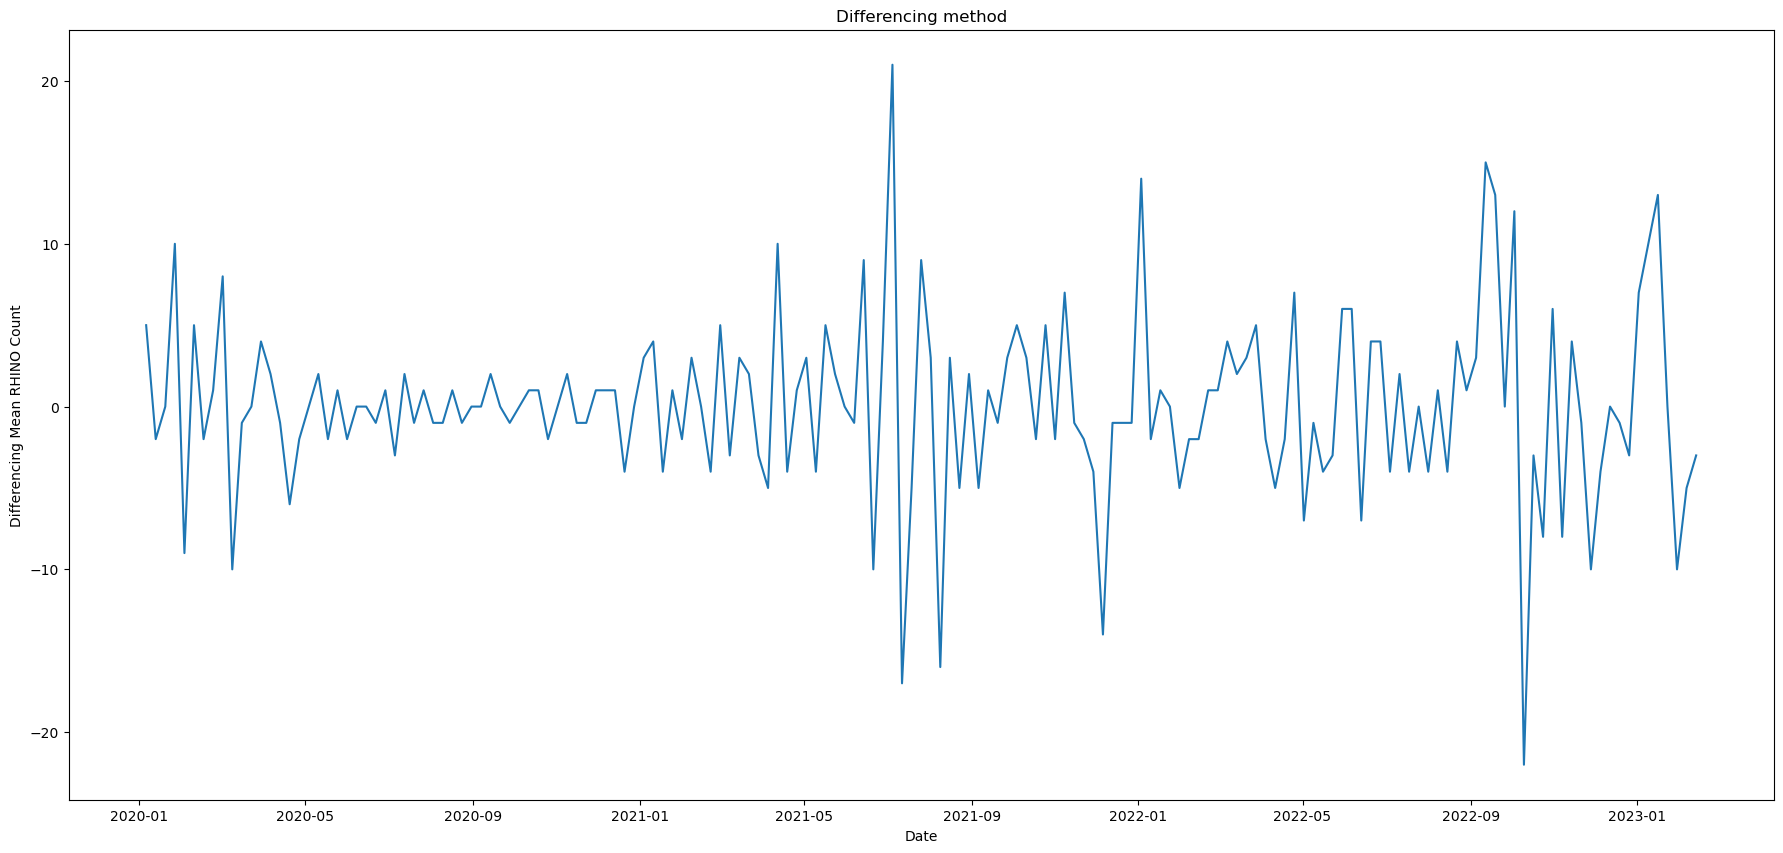

Test statistic:  -7.582315367082605
p-value:  2.6618433139818324e-11
Critical Values: {'1%': -3.4724305215713156, '5%': -2.8800127935315465, '10%': -2.576619230892485}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


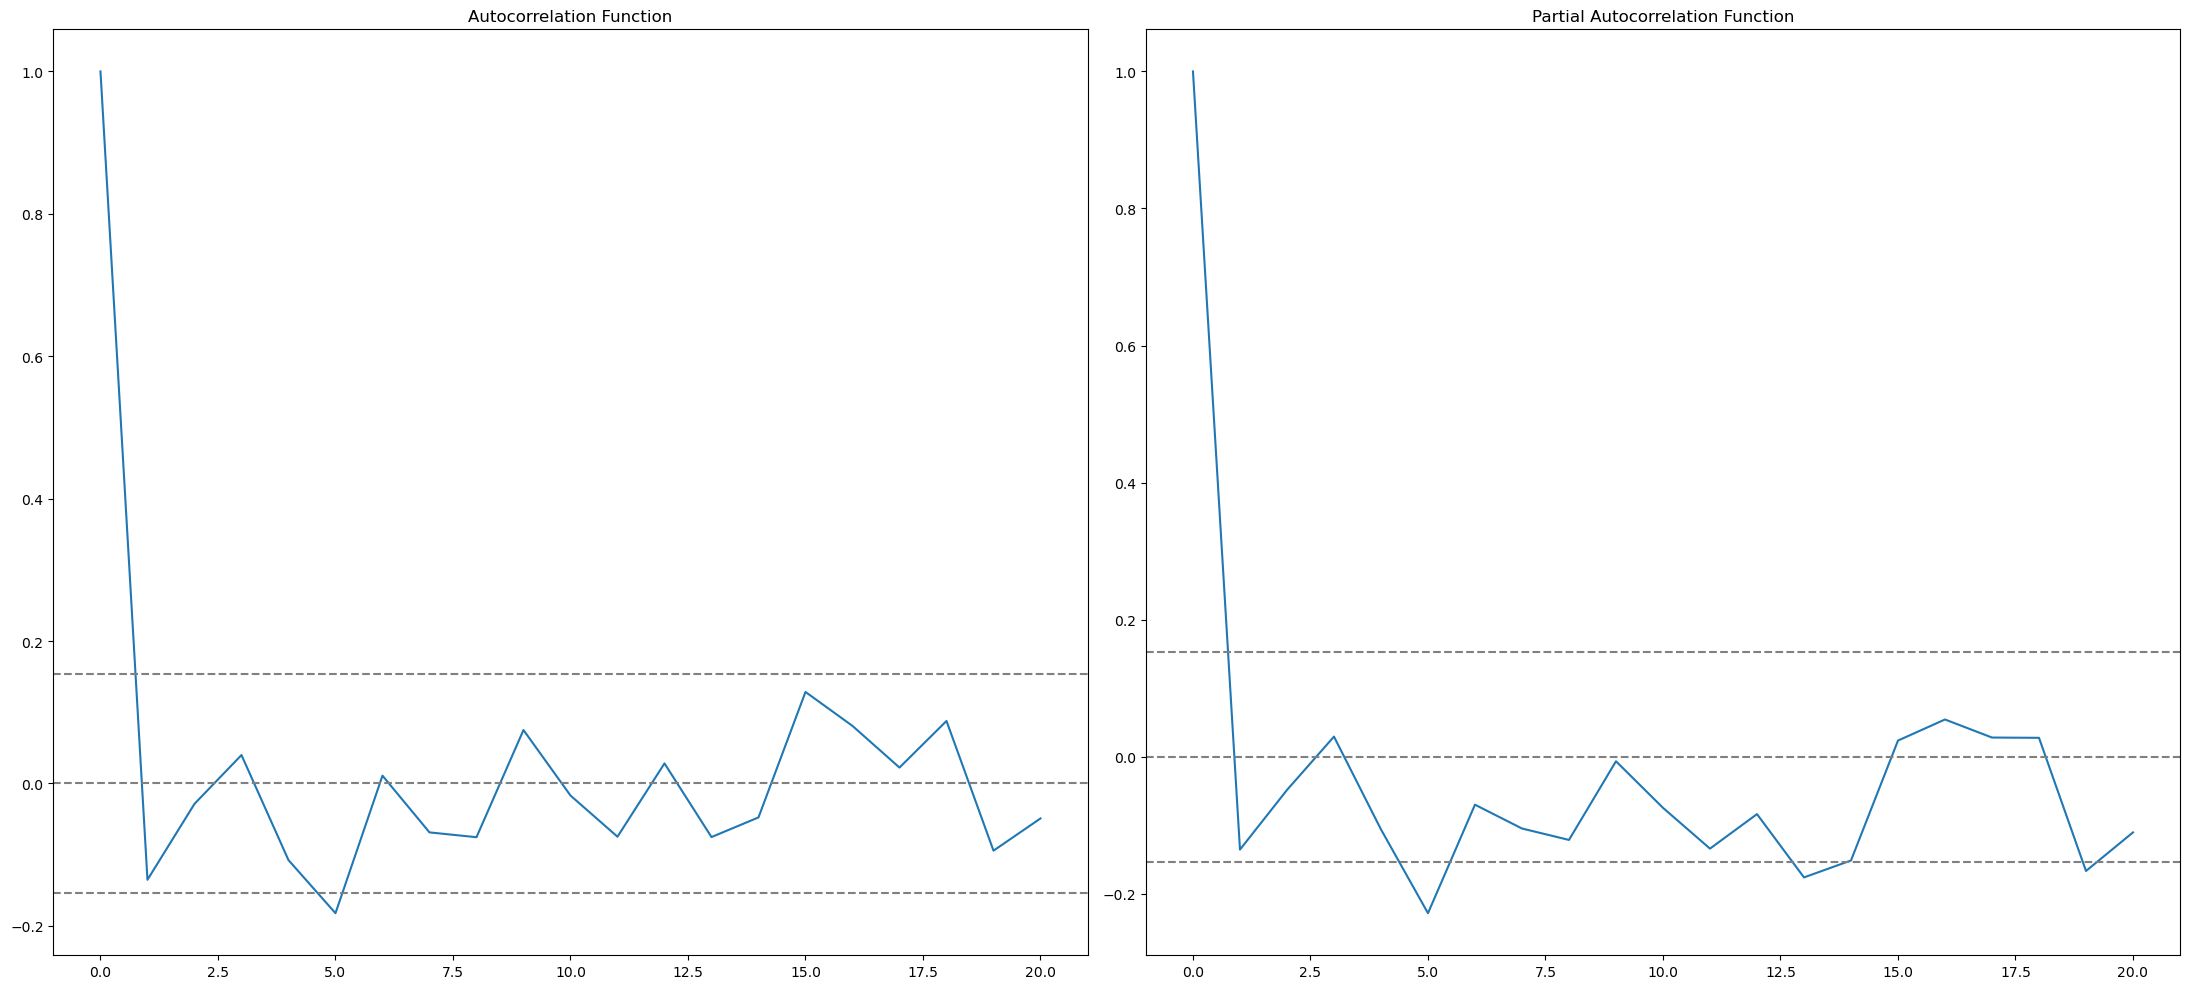

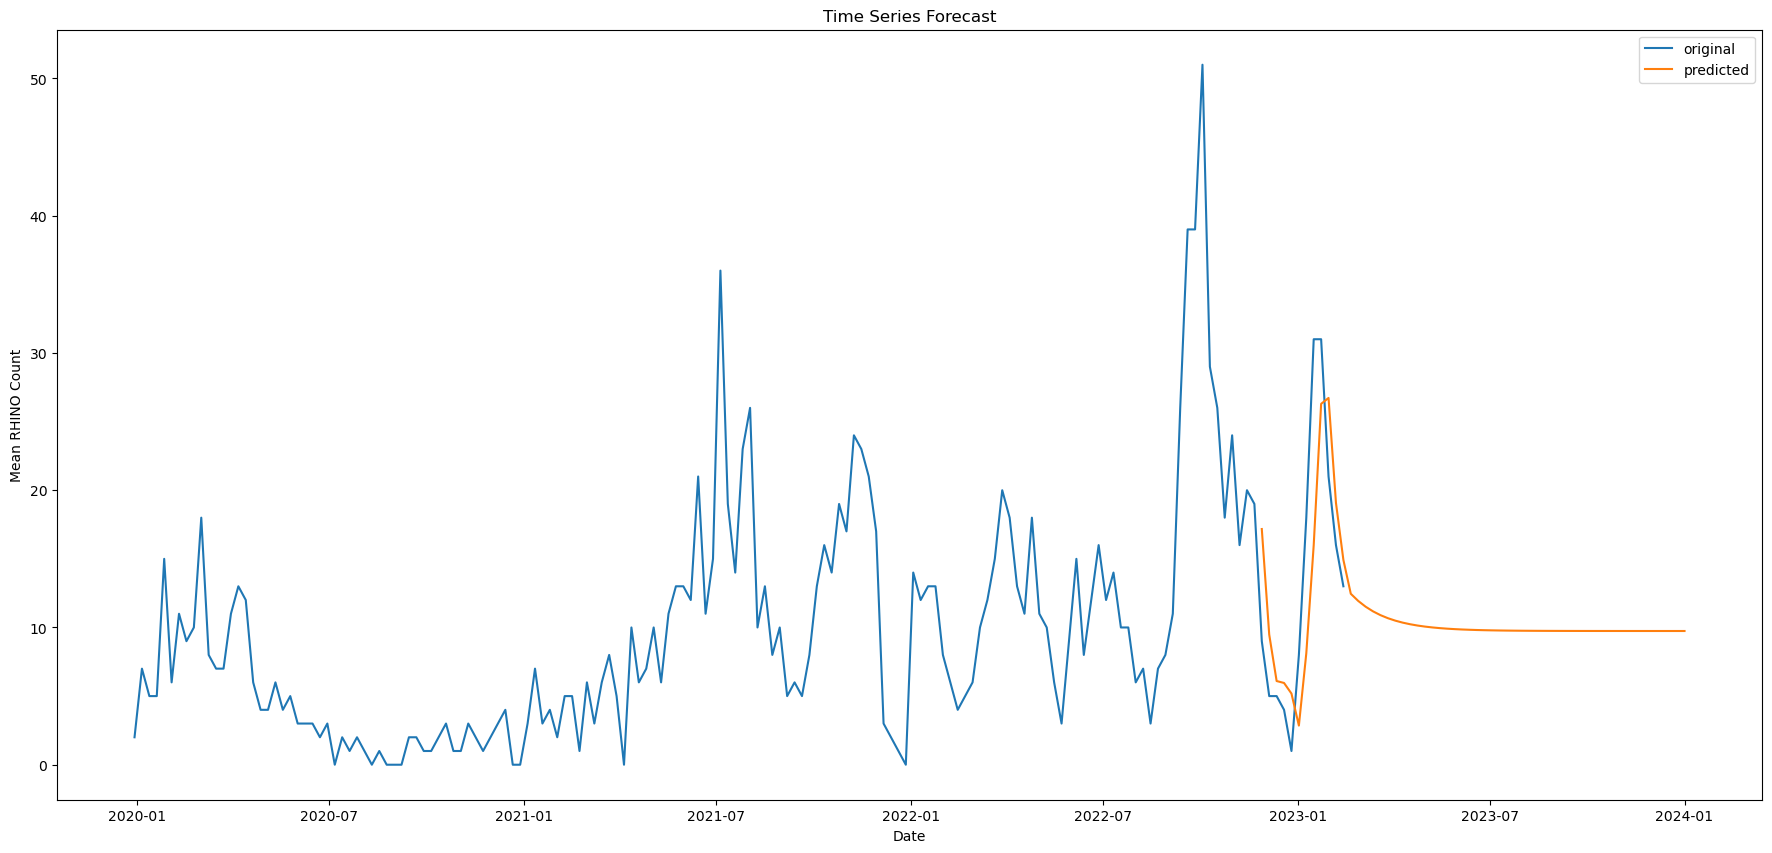

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


error:  27.931250315059017


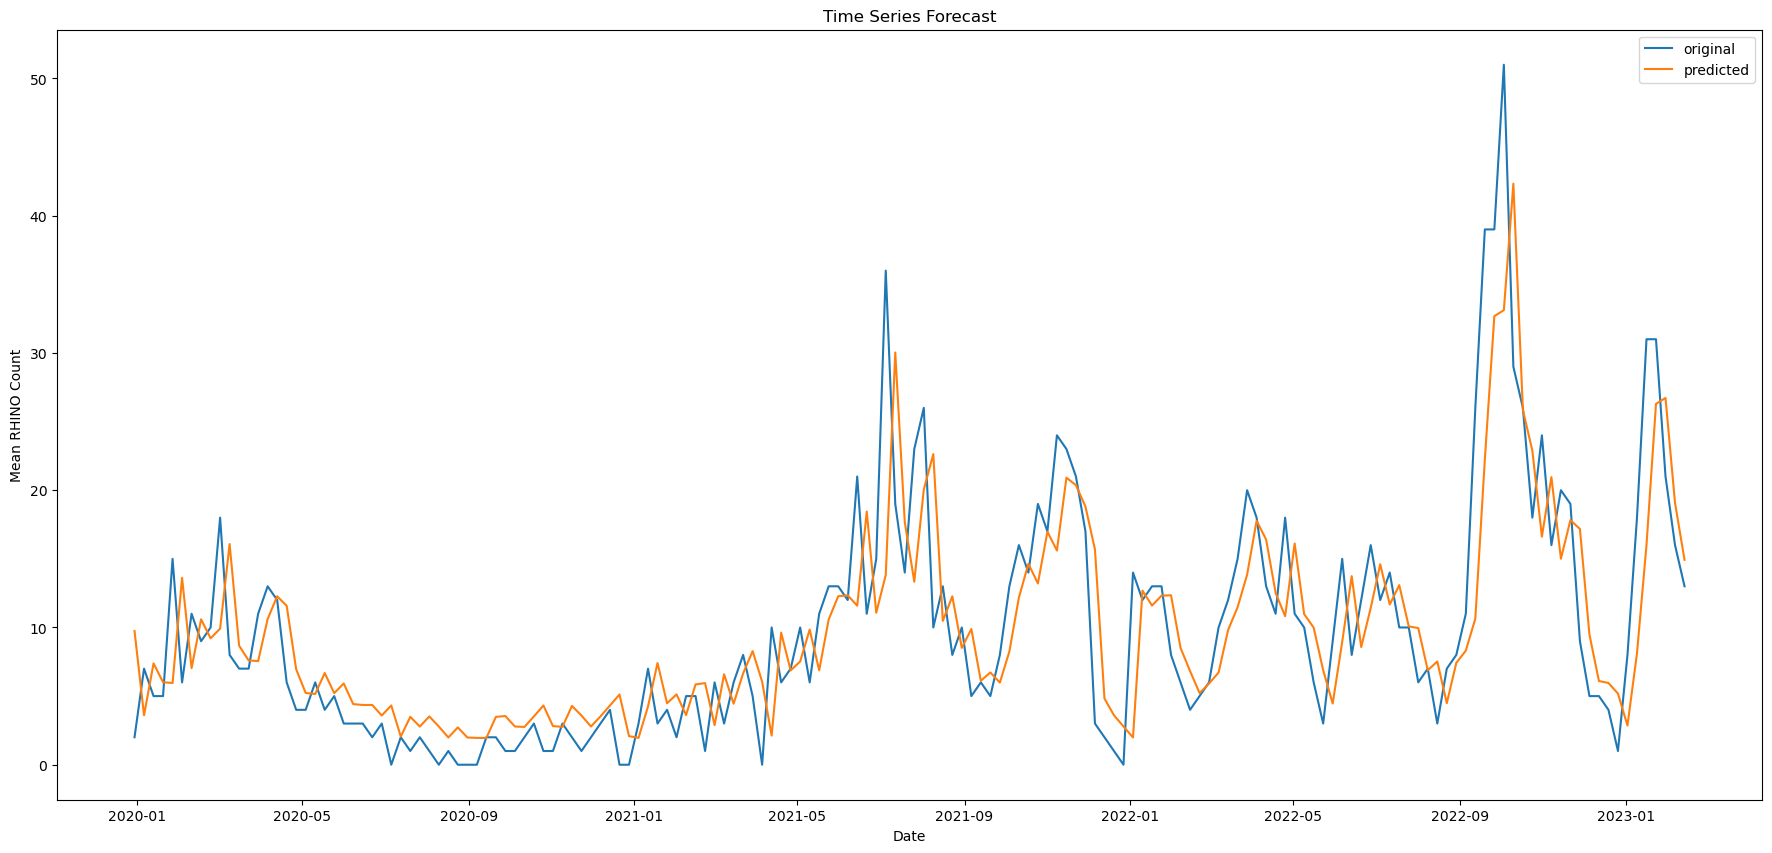

In [18]:
mex = df.loc[df['COUNTRY_CODE'] == 'MEX']
ts = mex.loc[:, ['week', 'RHINO']]
ts = ts.sort_values(by = ['week'])
ts.index = ts.week
ts = ts.drop("week", axis = 1)
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel("Mean RHINO Count")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.RHINO)

window_size = 6
moving_avg = ts.rolling(6).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean RHINO Count")
plt.xlabel("Date")
plt.ylabel("Mean RHINO Count")
plt.legend()
plt.show()


ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.RHINO)


ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean RHINO Count")
plt.show()

ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.RHINO)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = datetime(2022, 11, 28)
end_index = datetime(2024, 1, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index, ts.RHINO, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean RHINO Count")
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.RHINO,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean RHINO Count")
plt.legend()
plt.savefig('graph.png')

plt.show()

## Findings

### Most urgent: RSV

### Rising urgency: Metapneumovirus, Parainfluenza

### Least urgent: Adenovirus, Bocavirus, Rhinovirus


### Least Urgent

#### Adenovirus is prevelant year-round, with seasonal spikes in the fall and winter. While ever present, Adenovirus does not appear to pose a significant threat. There is a vaccine for Adenovirus, however it is not widley used nor available due to the low rates of severe infection and low exposure. 

#### Bocavirus is another respitory virus that is common in infants and young children. Most cases are mild and can be treated, however there is no vaccine for Bocavirus. Our modeling shows no significant increase in Bocavirus

#### Rhinovirus is the seasonal virus that causes the "common cold". Our model shows a return to seasonal Rhinovirus infections, but not above levels previously seen (Teo, Kah Wee et al 2022). There is no proven vaccine, medication, or treatment to cure Rhinovirus, thus it will continue to be a prevalent seasonal illness. 


### Trending upward

#### Metapneumovirus is similar to RSV, and currently has no vaccine. After declining during COVID lockdowns, there is some concern about recent upticks in detections (Parkinson 2023). Our model reflects this uptick, and forecasting predicts an increase moving forward. 

#### Parainfluenza viruses create respitory problems for infants and young children, and may be on the rise. Our forecasting model matches recent trends of a potentially worrying increase in the number of parainfluenza detections. This is especially worrying as there is currently no vaccine for Parainfluenza. While there is no need to ring the alarm bell just yet, scientists are keeping a close eye. 

### Most Urgent

#### RSV has been becoming an increasing threat recently, mainly affecting the very young and the elderly. Our own modeling has shown a huge increase in the reporting of cases, further predicting that RSV will continue to have severe seasonal spikes and more prevelance throughout the year. RSV is especially worrying as it is a common cause of chronic illnesses such as bronchiolitis and pneumonia. Scientists are working to quickly develop a vaccine, and thankfully there are already a few promising candidiates (Jewett 2023) . 

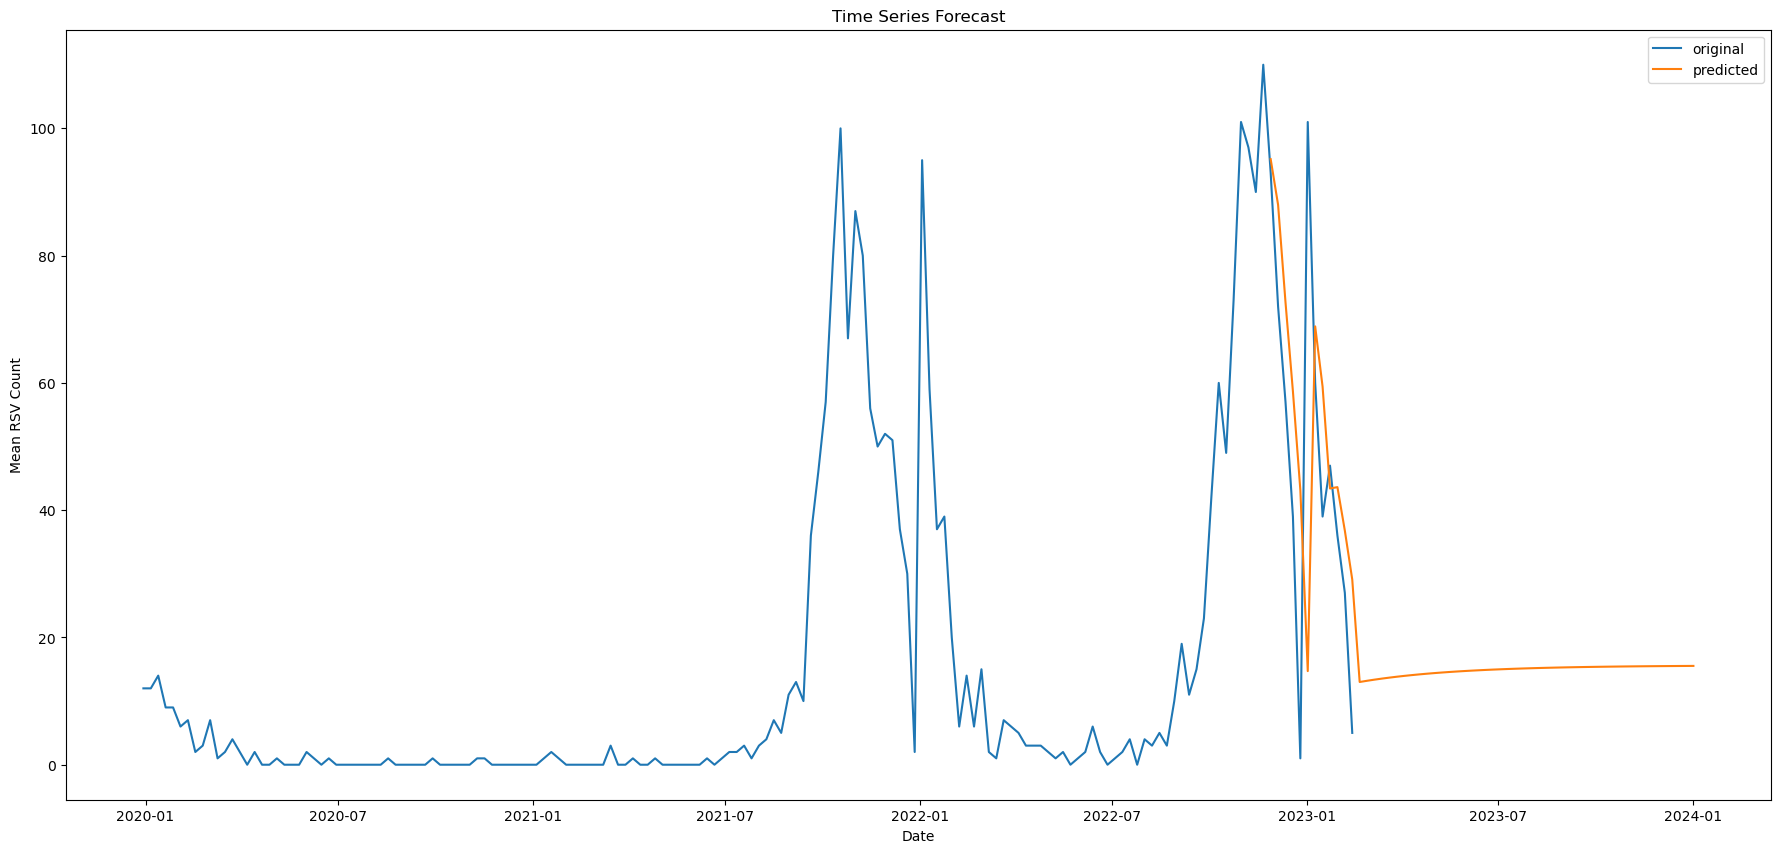

### Conclusion

#### We hoped to capture meaningful insights into which respitory viruses are on the rise as the COVID-19 global pandemic moves toward an endemic stage in many parts of the world. While all the viruses we discuss have had increases after much of the world were in some form of COVID lockdowns, some present more pressing dangers than others. 

#### As it turns out, predicting which viruses will become prevalent is difficult! Huge amounts of data, low data integrity due to reporting, and the illusive nature of certain viruses all contribute to the immense complexity of recommending virus vaccines. Prior to the COVID-19 pandemic, few thought that a global would arise from a coronavirus, illustrating the illusive nature of viruses and how they will take hold. 

#### Our time series forecasting demonstrates the current trends in respitory virus tracking, most notably that RSV has become a significant problem with an increase in detections worldwide. We're hopeful that vaccine development will sucessfully help to mitgiate the rise of RSV, and that continued tracking will monitor other worrisome viruses such as Parainfluenza and Metapneumovirus. 